In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression
from IPython.display import HTML, display, IFrame
import folium
from folium.plugins import MarkerCluster

In [2]:
import warnings

# Turn off all future warnings
warnings.filterwarnings("ignore")

In [3]:
zakouma = 'Chad and DRC.csv'
zakouma_df = pd.read_csv(zakouma)  

# Display the first few rows of the DataFrame
zakouma_df.head(5)

event_id_cnty        event_date  year  time_precision       disorder_type  \
0       CHA1857  24 November 2023  2023               1  Political violence   
1      SAF20188  24 November 2023  2023               2      Demonstrations   
2      DRC31133  23 November 2023  2023               1  Political violence   
3       CHA1856  23 November 2023  2023               1  Political violence   
4      DRC31161  23 November 2023  2023               1      Demonstrations   

                   event_type                       sub_event_type  \
0  Violence against civilians                               Attack   
1                    Protests                     Peaceful protest   
2                     Battles  Non-state actor overtakes territory   
3                     Battles                          Armed clash   
4                    Protests                     Peaceful protest   

                                      actor1  \
0            Unidentified Armed Group (Chad)   
1                  Protesters (South Africa)   
2                     M23: March 23 Movement   
3            Unidentified Armed Group (Chad)   
4  Protesters (Democratic Republic of Congo)   

                                       assoc_actor_1  inter1  ...    location  \
0                                                NaN       3  ...      Am Dam   
1                                                NaN       6  ...  Klerksdorp   
2                                                NaN       2  ...       Mweso   
3                                                NaN       3  ...        Kome   
4  Banyamulenge Ethnic Group (Democratic Republic...       6  ...        Goma   

  latitude  longitude  geo_precision                    source  source_scale  \
0  12.7641    20.4660              2            Alwihda (Chad)      National   
1 -26.8667    26.6667              1  Daily Sun (South Africa)      National   
2  -1.1298    29.0377              1            Mediacongo.net      National   
3   8.4667    16.7038              1            Alwihda (Chad)      National   
4  -1.6933    29.2339              1              Election-Net      National   

                                               notes fatalities  \
0  On 24 November 2023, unidentified armed men am...          1   
1  Around 24 November 2023 (as reported), protest...          0   
2  On 23 November 2023, M23 recaptured Mweso city...          0   
3  On 23 November 2023, an unidentified armed gro...          2   
4  On 23 November 2023, members of the Banyamulen...          0   

                   tags   timestamp  
0                   NaN  1701129688  
1  crowd size=no report  1701129701  
2                   NaN  1701129688  
3                   NaN  1701129688  
4  crowd size=no report  1701129688  

[5 rows x 31 columns]

In [5]:
# Specify the path to the shapefile 
shapefile_path = 'Zakouma_shape/Grand Zakouma Est et Ouest.shp'

# Read the shapefile using GeoPandas
gdf = gpd.read_file(shapefile_path)

# Display the GeoDataFrame
gdf

ID_   ID                                      Nom  fid_1  OID_  \
0    0  0.0  Grand Ecosystème Fonctionnel de Zakouma    0.0   0.0   
1    0  0.0  Grand Ecosystème Fonctionnel de Zakouma    0.0   0.0   

                                      Name FolderPath  SymbolID  AltMode  \
0  Grand Ecosystème Fonctionnel de Zakouma       None       0.0        0   
1  Grand Ecosystème Fonctionnel de Zakouma       None       0.0        0   

   Base  ...  Y_COORD  AREA PERIMETER layer  path  area_sqkm  area_new  \
0   0.0  ...      0.0   0.0       0.0  None  None          0         0   
1   0.0  ...      0.0   0.0       0.0  None  None          0         0   

   Shape_Le_1  Shape_Area                                           geometry  
0   12.264766    2.582170  POLYGON Z ((18.57962 9.85103 0.00000, 18.57962...  
1    7.439705    0.614148  POLYGON Z ((18.70355 11.17374 0.00000, 18.7000...  

[2 rows x 26 columns]

In [6]:
#Specify the path to the shapefile 
shapefile_path = 'Zakouma_shape\Buffer_GZE_20km.shp'

# Read the shapefile using GeoPandas
gdf1 = gpd.read_file(shapefile_path)

# Display the GeoDataFrame
gdf1.head()

Shape_Leng  Shape_Area                                           geometry
0   22.265236    1.992553  MULTIPOLYGON Z (((18.42483 10.67784 0.00000, 1...

In [7]:
from geopandas.tools import overlay

# Perform a spatial overlay using the buffer zone ('gdf1') and the national park ('gdf')
merged_gdf = overlay(gdf, gdf1, how='union')

# Display the merged GeoDataFrame
merged_gdf.head()

ID_   ID                                      Nom  fid_1  OID_  \
0  0.0  0.0  Grand Ecosystème Fonctionnel de Zakouma    0.0   0.0   
1  0.0  0.0  Grand Ecosystème Fonctionnel de Zakouma    0.0   0.0   
2  NaN  NaN                                      NaN    NaN   NaN   

                                      Name FolderPath  SymbolID  AltMode  \
0  Grand Ecosystème Fonctionnel de Zakouma       None       0.0      0.0   
1  Grand Ecosystème Fonctionnel de Zakouma       None       0.0      0.0   
2                                      NaN        NaN       NaN      NaN   

   Base  ...  PERIMETER  layer  path area_sqkm  area_new  Shape_Le_1  \
0   0.0  ...        0.0   None  None       0.0       0.0   12.264766   
1   0.0  ...        0.0   None  None       0.0       0.0    7.439705   
2   NaN  ...        NaN   None  None       NaN       NaN         NaN   

   Shape_Area_1  Shape_Leng_2  Shape_Area_2  \
0      2.582170           NaN           NaN   
1      0.614148           NaN           NaN   
2           NaN     22.265236      1.992553   

                                            geometry  
0  POLYGON Z ((18.57962 9.85103 0.00000, 18.68584...  
1  POLYGON Z ((18.70001 11.14113 0.00000, 18.7064...  
2  MULTIPOLYGON Z (((19.56197 12.25413 0.00000, 1...  

[3 rows x 28 columns]

<font size="6"> Zakouma vs Chad Events</font>
<h1></h1>

<li> Pre 2010 Period 1 : From 1997 till 2004</li>
<li> Pre 2010 Period 2 : From 2004 till 2010</li>
<li> Post 2010 Period 1 : From 2010 till 2016</li>
<li> Post 2010 Period 2 : From 2016 till 2023</li>

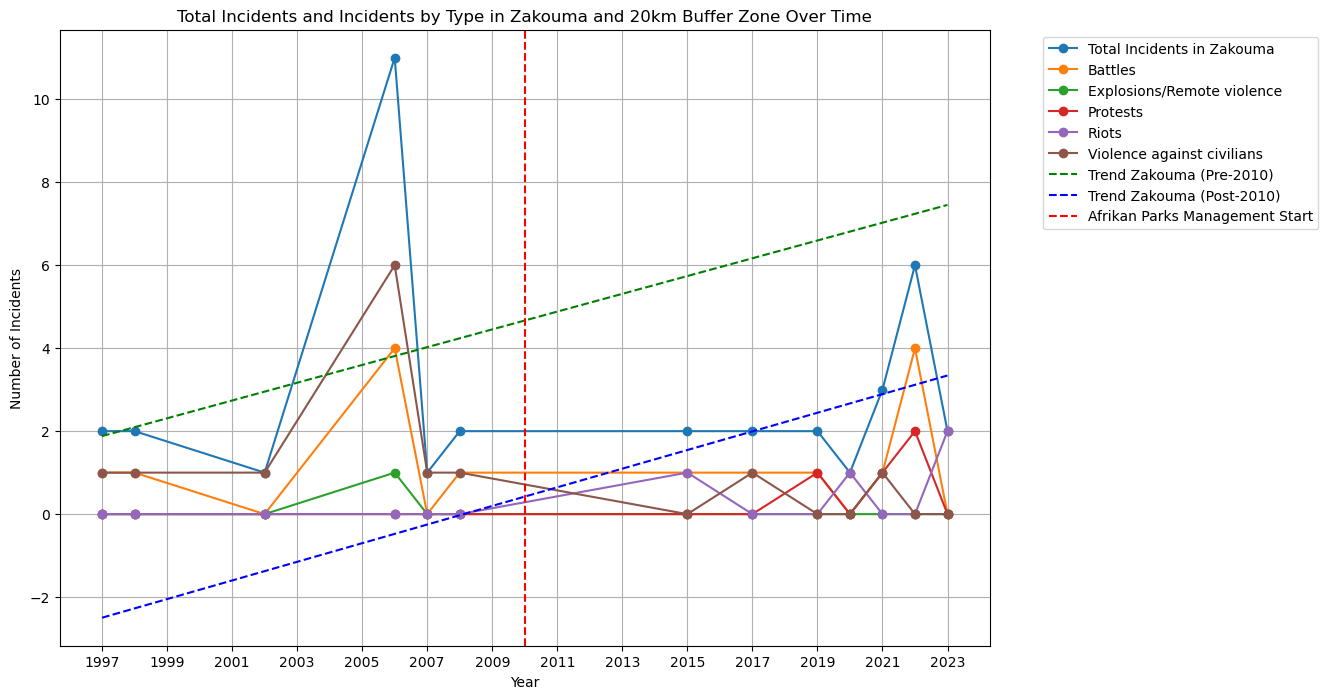

In [8]:
#hide

#  'latitude' and 'longitude' are columns in zakouma_df
geometry = [Point(xy) for xy in zip(zakouma_df['longitude'], zakouma_df['latitude'])]
zakouma_gdf = gpd.GeoDataFrame(zakouma_df, geometry=geometry)

# Set CRS for the GeoDataFrame
zakouma_gdf.crs = "EPSG:4326"

# Perform the spatial join with the merged GeoDataFrame
zakouma_within_shape = gpd.sjoin(zakouma_gdf, merged_gdf, how="inner", op="within")

# Filter data for incidents in the specified region inside the shape and buffer zones
region_data = zakouma_within_shape.copy()

# Convert 'year' to integer format
region_data['year'] = region_data['year'].astype(int)

# Add a vertical line at the year 2010
afrikan_parks_start_year = 2010

# Total incidents in the region timeline
total_incidents_region_timeline = region_data.groupby('year').size().reset_index(name='total_incidents_region')

# Incidents in the region timeline by event type
incidents_by_type_region_timeline = region_data.groupby(['year', 'event_type']).size().unstack(fill_value=0).reset_index()

# Linear regression for Zakouma (pre-2010)
reg_zakouma_pre_2010 = LinearRegression().fit(total_incidents_region_timeline[total_incidents_region_timeline['year'] < afrikan_parks_start_year][['year']], 
                                               total_incidents_region_timeline[total_incidents_region_timeline['year'] < afrikan_parks_start_year]['total_incidents_region'])
total_incidents_region_timeline['trend_zakouma_pre_2010'] = reg_zakouma_pre_2010.predict(total_incidents_region_timeline[['year']])

# Linear regression for Zakouma (post-2010)
reg_zakouma_post_2010 = LinearRegression().fit(total_incidents_region_timeline[total_incidents_region_timeline['year'] >= afrikan_parks_start_year][['year']], 
                                                total_incidents_region_timeline[total_incidents_region_timeline['year'] >= afrikan_parks_start_year]['total_incidents_region'])
total_incidents_region_timeline['trend_zakouma_post_2010'] = reg_zakouma_post_2010.predict(total_incidents_region_timeline[['year']])

# Plot the timeline for Zakouma
plt.figure(figsize=(12, 8))

# Plot total incidents in the region
plt.plot(total_incidents_region_timeline['year'], total_incidents_region_timeline['total_incidents_region'],
         marker='o', linestyle='-', label='Total Incidents in Zakouma')

# Plot separate incident types in the region
for event_type in incidents_by_type_region_timeline.columns[1:]:
    plt.plot(total_incidents_region_timeline['year'], incidents_by_type_region_timeline[event_type],
             marker='o', linestyle='-', label=event_type)

# Plot trend line for total incidents in Zakouma (pre-2010)
plt.plot(total_incidents_region_timeline['year'], total_incidents_region_timeline['trend_zakouma_pre_2010'],
         marker='', linestyle='--', color='green', label='Trend Zakouma (Pre-2010)')

# Plot trend line for total incidents in Zakouma (post-2010)
plt.plot(total_incidents_region_timeline['year'], total_incidents_region_timeline['trend_zakouma_post_2010'],
         marker='', linestyle='--', color='blue', label='Trend Zakouma (Post-2010)')

# Add a vertical line at the year 2010
plt.axvline(x=afrikan_parks_start_year, color='red', linestyle='--', label='Afrikan Parks Management Start')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Total Incidents and Incidents by Type in Zakouma and 20km Buffer Zone Over Time')

# Set x-axis ticks to start from 1997 to 2023 and show every year
plt.xticks(range(1997, 2024, 2))

# Show the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.grid(True)
plt.show()

<li>Trend lines run almost parrallel which suggests that the increase in total events in Zakouma and the 20km buffer zone is comparatively less than the event increase for chad and  in the surrounding provinces after 2010</li>

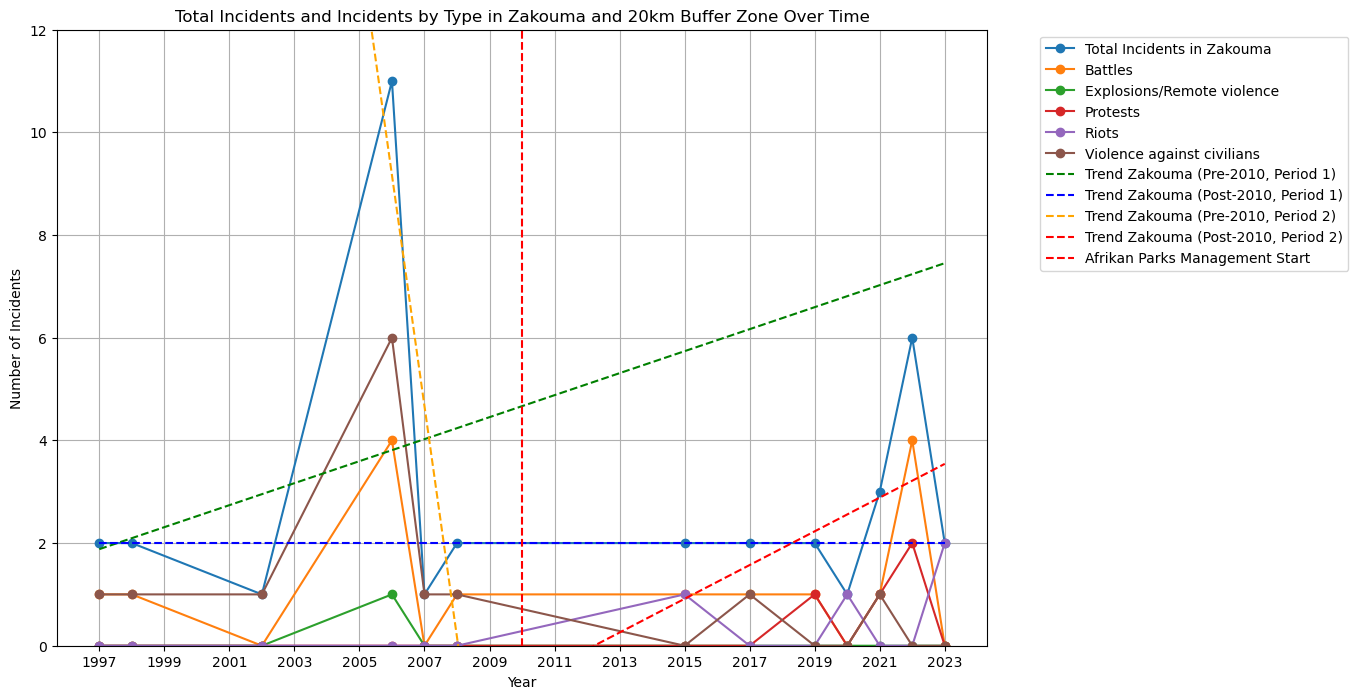

In [69]:
#hide

# 'latitude' and 'longitude' are columns in zakouma_df
geometry = [Point(xy) for xy in zip(zakouma_df['longitude'], zakouma_df['latitude'])]
zakouma_gdf = gpd.GeoDataFrame(zakouma_df, geometry=geometry)

# Set CRS for the GeoDataFrame
zakouma_gdf.crs = "EPSG:4326"

# Perform the spatial join with the merged GeoDataFrame
zakouma_within_shape = gpd.sjoin(zakouma_gdf, merged_gdf, how="inner", op="within")

# Filter data for incidents in the specified region inside the shape and buffer zones
region_data = zakouma_within_shape.copy()

# Convert 'year' to integer format
region_data['year'] = region_data['year'].astype(int)

# Add a vertical line at the year 2010
afrikan_parks_start_year = 2010

# Total incidents in the region timeline
total_incidents_region_timeline = region_data.groupby('year').size().reset_index(name='total_incidents_region')

# Incidents in the region timeline by event type
incidents_by_type_region_timeline = region_data.groupby(['year', 'event_type']).size().unstack(fill_value=0).reset_index()

# Linear regression for Zakouma (pre-2010, period 1)
reg_zakouma_pre_2010_1 = LinearRegression().fit(total_incidents_region_timeline[(total_incidents_region_timeline['year'] >= 1997) & (total_incidents_region_timeline['year'] < 2010)][['year']], 
                                                total_incidents_region_timeline[(total_incidents_region_timeline['year'] >= 1997) & (total_incidents_region_timeline['year'] < 2010)]['total_incidents_region'])
total_incidents_region_timeline['trend_zakouma_pre_2010_1'] = reg_zakouma_pre_2010_1.predict(total_incidents_region_timeline[['year']])

# Linear regression for Zakouma (post-2010, period 1)
reg_zakouma_post_2010_1 = LinearRegression().fit(total_incidents_region_timeline[(total_incidents_region_timeline['year'] >= 2010) & (total_incidents_region_timeline['year'] < 2016)][['year']], 
                                                 total_incidents_region_timeline[(total_incidents_region_timeline['year'] >= 2010) & (total_incidents_region_timeline['year'] < 2016)]['total_incidents_region'])
total_incidents_region_timeline['trend_zakouma_post_2010_1'] = reg_zakouma_post_2010_1.predict(total_incidents_region_timeline[['year']])

# Linear regression for Zakouma (pre-2010, period 2)
reg_zakouma_pre_2010_2 = LinearRegression().fit(total_incidents_region_timeline[(total_incidents_region_timeline['year'] >= 2005) & (total_incidents_region_timeline['year'] < 2010)][['year']], 
                                                total_incidents_region_timeline[(total_incidents_region_timeline['year'] >= 2005) & (total_incidents_region_timeline['year'] < 2010)]['total_incidents_region'])
total_incidents_region_timeline['trend_zakouma_pre_2010_2'] = reg_zakouma_pre_2010_2.predict(total_incidents_region_timeline[['year']])

# Linear regression for Zakouma (post-2010, period 2)
reg_zakouma_post_2010_2 = LinearRegression().fit(total_incidents_region_timeline[(total_incidents_region_timeline['year'] >= 2016) & (total_incidents_region_timeline['year'] <= 2023)][['year']], 
                                                 total_incidents_region_timeline[(total_incidents_region_timeline['year'] >= 2016) & (total_incidents_region_timeline['year'] <= 2023)]['total_incidents_region'])
total_incidents_region_timeline['trend_zakouma_post_2010_2'] = reg_zakouma_post_2010_2.predict(total_incidents_region_timeline[['year']])

# Plot the timeline for Zakouma
plt.figure(figsize=(12, 8))

# Plot total incidents in the region
plt.plot(total_incidents_region_timeline['year'], total_incidents_region_timeline['total_incidents_region'],
         marker='o', linestyle='-', label='Total Incidents in Zakouma')

# Plot separate incident types in the region
for event_type in incidents_by_type_region_timeline.columns[1:]:
    plt.plot(total_incidents_region_timeline['year'], incidents_by_type_region_timeline[event_type],
             marker='o', linestyle='-', label=event_type)

# Plot trend line for total incidents in Zakouma (pre-2010, period 1)
plt.plot(total_incidents_region_timeline['year'], total_incidents_region_timeline['trend_zakouma_pre_2010_1'],
         marker='', linestyle='--', color='green', label='Trend Zakouma (Pre-2010, Period 1)')

# Plot trend line for total incidents in Zakouma (post-2010, period 1)
plt.plot(total_incidents_region_timeline['year'], total_incidents_region_timeline['trend_zakouma_post_2010_1'],
         marker='', linestyle='--', color='blue', label='Trend Zakouma (Post-2010, Period 1)')

# Plot trend line for total incidents in Zakouma (pre-2010, period 2)
plt.plot(total_incidents_region_timeline['year'], total_incidents_region_timeline['trend_zakouma_pre_2010_2'],
         marker='', linestyle='--', color='orange', label='Trend Zakouma (Pre-2010, Period 2)')

# Plot trend line for total incidents in Zakouma (post-2010, period 2)
plt.plot(total_incidents_region_timeline['year'], total_incidents_region_timeline['trend_zakouma_post_2010_2'],
         marker='', linestyle='--', color='red', label='Trend Zakouma (Post-2010, Period 2)')

# Add a vertical line at the year 2010
plt.axvline(x=afrikan_parks_start_year, color='red', linestyle='--', label='Afrikan Parks Management Start')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Total Incidents and Incidents by Type in Zakouma and 20km Buffer Zone Over Time')

# Set x-axis ticks to start from 1997 to 2023 and show every year
plt.xticks(range(1997, 2024, 2))

# Set y-axis limits
plt.ylim(0, 12)

# Show the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.grid(True)
plt.show()

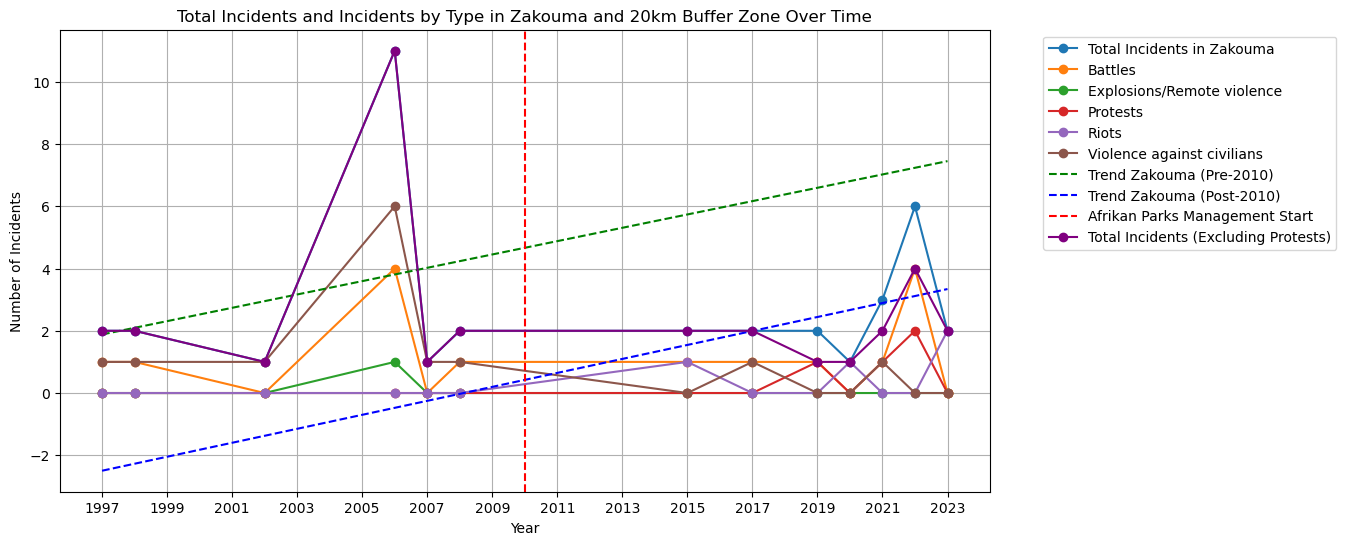

In [22]:
#hide

# Calculate total incidents excluding "Protests"
total_incidents_excluding_protests = region_data[region_data['event_type'] != "Protests"].groupby('year').size().reset_index(name='total_incidents_excluding_protests')

# Plot the timeline for Zakouma with the additional line for total incidents excluding "Protests"
plt.figure(figsize=(12, 6))

# Plot total incidents in the region
plt.plot(total_incidents_region_timeline['year'], total_incidents_region_timeline['total_incidents_region'],
         marker='o', linestyle='-', label='Total Incidents in Zakouma')

# Plot separate incident types in the region
for event_type in incidents_by_type_region_timeline.columns[1:]:
    plt.plot(total_incidents_region_timeline['year'], incidents_by_type_region_timeline[event_type],
             marker='o', linestyle='-', label=event_type)

# Plot trend line for total incidents in Zakouma (pre-2010)
plt.plot(total_incidents_region_timeline['year'], total_incidents_region_timeline['trend_zakouma_pre_2010'],
         marker='', linestyle='--', color='green', label='Trend Zakouma (Pre-2010)')

# Plot trend line for total incidents in Zakouma (post-2010)
plt.plot(total_incidents_region_timeline['year'], total_incidents_region_timeline['trend_zakouma_post_2010'],
         marker='', linestyle='--', color='blue', label='Trend Zakouma (Post-2010)')

# Add a vertical line at the year 2010
plt.axvline(x=afrikan_parks_start_year, color='red', linestyle='--', label='Afrikan Parks Management Start')

# Plot total incidents excluding "Protests"
plt.plot(total_incidents_excluding_protests['year'], total_incidents_excluding_protests['total_incidents_excluding_protests'],
         marker='o', linestyle='-', color='purple', label='Total Incidents (Excluding Protests)')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Total Incidents and Incidents by Type in Zakouma and 20km Buffer Zone Over Time')

# Set x-axis ticks to start from 1997 to 2023 and show every year
plt.xticks(range(1997, 2024, 2))

# Show the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.grid(True)
plt.show()

<li>Trend lines run almost parrallel which suggests that the increase in total events in Zakouma and the 20km buffer zone is comparatively less than the event increase for chad after 2010</li>

Source: Armed Conflict Location & Event Data Project (ACLED); www.acleddata.com

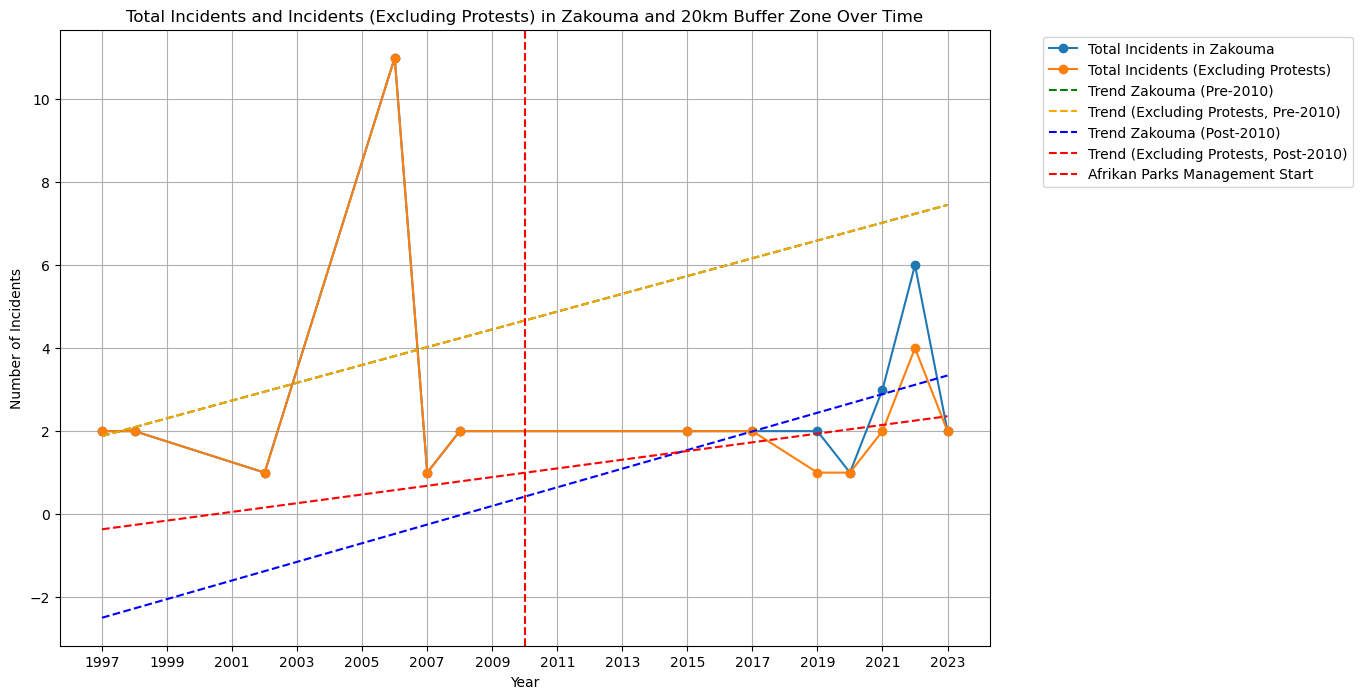

In [10]:

#hide
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from sklearn.linear_model import LinearRegression

# 'latitude' and 'longitude' are columns in zakouma_df
geometry = [Point(xy) for xy in zip(zakouma_df['longitude'], zakouma_df['latitude'])]
zakouma_gdf = gpd.GeoDataFrame(zakouma_df, geometry=geometry)

# Set CRS for the GeoDataFrame
zakouma_gdf.crs = "EPSG:4326"

# Perform the spatial join with the merged GeoDataFrame
zakouma_within_shape = gpd.sjoin(zakouma_gdf, merged_gdf, how="inner", op="within")

# Filter data for incidents in the specified region inside the shape and buffer zones
region_data = zakouma_within_shape.copy()

# Convert 'year' to integer format
region_data['year'] = region_data['year'].astype(int)

# Exclude Protests
region_data_excluding_protests = region_data[region_data['event_type'] != 'Protests']

# Add a vertical line at the year 2010
afrikan_parks_start_year = 2010

# Total incidents in the region timeline
total_incidents_region_timeline = region_data.groupby('year').size().reset_index(name='total_incidents_region')

# Total incidents excluding Protests
total_incidents_excluding_protests = region_data_excluding_protests.groupby('year').size().reset_index(name='total_incidents_excluding_protests')

# Linear regression for total incidents in Zakouma (pre-2010)
reg_total_pre_2010 = LinearRegression().fit(total_incidents_region_timeline[total_incidents_region_timeline['year'] < afrikan_parks_start_year][['year']], 
                                            total_incidents_region_timeline[total_incidents_region_timeline['year'] < afrikan_parks_start_year]['total_incidents_region'])
total_incidents_region_timeline['trend_total_pre_2010'] = reg_total_pre_2010.predict(total_incidents_region_timeline[['year']])

# Linear regression for total incidents excluding Protests (pre-2010)
reg_excluding_protests_pre_2010 = LinearRegression().fit(total_incidents_excluding_protests[total_incidents_excluding_protests['year'] < afrikan_parks_start_year][['year']], 
                                                         total_incidents_excluding_protests[total_incidents_excluding_protests['year'] < afrikan_parks_start_year]['total_incidents_excluding_protests'])
total_incidents_excluding_protests['trend_excluding_protests_pre_2010'] = reg_excluding_protests_pre_2010.predict(total_incidents_excluding_protests[['year']])

# Linear regression for total incidents in Zakouma (post-2010)
reg_total_post_2010 = LinearRegression().fit(total_incidents_region_timeline[total_incidents_region_timeline['year'] >= afrikan_parks_start_year][['year']], 
                                             total_incidents_region_timeline[total_incidents_region_timeline['year'] >= afrikan_parks_start_year]['total_incidents_region'])
total_incidents_region_timeline['trend_total_post_2010'] = reg_total_post_2010.predict(total_incidents_region_timeline[['year']])

# Linear regression for total incidents excluding Protests (post-2010)
reg_excluding_protests_post_2010 = LinearRegression().fit(total_incidents_excluding_protests[total_incidents_excluding_protests['year'] >= afrikan_parks_start_year][['year']], 
                                                          total_incidents_excluding_protests[total_incidents_excluding_protests['year'] >= afrikan_parks_start_year]['total_incidents_excluding_protests'])
total_incidents_excluding_protests['trend_excluding_protests_post_2010'] = reg_excluding_protests_post_2010.predict(total_incidents_excluding_protests[['year']])

# Plot the timeline for Zakouma
plt.figure(figsize=(12, 8))

# Plot total incidents in the region
plt.plot(total_incidents_region_timeline['year'], total_incidents_region_timeline['total_incidents_region'],
         marker='o', linestyle='-', label='Total Incidents in Zakouma')

# Plot total incidents excluding Protests
plt.plot(total_incidents_excluding_protests['year'], total_incidents_excluding_protests['total_incidents_excluding_protests'],
         marker='o', linestyle='-', label='Total Incidents (Excluding Protests)')

# Plot trend line for total incidents in Zakouma (pre-2010)
plt.plot(total_incidents_region_timeline['year'], total_incidents_region_timeline['trend_total_pre_2010'],
         marker='', linestyle='--', color='green', label='Trend Zakouma (Pre-2010)')

# Plot trend line for total incidents excluding Protests (pre-2010)
plt.plot(total_incidents_excluding_protests['year'], total_incidents_excluding_protests['trend_excluding_protests_pre_2010'],
         marker='', linestyle='--', color='orange', label='Trend (Excluding Protests, Pre-2010)')

# Plot trend line for total incidents in Zakouma (post-2010)
plt.plot(total_incidents_region_timeline['year'], total_incidents_region_timeline['trend_total_post_2010'],
         marker='', linestyle='--', color='blue', label='Trend Zakouma (Post-2010)')

# Plot trend line for total incidents excluding Protests (post-2010)
plt.plot(total_incidents_excluding_protests['year'], total_incidents_excluding_protests['trend_excluding_protests_post_2010'],
         marker='', linestyle='--', color='red', label='Trend (Excluding Protests, Post-2010)')

# Add a vertical line at the year 2010
plt.axvline(x=afrikan_parks_start_year, color='red', linestyle='--', label='Afrikan Parks Management Start')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Total Incidents and Incidents (Excluding Protests) in Zakouma and 20km Buffer Zone Over Time')

# Set x-axis ticks to start from 1997 to 2023 and show every year
plt.xticks(range(1997, 2024, 2))

# Show the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.grid(True)
plt.show()


<li>Trend lines for total incidents in Zakouma and total incidents excluding protests are congruent in the period before 2010</li>

<li> Trend line for total incidents in Zakouma is steeper than the trend line for incidents that excludes protests.</li> 

In [122]:
# Add these lines before the regression fitting
print(pre_2010_1.columns)


Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'civilian_targeting', 'iso', 'region', 'country',
       'admin1', 'admin2', 'admin3', 'location', 'latitude', 'longitude',
       'geo_precision', 'source', 'source_scale', 'notes', 'fatalities',
       'tags', 'timestamp', 'geometry', 'index_right', 'ID_', 'ID', 'Nom',
       'fid_1', 'OID_', 'Name', 'FolderPath', 'SymbolID', 'AltMode', 'Base',
       'Clamped', 'Extruded', 'Snippet', 'PopupInfo', 'Shape_Leng_1',
       'X_COORD', 'Y_COORD', 'AREA', 'PERIMETER', 'layer', 'path', 'area_sqkm',
       'area_new', 'Shape_Le_1', 'Shape_Area_1', 'Shape_Leng_2',
       'Shape_Area_2'],
      dtype='object')


Total events before 2010: 19
Total events after 2010: 18


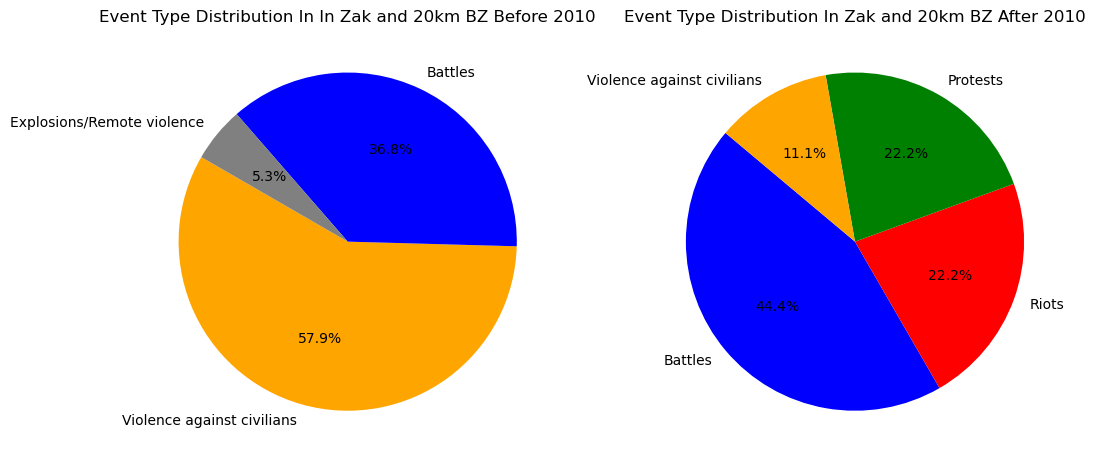

In [12]:
# hide

import geopandas as gpd
import matplotlib.pyplot as plt

# 'geometry' is the geometry column in zakouma_gdf
zakouma_gdf = gpd.GeoDataFrame(zakouma_gdf, geometry='geometry')

# Spatial join to find events within merged_gdf
zakouma_within_merged = gpd.sjoin(zakouma_gdf, merged_gdf, how="inner", op="within")

# Convert 'year' to numeric format
zakouma_within_merged['year'] = pd.to_numeric(zakouma_within_merged['year'], errors='coerce')

# Filter data for events before and after 2010
events_before_2010 = zakouma_within_merged[zakouma_within_merged['year'] < 2010]
events_after_2010 = zakouma_within_merged[zakouma_within_merged['year'] >= 2010]

# Get total counts for events before and after 2010
total_events_before_2010 = (zakouma_within_merged['year'] < 2010).sum()
total_events_after_2010 = (zakouma_within_merged['year'] >= 2010).sum()

# Calculate the percentage of each event type before 2010
event_type_percentage_before = events_before_2010['event_type'].value_counts(normalize=True) * 100

# Calculate the percentage of each event type after 2010
event_type_percentage_after = events_after_2010['event_type'].value_counts(normalize=True) * 100



# Define colors for each event type
event_type_colors = {
    'Battles': 'blue',
    'Violence against civilians': 'orange',
    'Protests': 'green',
    'Riots': 'red',
    'Strategic developments': 'brown',
    'Explosions/Remote violence': 'grey'
}

# Plot pie chart for events before 2010
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(event_type_percentage_before, labels=event_type_percentage_before.index, autopct='%1.1f%%', startangle=150, colors=[event_type_colors.get(event_type, 'gray') for event_type in event_type_percentage_before.index])
plt.title('Event Type Distribution In In Zak and 20km BZ Before 2010')

# Plot pie chart for events after 2010
plt.subplot(1, 2, 2)
plt.pie(event_type_percentage_after, labels=event_type_percentage_after.index, autopct='%1.1f%%', startangle=140, colors=[event_type_colors.get(event_type, 'gray') for event_type in event_type_percentage_after.index])
plt.title('Event Type Distribution In Zak and 20km BZ After 2010')

# Show the total counts
print("Total events before 2010:", total_events_before_2010)
print("Total events after 2010:", total_events_after_2010)

plt.show()

<li>There is a noticeable decrease in the violence against civilians incidents after 2010 </li>

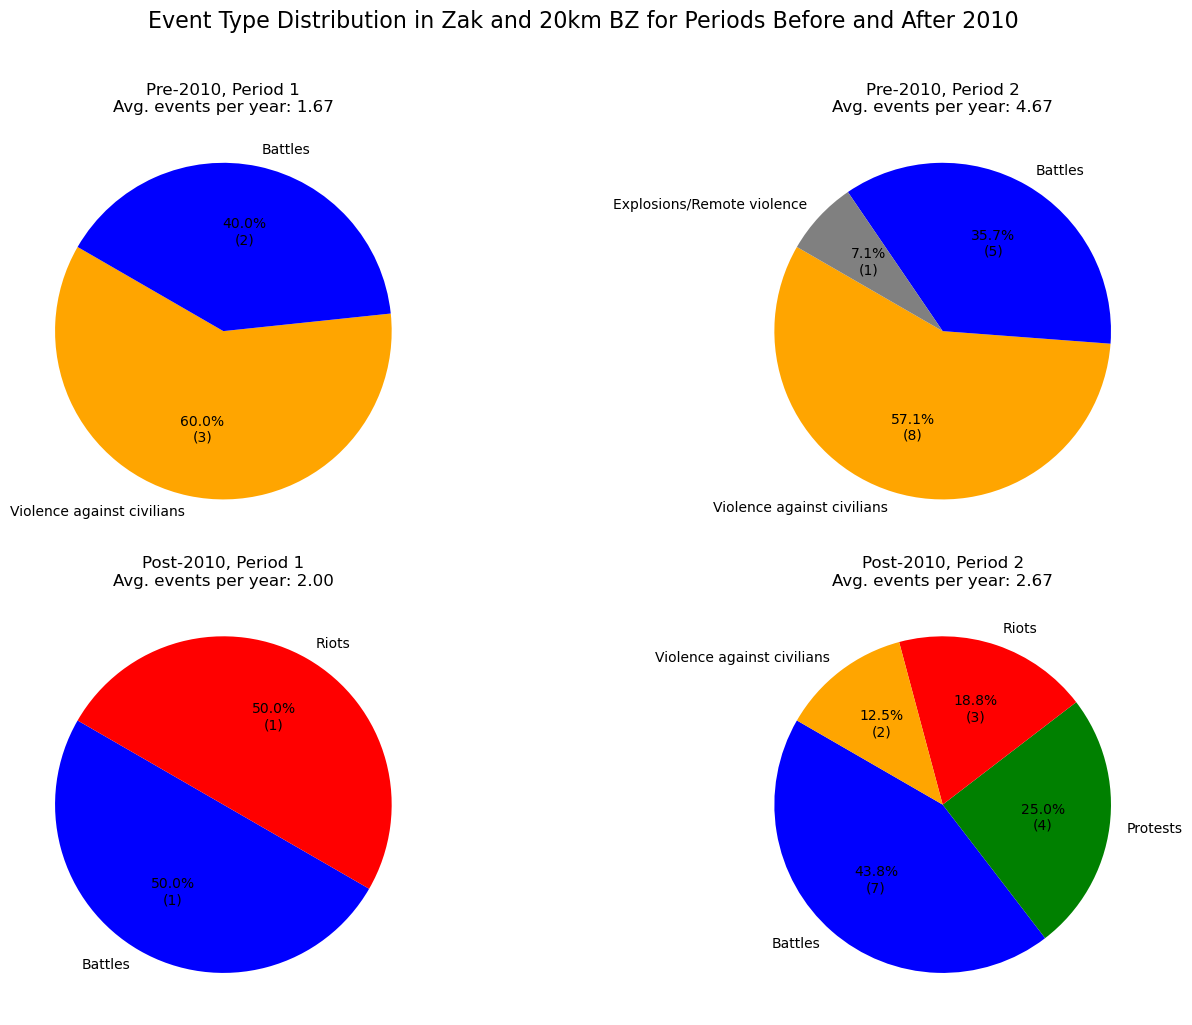

In [70]:

#hide

#'geometry' is the geometry column in  zakouma_gdf
zakouma_gdf = gpd.GeoDataFrame(zakouma_gdf, geometry='geometry')

# Spatial join to find events within merged_gdf
zakouma_within_merged = gpd.sjoin(zakouma_gdf, merged_gdf, how="inner", op="within")

# Convert 'year' to numeric format
zakouma_within_merged['year'] = pd.to_numeric(zakouma_within_merged['year'], errors='coerce')

# Define time periods
pre_2010_1 = zakouma_within_merged[(zakouma_within_merged['year'] >= 1997) & (zakouma_within_merged['year'] <= 2004)]
pre_2010_2 = zakouma_within_merged[(zakouma_within_merged['year'] >= 2005) & (zakouma_within_merged['year'] <= 2010)]
post_2010_1 = zakouma_within_merged[(zakouma_within_merged['year'] >= 2011) & (zakouma_within_merged['year'] <= 2015)]
post_2010_2 = zakouma_within_merged[(zakouma_within_merged['year'] >= 2016) & (zakouma_within_merged['year'] <= 2023)]

# Calculate the percentage of each event type for each time period
event_type_percentage_pre_2010_1 = pre_2010_1['event_type'].value_counts(normalize=True) * 100
event_type_percentage_pre_2010_2 = pre_2010_2['event_type'].value_counts(normalize=True) * 100
event_type_percentage_post_2010_1 = post_2010_1['event_type'].value_counts(normalize=True) * 100
event_type_percentage_post_2010_2 = post_2010_2['event_type'].value_counts(normalize=True) * 100

# Calculate average events per year for each time period
avg_events_per_year_pre_2010_1 = len(pre_2010_1) / len(pre_2010_1['year'].unique())
avg_events_per_year_pre_2010_2 = len(pre_2010_2) / len(pre_2010_2['year'].unique())
avg_events_per_year_post_2010_1 = len(post_2010_1) / len(post_2010_1['year'].unique())
avg_events_per_year_post_2010_2 = len(post_2010_2) / len(post_2010_2['year'].unique())

# Define colors for each event type
event_type_colors = {
    'Battles': 'blue',
    'Violence against civilians': 'orange',
    'Protests': 'green',
    'Riots': 'red',
    'Strategic developments': 'brown',
    'Explosions/Remote violence': 'grey'
}

# Plot pie charts for each time period
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Event Type Distribution in Zak and 20km BZ for Periods Before and After 2010', fontsize=16, y=1.02)  
axes = axes.flatten()

# Plot pie chart for pre-2010, period 1
wedges, texts, autotexts = axes[0].pie(event_type_percentage_pre_2010_1, labels=event_type_percentage_pre_2010_1.index, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * total_events_pre_2010_1 / 100), startangle=150, colors=[event_type_colors.get(event_type, 'gray') for event_type in event_type_percentage_pre_2010_1.index])
axes[0].set_title('Pre-2010, Period 1\nAvg. events per year: {:.2f}'.format(avg_events_per_year_pre_2010_1))

# Plot pie chart for pre-2010, period 2
wedges, texts, autotexts = axes[1].pie(event_type_percentage_pre_2010_2, labels=event_type_percentage_pre_2010_2.index, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * total_events_pre_2010_2 / 100), startangle=150, colors=[event_type_colors.get(event_type, 'gray') for event_type in event_type_percentage_pre_2010_2.index])
axes[1].set_title('Pre-2010, Period 2\nAvg. events per year: {:.2f}'.format(avg_events_per_year_pre_2010_2))

# Plot pie chart for post-2010, period 1
wedges, texts, autotexts = axes[2].pie(event_type_percentage_post_2010_1, labels=event_type_percentage_post_2010_1.index, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * total_events_post_2010_1 / 100), startangle=150, colors=[event_type_colors.get(event_type, 'gray') for event_type in event_type_percentage_post_2010_1.index])
axes[2].set_title('Post-2010, Period 1\nAvg. events per year: {:.2f}'.format(avg_events_per_year_post_2010_1))

# Plot pie chart for post-2010, period 2
wedges, texts, autotexts = axes[3].pie(event_type_percentage_post_2010_2, labels=event_type_percentage_post_2010_2.index, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * total_events_post_2010_2 / 100), startangle=150, colors=[event_type_colors.get(event_type, 'gray') for event_type in event_type_percentage_post_2010_2.index])
axes[3].set_title('Post-2010, Period 2\nAvg. events per year: {:.2f}'.format(avg_events_per_year_post_2010_2))

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

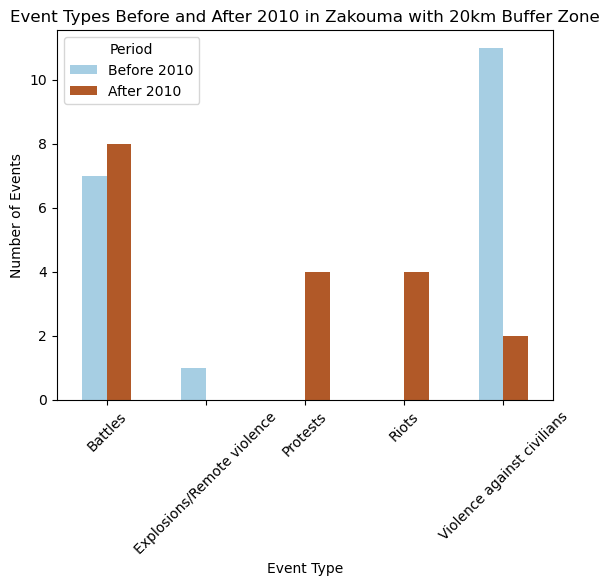

In [21]:
# hide

# 'geometry' is the geometry column in zakouma_gdf
zakouma_gdf = gpd.GeoDataFrame(zakouma_gdf, geometry='geometry')

# Spatial join to find events within merged_gdf
zakouma_within_merged = gpd.sjoin(zakouma_gdf, merged_gdf, how="inner", op="within")

# Convert 'year' to numeric format
zakouma_within_merged['year'] = pd.to_numeric(zakouma_within_merged['year'], errors='coerce')

# Filter data for events before and after 2010
events_before_2010 = zakouma_within_merged[zakouma_within_merged['year'] < 2010]
events_after_2010 = zakouma_within_merged[zakouma_within_merged['year'] >= 2010]

# Create a DataFrame for event counts before and after 2010
event_counts = pd.DataFrame({
    'Before 2010': events_before_2010['event_type'].value_counts(),
    'After 2010': events_after_2010['event_type'].value_counts()
}).fillna(0)

# Plot the grouped bar chart
plt.figure(figsize=(12, 8))
event_counts.plot(kind='bar', colormap='Paired', rot=45)
plt.xlabel('Event Type')
plt.ylabel('Number of Events')
plt.title('Event Types Before and After 2010 in Zakouma with 20km Buffer Zone')
plt.legend(title='Period')
plt.show()

<li>There was an small increase in the number of battles in Zakouma and 20km buffer zone after 2010.</li>
<li>There was a noticeable increase in protests and riots in Zakouma and 20km buffer zone after 2010.</li>
<li>There was a noticeable decrease in violence against civilians in Zakouma and 20km buffer zone after 2010. </li>

<Figure size 1200x800 with 0 Axes>

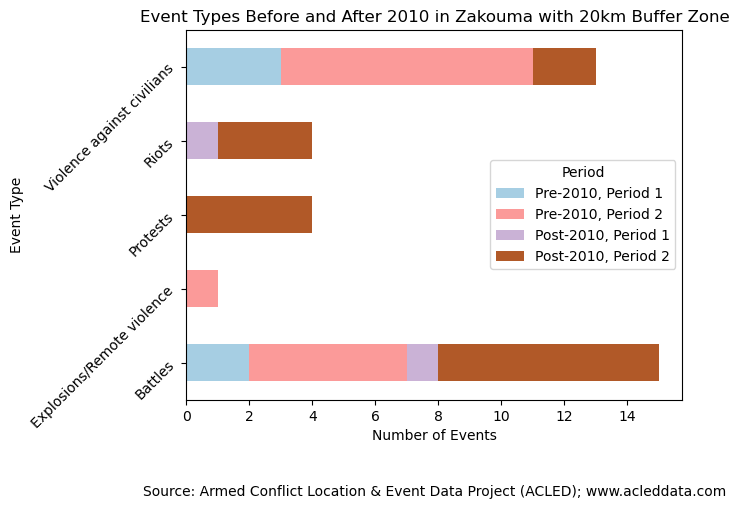

In [13]:
#'geometry' is the geometry column in zakouma_gdf
zakouma_gdf = gpd.GeoDataFrame(zakouma_gdf, geometry='geometry')

# Spatial join to find events within merged_gdf
zakouma_within_merged = gpd.sjoin(zakouma_gdf, merged_gdf, how="inner", op="within")

# Convert 'year' to numeric format
zakouma_within_merged['year'] = pd.to_numeric(zakouma_within_merged['year'], errors='coerce')

# Define time periods
pre_2010_1 = zakouma_within_merged[(zakouma_within_merged['year'] >= 1997) & (zakouma_within_merged['year'] <= 2004)]
pre_2010_2 = zakouma_within_merged[(zakouma_within_merged['year'] >= 2005) & (zakouma_within_merged['year'] <= 2010)]
post_2010_1 = zakouma_within_merged[(zakouma_within_merged['year'] >= 2011) & (zakouma_within_merged['year'] <= 2015)]
post_2010_2 = zakouma_within_merged[(zakouma_within_merged['year'] >= 2016) & (zakouma_within_merged['year'] <= 2023)]


# Create DataFrames for event counts in each time period
event_counts_pre_2010_1 = pre_2010_1['event_type'].value_counts().fillna(0)
event_counts_pre_2010_2 = pre_2010_2['event_type'].value_counts().fillna(0)
event_counts_post_2010_1 = post_2010_1['event_type'].value_counts().fillna(0)
event_counts_post_2010_2 = post_2010_2['event_type'].value_counts().fillna(0)

# Combine event counts into a single DataFrame
combined_event_counts = pd.DataFrame({
    'Pre-2010, Period 1': event_counts_pre_2010_1,
    'Pre-2010, Period 2': event_counts_pre_2010_2,
    'Post-2010, Period 1': event_counts_post_2010_1,
    'Post-2010, Period 2': event_counts_post_2010_2
}).fillna(0)

# Plot the stacked bar chart
plt.figure(figsize=(12, 8))
combined_event_counts.plot(kind='barh', stacked=True, colormap='Paired', rot=45)
plt.ylabel('Event Type')
plt.xlabel('Number of Events')
plt.title('Event Types Before and After 2010 in Zakouma with 20km Buffer Zone')
plt.legend(title='Period')
# Add source text at the bottom
source_text = "Source: Armed Conflict Location & Event Data Project (ACLED); www.acleddata.com"
plt.text(0.5, -0.25, source_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)

# Save it as an image
plt.savefig('Stacked_Bar_20km_BZ.png', dpi=300, bbox_inches='tight')

plt.show()

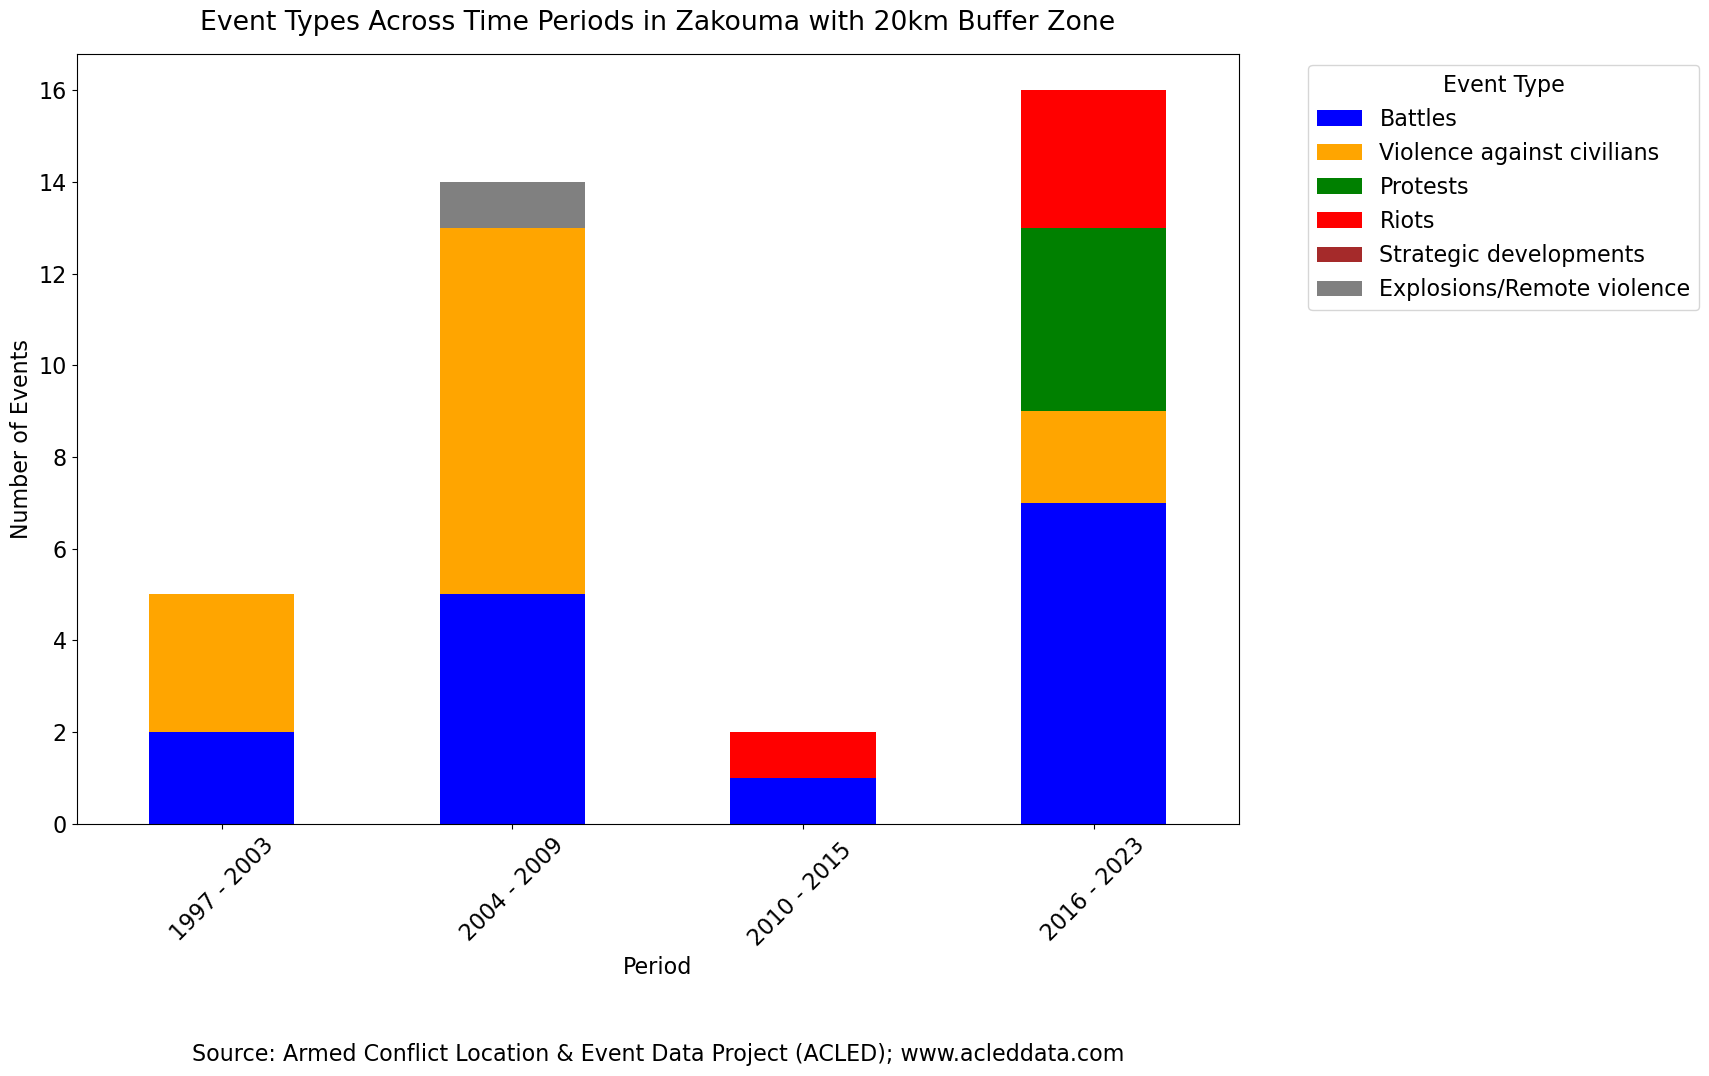

In [332]:
# 'geometry' is the geometry column in zakouma_gdf
zakouma_gdf = gpd.GeoDataFrame(zakouma_gdf, geometry='geometry')

# Spatial join to find events within merged_gdf2
zakouma_within_merged = gpd.sjoin(zakouma_gdf, merged_gdf, how="inner", op="within")

# Convert 'year' to numeric format
zakouma_within_merged['year'] = pd.to_numeric(zakouma_within_merged['year'], errors='coerce')


# Define time periods for the province data
pre_2010_1 = zakouma_within_merged[(zakouma_within_merged['year'] >= 1997) & (zakouma_within_merged['year'] <= 2004)]
pre_2010_2 = zakouma_within_merged[(zakouma_within_merged['year'] >= 2005) & (zakouma_within_merged['year'] < 2010)]
post_2010_1 = zakouma_within_merged[(zakouma_within_merged['year'] >= 2010) & (zakouma_within_merged['year'] <= 2015)]
post_2010_2 = zakouma_within_merged[(zakouma_within_merged['year'] >= 2016) & (zakouma_within_merged['year'] <= 2023)]

# Create pivot tables for event types for each time period
pivot_pre_2010_1 = pd.pivot_table(pre_2010_1, values='event_id_cnty', index='event_type', aggfunc='count', fill_value=0)
pivot_pre_2010_2 = pd.pivot_table(pre_2010_2, values='event_id_cnty', index='event_type', aggfunc='count', fill_value=0)
pivot_post_2010_1 = pd.pivot_table(post_2010_1, values='event_id_cnty', index='event_type', aggfunc='count', fill_value=0)
pivot_post_2010_2 = pd.pivot_table(post_2010_2, values='event_id_cnty', index='event_type', aggfunc='count', fill_value=0)

# Define colors for each event type consistently
event_type_colors = {
    'Battles': 'blue',
    'Violence against civilians': 'orange',
    'Protests': 'green',
    'Riots': 'red',
    'Strategic developments': 'brown',
    'Explosions/Remote violence': 'grey'
}

# Apply the same color mapping to all the pivot tables
pivot_pre_2010_1 = pivot_pre_2010_1.reindex(event_type_colors.keys()).fillna(0)
pivot_pre_2010_2 = pivot_pre_2010_2.reindex(event_type_colors.keys()).fillna(0)
pivot_post_2010_1 = pivot_post_2010_1.reindex(event_type_colors.keys()).fillna(0)
pivot_post_2010_2 = pivot_post_2010_2.reindex(event_type_colors.keys()).fillna(0)

# Combine the pivot tables
combined_pivot = pd.concat([pivot_pre_2010_1, pivot_pre_2010_2, pivot_post_2010_1, pivot_post_2010_2],
                           axis=1,
                           keys=['Pre-2010 Period 1', 'Pre-2010 Period 2', 'Post-2010 Period 1', 'Post-2010 Period 2'])

# Transpose the DataFrame to have periods as columns
combined_pivot = combined_pivot.T

# Set the font size
plt.rc('font', size=16)

# Plot the grouped bar chart with consistent colors
fig, ax = plt.subplots(figsize=(15, 10))
combined_pivot.plot(kind='bar', stacked=True, color=[event_type_colors[event] for event in combined_pivot.columns], rot=45, ax=ax)
plt.xlabel('Period')
plt.ylabel('Number of Events')
plt.title('Event Types Across Time Periods in Zakouma with 20km Buffer Zone', y = 1.02)

# Set x-axis labels to the periods
plt.xticks(range(4), ['1997 - 2003', '2004 - 2009', '2010 - 2015 ', '2016 - 2023'], rotation=45)

# Add source text at the bottom
source_text = "Source: Armed Conflict Location & Event Data Project (ACLED); www.acleddata.com"
plt.text(0.5, -0.30, source_text, ha='center', va='center', transform=ax.transAxes, fontsize=16)

# Move the legend inside and customize location
plt.legend(title='Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save it as an image
plt.savefig('Grouped_Bar_Periods_20km.png', dpi=300, bbox_inches='tight')

plt.show()


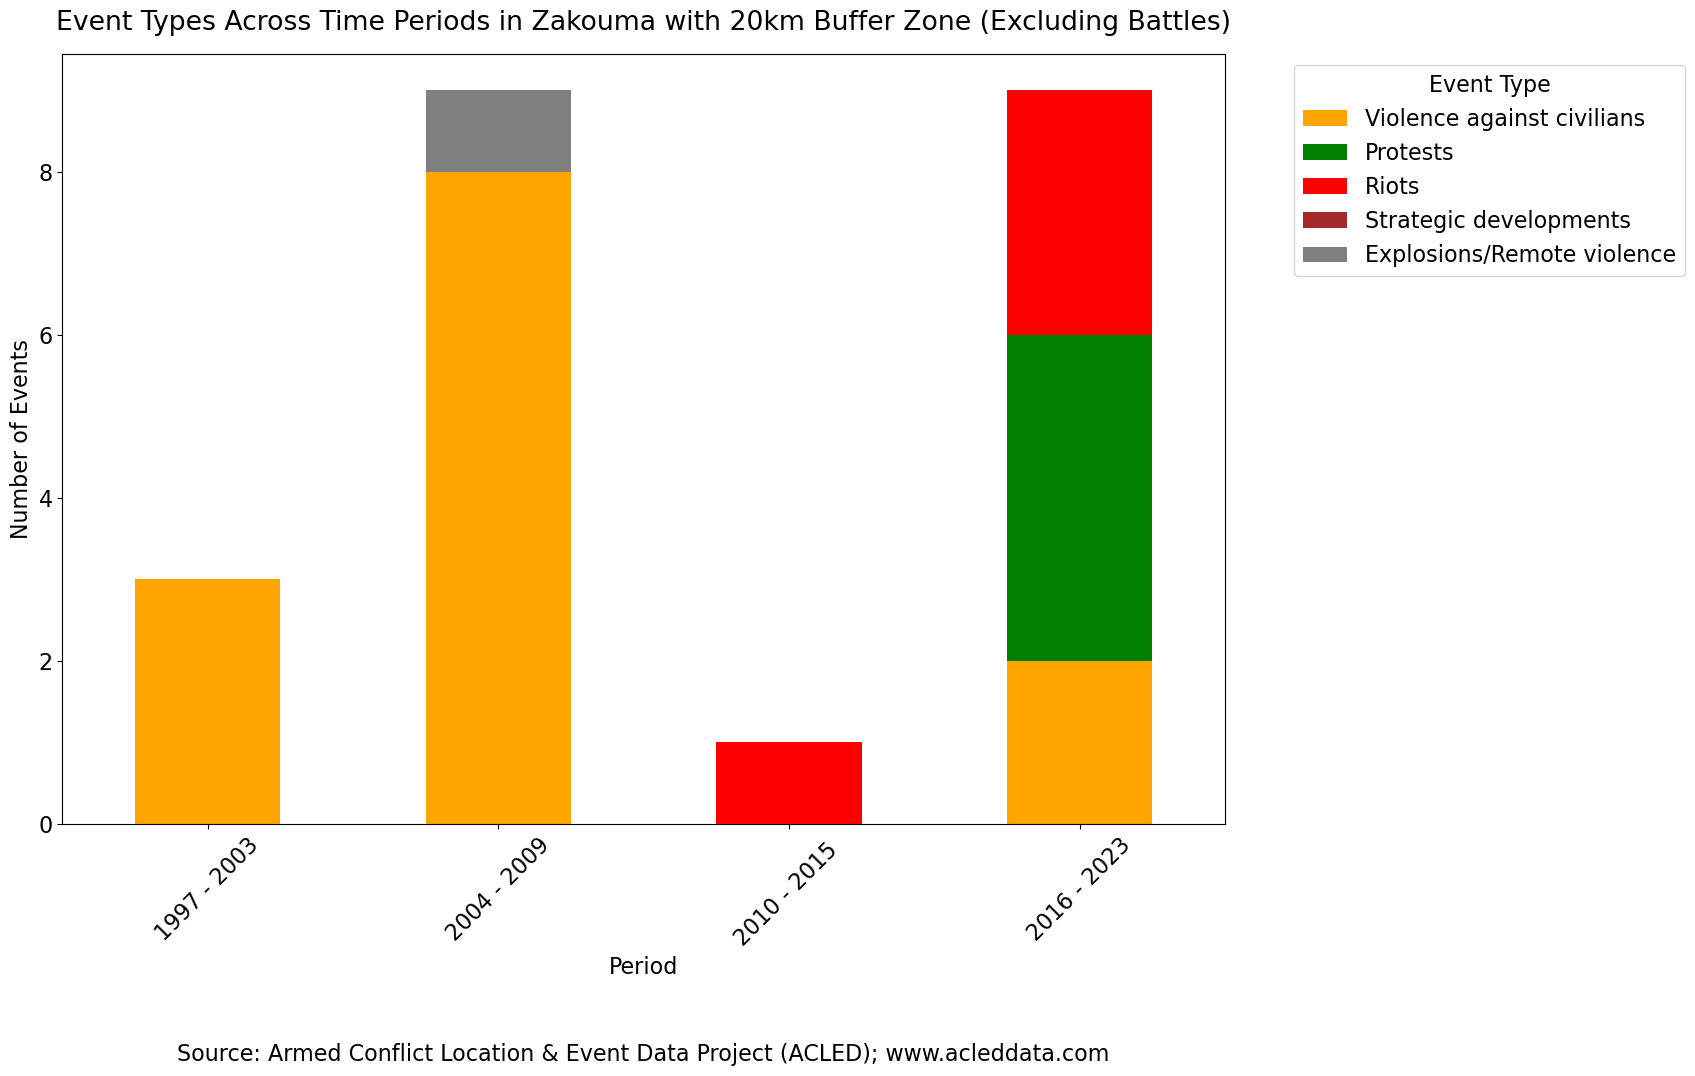

In [333]:
# 'geometry' is the geometry column in zakouma_gdf
zakouma_gdf = gpd.GeoDataFrame(zakouma_gdf, geometry='geometry')

# Spatial join to find events within merged_gdf2
zakouma_within_merged = gpd.sjoin(zakouma_gdf, merged_gdf, how="inner", op="within")

# Convert 'year' to numeric format
zakouma_within_merged['year'] = pd.to_numeric(zakouma_within_merged['year'], errors='coerce')


# Define time periods for the province data
pre_2010_1 = zakouma_within_merged[(zakouma_within_merged['year'] >= 1997) & (zakouma_within_merged['year'] < 2004)]
pre_2010_2 = zakouma_within_merged[(zakouma_within_merged['year'] >= 2004) & (zakouma_within_merged['year'] <= 2009)]
post_2010_1 = zakouma_within_merged[(zakouma_within_merged['year'] >= 2010) & (zakouma_within_merged['year'] <= 2015)]
post_2010_2 = zakouma_within_merged[(zakouma_within_merged['year'] >= 2016) & (zakouma_within_merged['year'] <= 2023)]

# Filter out "Battles"
pre_2010_1 = pre_2010_1[pre_2010_1['event_type'] != 'Battles']
pre_2010_2 = pre_2010_2[pre_2010_2['event_type'] != 'Battles']
post_2010_1 = post_2010_1[post_2010_1['event_type'] != 'Battles']
post_2010_2 = post_2010_2[post_2010_2['event_type'] != 'Battles']

# Create pivot tables for event types for each time period
pivot_pre_2010_1 = pd.pivot_table(pre_2010_1, values='event_id_cnty', index='event_type', aggfunc='count', fill_value=0)
pivot_pre_2010_2 = pd.pivot_table(pre_2010_2, values='event_id_cnty', index='event_type', aggfunc='count', fill_value=0)
pivot_post_2010_1 = pd.pivot_table(post_2010_1, values='event_id_cnty', index='event_type', aggfunc='count', fill_value=0)
pivot_post_2010_2 = pd.pivot_table(post_2010_2, values='event_id_cnty', index='event_type', aggfunc='count', fill_value=0)

# Define colors for each event type consistently
event_type_colors = {
    'Violence against civilians': 'orange',
    'Protests': 'green',
    'Riots': 'red',
    'Strategic developments': 'brown',
    'Explosions/Remote violence': 'grey'
}

# Apply the same color mapping to all the pivot tables
pivot_pre_2010_1 = pivot_pre_2010_1.reindex(event_type_colors.keys()).fillna(0)
pivot_pre_2010_2 = pivot_pre_2010_2.reindex(event_type_colors.keys()).fillna(0)
pivot_post_2010_1 = pivot_post_2010_1.reindex(event_type_colors.keys()).fillna(0)
pivot_post_2010_2 = pivot_post_2010_2.reindex(event_type_colors.keys()).fillna(0)


# Combine the pivot tables
combined_pivot = pd.concat([pivot_pre_2010_1, pivot_pre_2010_2, pivot_post_2010_1, pivot_post_2010_2],
                           axis=1,
                           keys=['1997 - 2004', '2004 - 2010', '2010 - 2015 ', '2015 - 2023'])

# Transpose the DataFrame to have periods as columns
combined_pivot = combined_pivot.T

# Set the font size
plt.rc('font', size=16)

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(15, 10))
combined_pivot.plot(kind='bar', stacked=True, color=[event_type_colors[event] for event in combined_pivot.columns], rot=45, ax=ax)
plt.xlabel('Period')
plt.ylabel('Number of Events')
plt.title('Event Types Across Time Periods in Zakouma with 20km Buffer Zone (Excluding Battles)',y=1.02)

# Set x-axis labels to the periods
plt.xticks(range(4), ['1997 - 2003', '2004 - 2009', '2010 - 2015 ', '2016 - 2023'], rotation=45)

# Add source text at the bottom
source_text = "Source: Armed Conflict Location & Event Data Project (ACLED); www.acleddata.com"
plt.text(0.5, -0.30, source_text, ha='center', va='center', transform=ax.transAxes, fontsize=16)

# Move the legend inside and customize its location
plt.legend(title='Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save it as an image
plt.savefig('Grouped_Bar_Periods_20km_excl_battles.png', dpi=300, bbox_inches='tight')

plt.show()


<font size="6"> 5KM BUFFER ZONE<font>

In [29]:
# Specify the path to the shapefile 
shapefile_path = 'Zakouma\Buffer_GZE_5km.shp'

# Read the shapefile using GeoPandas
gdf2 = gpd.read_file(shapefile_path)

# Display the GeoDataFrame
gdf2.head()

Shape_Leng  Shape_Area                                           geometry
0   22.157745     0.49769  MULTIPOLYGON Z (((18.42483 10.67784 0.00000, 1...

In [30]:
# Perform a spatial overlay using the buffer zone ('gdf1') and the national park ('gdf')
merged_gdf2 = overlay(gdf, gdf2, how='union')

# Display the merged GeoDataFrame
merged_gdf2.head()

ID_   ID                                      Nom  fid_1  OID_  \
0  0.0  0.0  Grand Ecosystème Fonctionnel de Zakouma    0.0   0.0   
1  0.0  0.0  Grand Ecosystème Fonctionnel de Zakouma    0.0   0.0   
2  NaN  NaN                                      NaN    NaN   NaN   

                                      Name FolderPath  SymbolID  AltMode  \
0  Grand Ecosystème Fonctionnel de Zakouma       None       0.0      0.0   
1  Grand Ecosystème Fonctionnel de Zakouma       None       0.0      0.0   
2                                      NaN        NaN       NaN      NaN   

   Base  ...  PERIMETER  layer  path area_sqkm  area_new  Shape_Le_1  \
0   0.0  ...        0.0   None  None       0.0       0.0   12.264766   
1   0.0  ...        0.0   None  None       0.0       0.0    7.439705   
2   NaN  ...        NaN   None  None       NaN       NaN         NaN   

   Shape_Area_1  Shape_Leng_2  Shape_Area_2  \
0      2.582170           NaN           NaN   
1      0.614148           NaN           NaN   
2           NaN     22.157745       0.49769   

                                            geometry  
0  POLYGON Z ((18.57962 9.85103 0.00000, 18.68584...  
1  POLYGON Z ((18.70001 11.14113 0.00000, 18.7064...  
2  MULTIPOLYGON Z (((19.39208 12.23115 0.00000, 1...  

[3 rows x 28 columns]

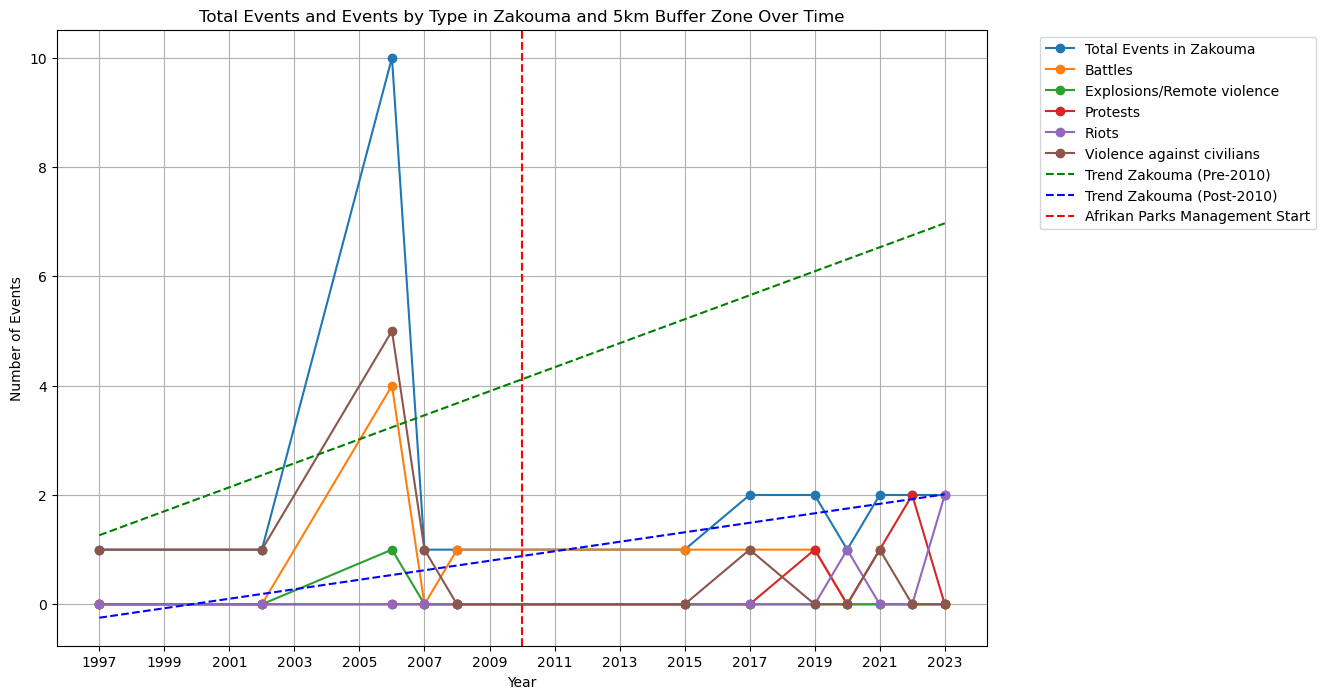

In [27]:
#hide

# 'latitude' and 'longitude' are columns in zakouma_df
geometry = [Point(xy) for xy in zip(zakouma_df['longitude'], zakouma_df['latitude'])]
zakouma_gdf = gpd.GeoDataFrame(zakouma_df, geometry=geometry)

# Set CRS for the GeoDataFrame
zakouma_gdf.crs = "EPSG:4326"

# Perform the spatial join with the merged GeoDataFrame
zakouma_within_shape = gpd.sjoin(zakouma_gdf, merged_gdf2, how="inner", op="within")

# Filter data for incidents in the specified region inside the shape and buffer zones
region_data = zakouma_within_shape.copy()

# Convert 'year' to integer format
region_data['year'] = region_data['year'].astype(int)

# Add a vertical line at the year 2010
afrikan_parks_start_year = 2010

# Total incidents in the region timeline
total_events_region_timeline = region_data.groupby('year').size().reset_index(name='total_events_region')

# Incidents in the region timeline by event type
events_by_type_region_timeline = region_data.groupby(['year', 'event_type']).size().unstack(fill_value=0).reset_index()

# Linear regression for Zakouma (pre-2010)
reg_zakouma_pre_2010 = LinearRegression().fit(total_events_region_timeline[total_events_region_timeline['year'] < afrikan_parks_start_year][['year']], 
                                               total_events_region_timeline[total_events_region_timeline['year'] < afrikan_parks_start_year]['total_events_region'])
total_events_region_timeline['trend_zakouma_pre_2010'] = reg_zakouma_pre_2010.predict(total_events_region_timeline[['year']])

# Linear regression for Zakouma (post-2010)
reg_zakouma_post_2010 = LinearRegression().fit(total_events_region_timeline[total_events_region_timeline['year'] >= afrikan_parks_start_year][['year']], 
                                                total_events_region_timeline[total_events_region_timeline['year'] >= afrikan_parks_start_year]['total_events_region'])
total_events_region_timeline['trend_zakouma_post_2010'] = reg_zakouma_post_2010.predict(total_events_region_timeline[['year']])

# Plot the timeline for Zakouma
plt.figure(figsize=(12, 8))

# Plot total incidents in the region
plt.plot(total_events_region_timeline['year'], total_events_region_timeline['total_events_region'],
         marker='o', linestyle='-', label='Total Events in Zakouma')

# Plot separate incident types in the region
for event_type in events_by_type_region_timeline.columns[1:]:
    plt.plot(total_events_region_timeline['year'], events_by_type_region_timeline[event_type],
             marker='o', linestyle='-', label=event_type)

# Plot trend line for total incidents in Zakouma (pre-2010)
plt.plot(total_events_region_timeline['year'], total_events_region_timeline['trend_zakouma_pre_2010'],
         marker='', linestyle='--', color='green', label='Trend Zakouma (Pre-2010)')

# Plot trend line for total incidents in Zakouma (post-2010)
plt.plot(total_events_region_timeline['year'], total_events_region_timeline['trend_zakouma_post_2010'],
         marker='', linestyle='--', color='blue', label='Trend Zakouma (Post-2010)')

# Add a vertical line at the year 2010
plt.axvline(x=afrikan_parks_start_year, color='red', linestyle='--', label='Afrikan Parks Management Start')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.title('Total Events and Events by Type in Zakouma and 5km Buffer Zone Over Time')

# Set x-axis ticks to start from 1997 to 2023 and show every year
plt.xticks(range(1997, 2024, 2))

# Show the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.grid(True)
plt.show()

<li>Trend lines diverge which suggests that the increase in total events in Zakouma and the 20km buffer zone is comparatively less than the event increase for chad and the surrounding provinces after 2010</li>

Total events before 2010: 14
Total events after 2010: 12


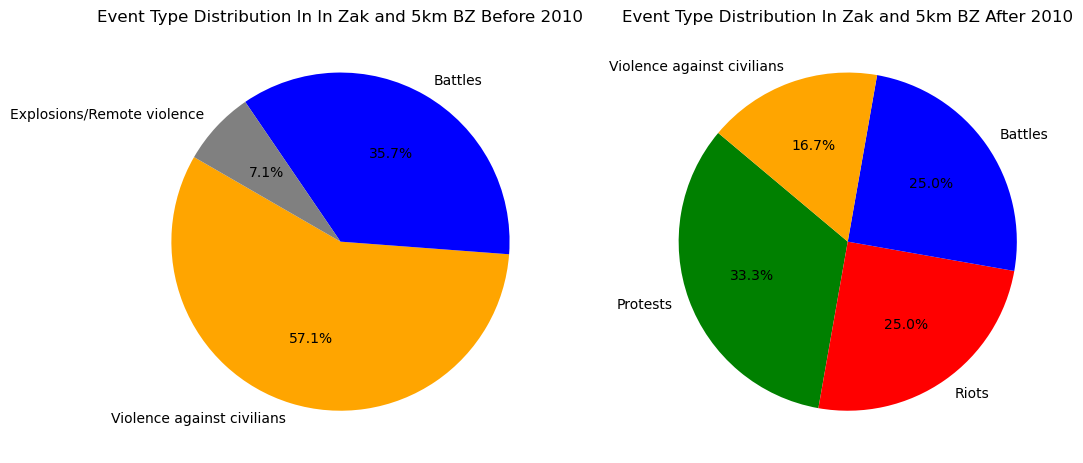

In [50]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 'geometry' is the geometry column in zakouma_gdf
zakouma_gdf = gpd.GeoDataFrame(zakouma_gdf, geometry='geometry')

# Spatial join to find events within merged_gdf
zakouma_within_merged = gpd.sjoin(zakouma_gdf, merged_gdf2, how="inner", op="within")

# Convert 'year' to numeric format
zakouma_within_merged['year'] = pd.to_numeric(zakouma_within_merged['year'], errors='coerce')

# Get total counts for events before and after 2010
total_events_before_2010 = (zakouma_within_merged['year'] < 2010).sum()
total_events_after_2010 = (zakouma_within_merged['year'] >= 2010).sum()

# Filter data for events before and after 2010
events_before_2010 = zakouma_within_merged[zakouma_within_merged['year'] < 2010]
events_after_2010 = zakouma_within_merged[zakouma_within_merged['year'] >= 2010]

# Calculate the percentage of each event type before 2010
event_type_percentage_before = events_before_2010['event_type'].value_counts(normalize=True) * 100

# Calculate the percentage of each event type after 2010
event_type_percentage_after = events_after_2010['event_type'].value_counts(normalize=True) * 100

# Plot pie chart for events before 2010
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(event_type_percentage_before, labels=event_type_percentage_before.index, autopct='%1.1f%%', startangle=150, colors=[event_type_colors.get(event_type, 'gray') for event_type in event_type_percentage_before.index])
plt.title('Event Type Distribution In In Zak and 5km BZ Before 2010')

# Plot pie chart for events after 2010
plt.subplot(1, 2, 2)
plt.pie(event_type_percentage_after, labels=event_type_percentage_after.index, autopct='%1.1f%%', startangle=140, colors=[event_type_colors.get(event_type, 'gray') for event_type in event_type_percentage_after.index])
plt.title('Event Type Distribution In Zak and 5km BZ After 2010')

# Show the total counts
print("Total events before 2010:", total_events_before_2010)
print("Total events after 2010:", total_events_after_2010)

plt.show()

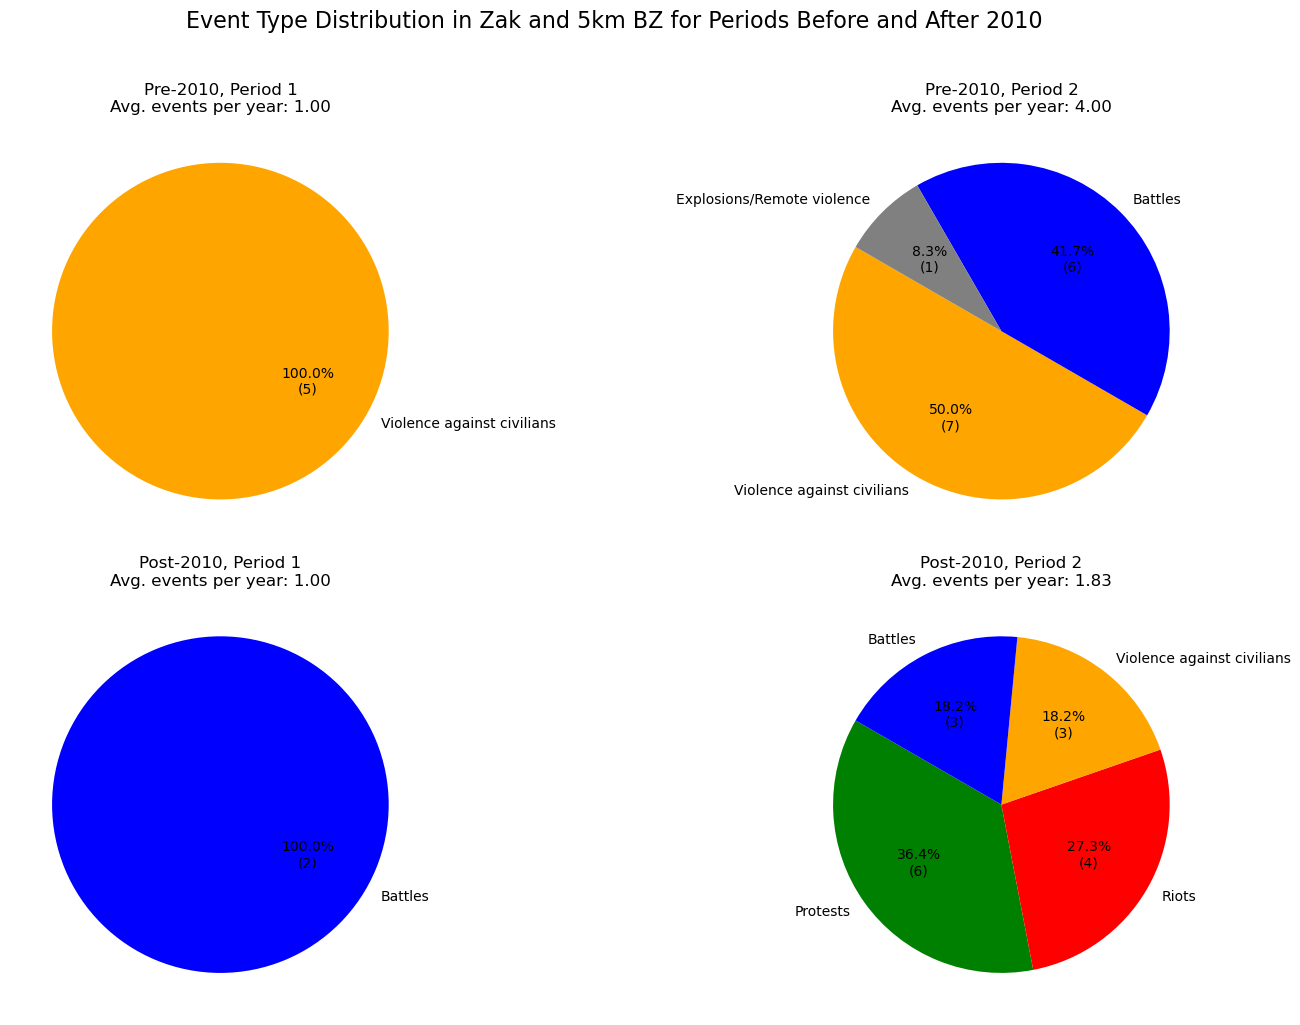

In [49]:
#'geometry' is the geometry column in zakouma_gdf
zakouma_gdf = gpd.GeoDataFrame(zakouma_gdf, geometry='geometry')

# Spatial join to find events within merged_gdf
zakouma_within_merged = gpd.sjoin(zakouma_gdf, merged_gdf2, how="inner", op="within")

# Convert 'year' to numeric format
zakouma_within_merged['year'] = pd.to_numeric(zakouma_within_merged['year'], errors='coerce')

# Define time periods
pre_2010_1 = zakouma_within_merged[(zakouma_within_merged['year'] >= 1997) & (zakouma_within_merged['year'] <= 2004)]
pre_2010_2 = zakouma_within_merged[(zakouma_within_merged['year'] >= 2005) & (zakouma_within_merged['year'] < 2010)]
post_2010_1 = zakouma_within_merged[(zakouma_within_merged['year'] >= 2010) & (zakouma_within_merged['year'] <= 2015)]
post_2010_2 = zakouma_within_merged[(zakouma_within_merged['year'] >= 2016) & (zakouma_within_merged['year'] <= 2023)]

# Calculate the percentage of each event type for each time period
event_type_percentage_pre_2010_1 = pre_2010_1['event_type'].value_counts(normalize=True) * 100
event_type_percentage_pre_2010_2 = pre_2010_2['event_type'].value_counts(normalize=True) * 100
event_type_percentage_post_2010_1 = post_2010_1['event_type'].value_counts(normalize=True) * 100
event_type_percentage_post_2010_2 = post_2010_2['event_type'].value_counts(normalize=True) * 100

# Calculate average events per year for each time period
avg_events_per_year_pre_2010_1 = len(pre_2010_1) / len(pre_2010_1['year'].unique())
avg_events_per_year_pre_2010_2 = len(pre_2010_2) / len(pre_2010_2['year'].unique())
avg_events_per_year_post_2010_1 = len(post_2010_1) / len(post_2010_1['year'].unique())
avg_events_per_year_post_2010_2 = len(post_2010_2) / len(post_2010_2['year'].unique())

# Define colors for each event type
event_type_colors = {
    'Battles': 'blue',
    'Violence against civilians': 'orange',
    'Protests': 'green',
    'Riots': 'red',
    'Strategic developments': 'brown',
    'Explosions/Remote violence': 'grey'
}

# Plot pie charts for each time period
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Event Type Distribution in Zak and 5km BZ for Periods Before and After 2010', fontsize=16, y=1.02)  
axes = axes.flatten()

# Plot pie chart for pre-2010, period 1
wedges, texts, autotexts = axes[0].pie(event_type_percentage_pre_2010_1, labels=event_type_percentage_pre_2010_1.index, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * total_events_pre_2010_1 / 100), startangle=150, colors=[event_type_colors.get(event_type, 'gray') for event_type in event_type_percentage_pre_2010_1.index])
axes[0].set_title('Pre-2010, Period 1\nAvg. events per year: {:.2f}'.format(avg_events_per_year_pre_2010_1))

# Plot pie chart for pre-2010, period 2
wedges, texts, autotexts = axes[1].pie(event_type_percentage_pre_2010_2, labels=event_type_percentage_pre_2010_2.index, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * total_events_pre_2010_2 / 100), startangle=150, colors=[event_type_colors.get(event_type, 'gray') for event_type in event_type_percentage_pre_2010_2.index])
axes[1].set_title('Pre-2010, Period 2\nAvg. events per year: {:.2f}'.format(avg_events_per_year_pre_2010_2))

# Plot pie chart for post-2010, period 1
wedges, texts, autotexts = axes[2].pie(event_type_percentage_post_2010_1, labels=event_type_percentage_post_2010_1.index, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * total_events_post_2010_1 / 100), startangle=150, colors=[event_type_colors.get(event_type, 'gray') for event_type in event_type_percentage_post_2010_1.index])
axes[2].set_title('Post-2010, Period 1\nAvg. events per year: {:.2f}'.format(avg_events_per_year_post_2010_1))

# Plot pie chart for post-2010, period 2
wedges, texts, autotexts = axes[3].pie(event_type_percentage_post_2010_2, labels=event_type_percentage_post_2010_2.index, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * total_events_post_2010_2 / 100), startangle=150, colors=[event_type_colors.get(event_type, 'gray') for event_type in event_type_percentage_post_2010_2.index])
axes[3].set_title('Post-2010, Period 2\nAvg. events per year: {:.2f}'.format(avg_events_per_year_post_2010_2))

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

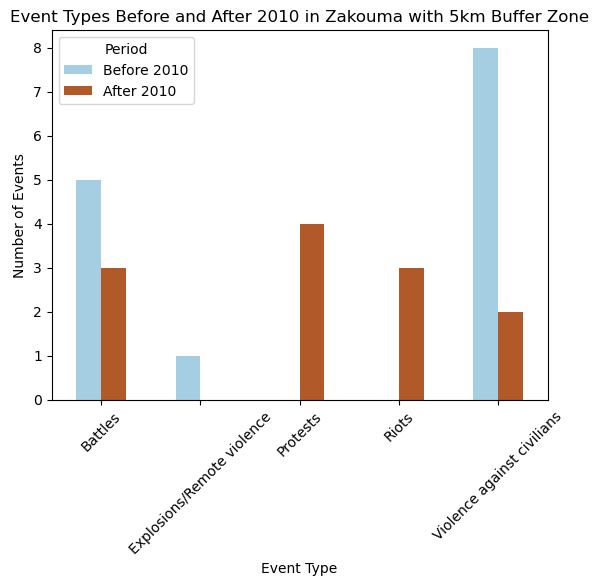

In [51]:
#hide

# 'geometry' is the geometry column in zakouma_gdf
zakouma_gdf = gpd.GeoDataFrame(zakouma_gdf, geometry='geometry')

# Spatial join to find events within merged_gdf
zakouma_within_merged = gpd.sjoin(zakouma_gdf, merged_gdf2, how="inner", op="within")

# Convert 'year' to numeric format
zakouma_within_merged['year'] = pd.to_numeric(zakouma_within_merged['year'], errors='coerce')

# Filter data for events before and after 2010
events_before_2010 = zakouma_within_merged[zakouma_within_merged['year'] < 2010]
events_after_2010 = zakouma_within_merged[zakouma_within_merged['year'] >= 2010]

# Create a DataFrame for event counts before and after 2010
event_counts = pd.DataFrame({
    'Before 2010': events_before_2010['event_type'].value_counts(),
    'After 2010': events_after_2010['event_type'].value_counts()
}).fillna(0)

# Plot the grouped bar chart
plt.figure(figsize=(12, 8))
event_counts.plot(kind='bar', colormap='Paired', rot=45)
plt.xlabel('Event Type')
plt.ylabel('Number of Events')
plt.title('Event Types Before and After 2010 in Zakouma with 5km Buffer Zone')
plt.legend(title='Period')
plt.show()

<li>There was a decrease in the number of battles and explosions/remote violence in Zakouma and 5km buffer zone after 2010.</li>
<li>There was a noticeable increase in protests and riots in Zakouma and 5km buffer zone after 2010.</li>
<li>There was a noticeable decrease in violence against civilians in Zakouma and 5km buffer zone after 2010. </li>

Source: Armed Conflict Location & Event Data Project (ACLED); www.acleddata.com

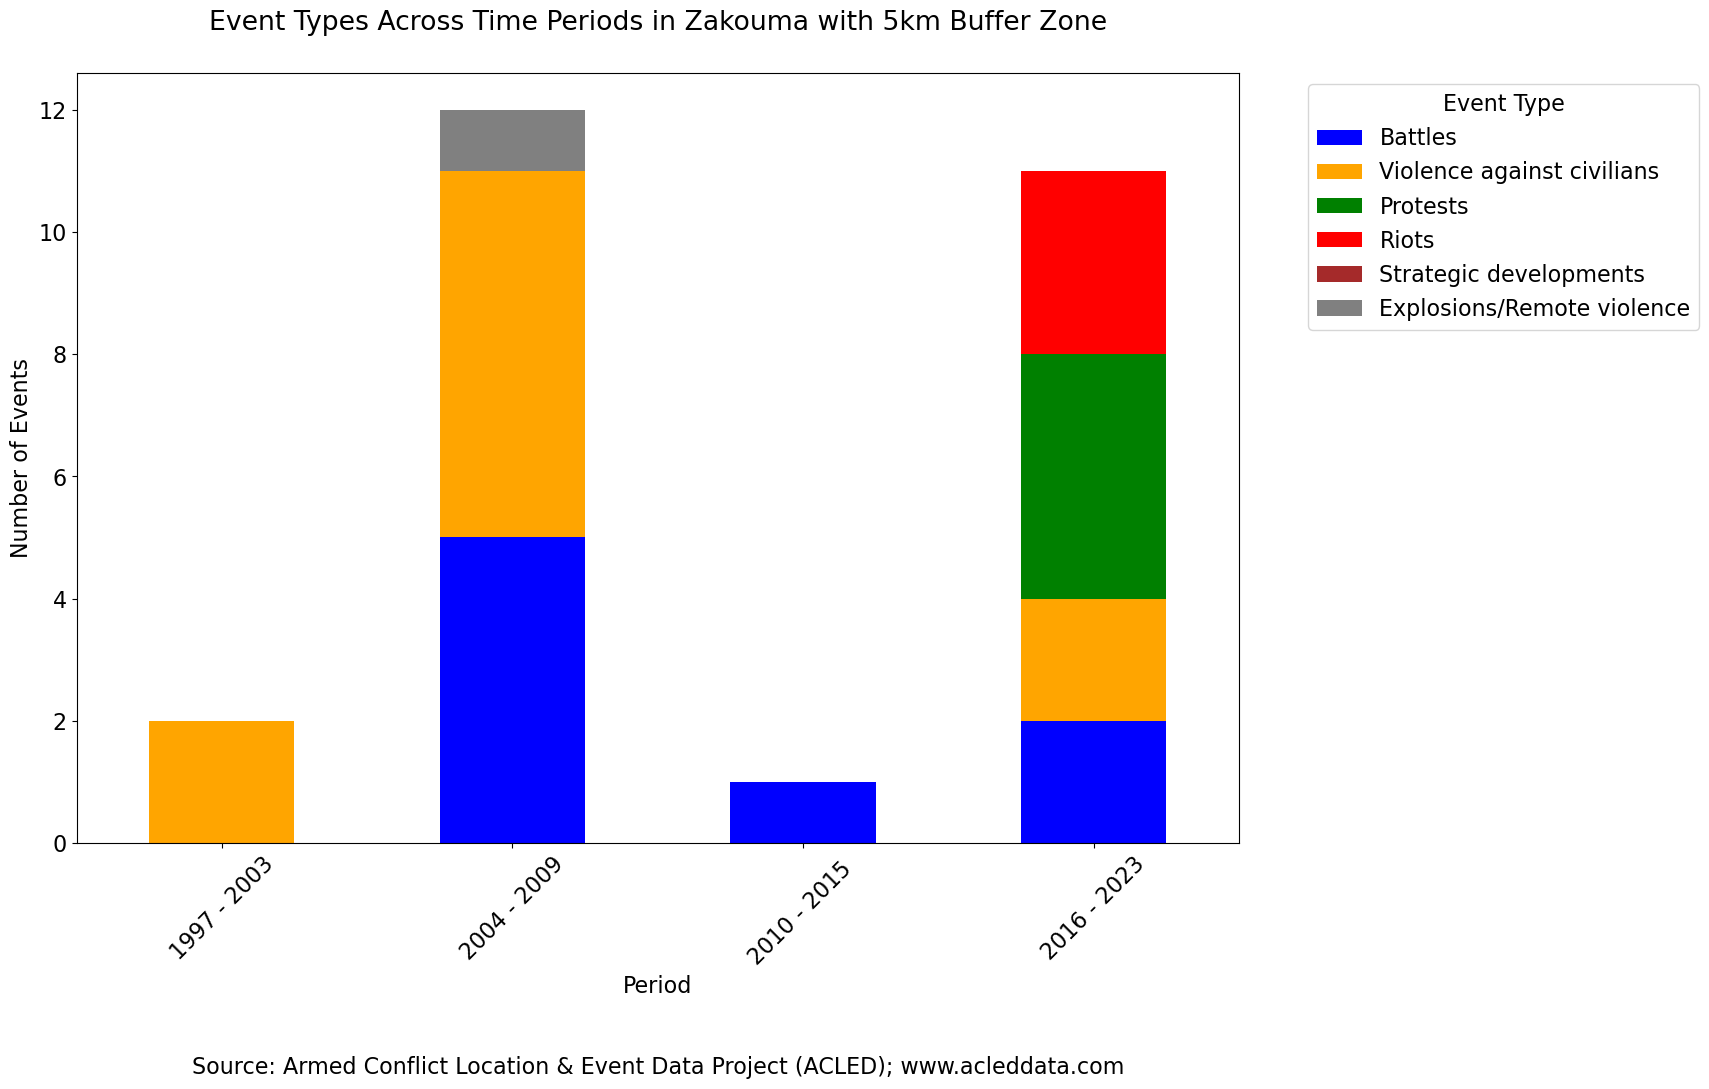

In [334]:
# 'geometry' is the geometry column in your zakouma_gdf
zakouma_gdf = gpd.GeoDataFrame(zakouma_gdf, geometry='geometry')

# Spatial join to find events within merged_gdf2
zakouma_within_merged = gpd.sjoin(zakouma_gdf, merged_gdf2, how="inner", op="within")

# Convert 'year' to numeric format
zakouma_within_merged['year'] = pd.to_numeric(zakouma_within_merged['year'], errors='coerce')


# Define time periods for the province data
pre_2010_1 = zakouma_within_merged[(zakouma_within_merged['year'] >= 1997) & (zakouma_within_merged['year'] <= 2004)]
pre_2010_2 = zakouma_within_merged[(zakouma_within_merged['year'] >= 2005) & (zakouma_within_merged['year'] < 2010)]
post_2010_1 = zakouma_within_merged[(zakouma_within_merged['year'] >= 2010) & (zakouma_within_merged['year'] <= 2015)]
post_2010_2 = zakouma_within_merged[(zakouma_within_merged['year'] >= 2016) & (zakouma_within_merged['year'] <= 2023)]

# Create pivot tables for event types for each time period
pivot_pre_2010_1 = pd.pivot_table(pre_2010_1, values='event_id_cnty', index='event_type', aggfunc='count', fill_value=0)
pivot_pre_2010_2 = pd.pivot_table(pre_2010_2, values='event_id_cnty', index='event_type', aggfunc='count', fill_value=0)
pivot_post_2010_1 = pd.pivot_table(post_2010_1, values='event_id_cnty', index='event_type', aggfunc='count', fill_value=0)
pivot_post_2010_2 = pd.pivot_table(post_2010_2, values='event_id_cnty', index='event_type', aggfunc='count', fill_value=0)

# Define colors for each event type consistently
event_type_colors = {
    'Battles': 'blue',
    'Violence against civilians': 'orange',
    'Protests': 'green',
    'Riots': 'red',
    'Strategic developments': 'brown',
    'Explosions/Remote violence': 'grey'
}

# Apply the same color mapping to all the pivot tables
pivot_pre_2010_1 = pivot_pre_2010_1.reindex(event_type_colors.keys()).fillna(0)
pivot_pre_2010_2 = pivot_pre_2010_2.reindex(event_type_colors.keys()).fillna(0)
pivot_post_2010_1 = pivot_post_2010_1.reindex(event_type_colors.keys()).fillna(0)
pivot_post_2010_2 = pivot_post_2010_2.reindex(event_type_colors.keys()).fillna(0)


# Combine the pivot tables
combined_pivot = pd.concat([pivot_pre_2010_1, pivot_pre_2010_2, pivot_post_2010_1, pivot_post_2010_2],
                           axis=1,
                           keys=['1997 - 2004', '2004 - 2010', '2010 - 2015 ', '2015 - 2023'])

# Transpose the DataFrame to have periods as columns
combined_pivot = combined_pivot.T

# Set the font size
plt.rc('font', size=16)

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(15, 10))
combined_pivot.plot(kind='bar', stacked=True, color=[event_type_colors[event] for event in combined_pivot.columns], rot=45, ax=ax)
plt.xlabel('Period')
plt.ylabel('Number of Events')
plt.title('Event Types Across Time Periods in Zakouma with 5km Buffer Zone', y=1.02)  # Increase the vertical distance between plot and title

# Set x-axis labels to the periods
plt.xticks(range(4), ['1997 - 2003', '2004 - 2009', '2010 - 2015 ', '2016 - 2023'], rotation=45)

# Add a legend and customize location
plt.legend(title='Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add source text at the bottom
source_text = "Source: Armed Conflict Location & Event Data Project (ACLED); www.acleddata.com"
plt.text(0.5, -0.30, source_text, ha='center', fontsize=16, transform=plt.gca().transAxes)

# Adjust the position and padding of the title to add space between the title and the plot
plt.title('Event Types Across Time Periods in Zakouma with 5km Buffer Zone', y=1.02, pad=20)

# Save it as an image
plt.savefig('Grouped_Bar_Periods_5km.png', dpi=300, bbox_inches='tight')

plt.show()

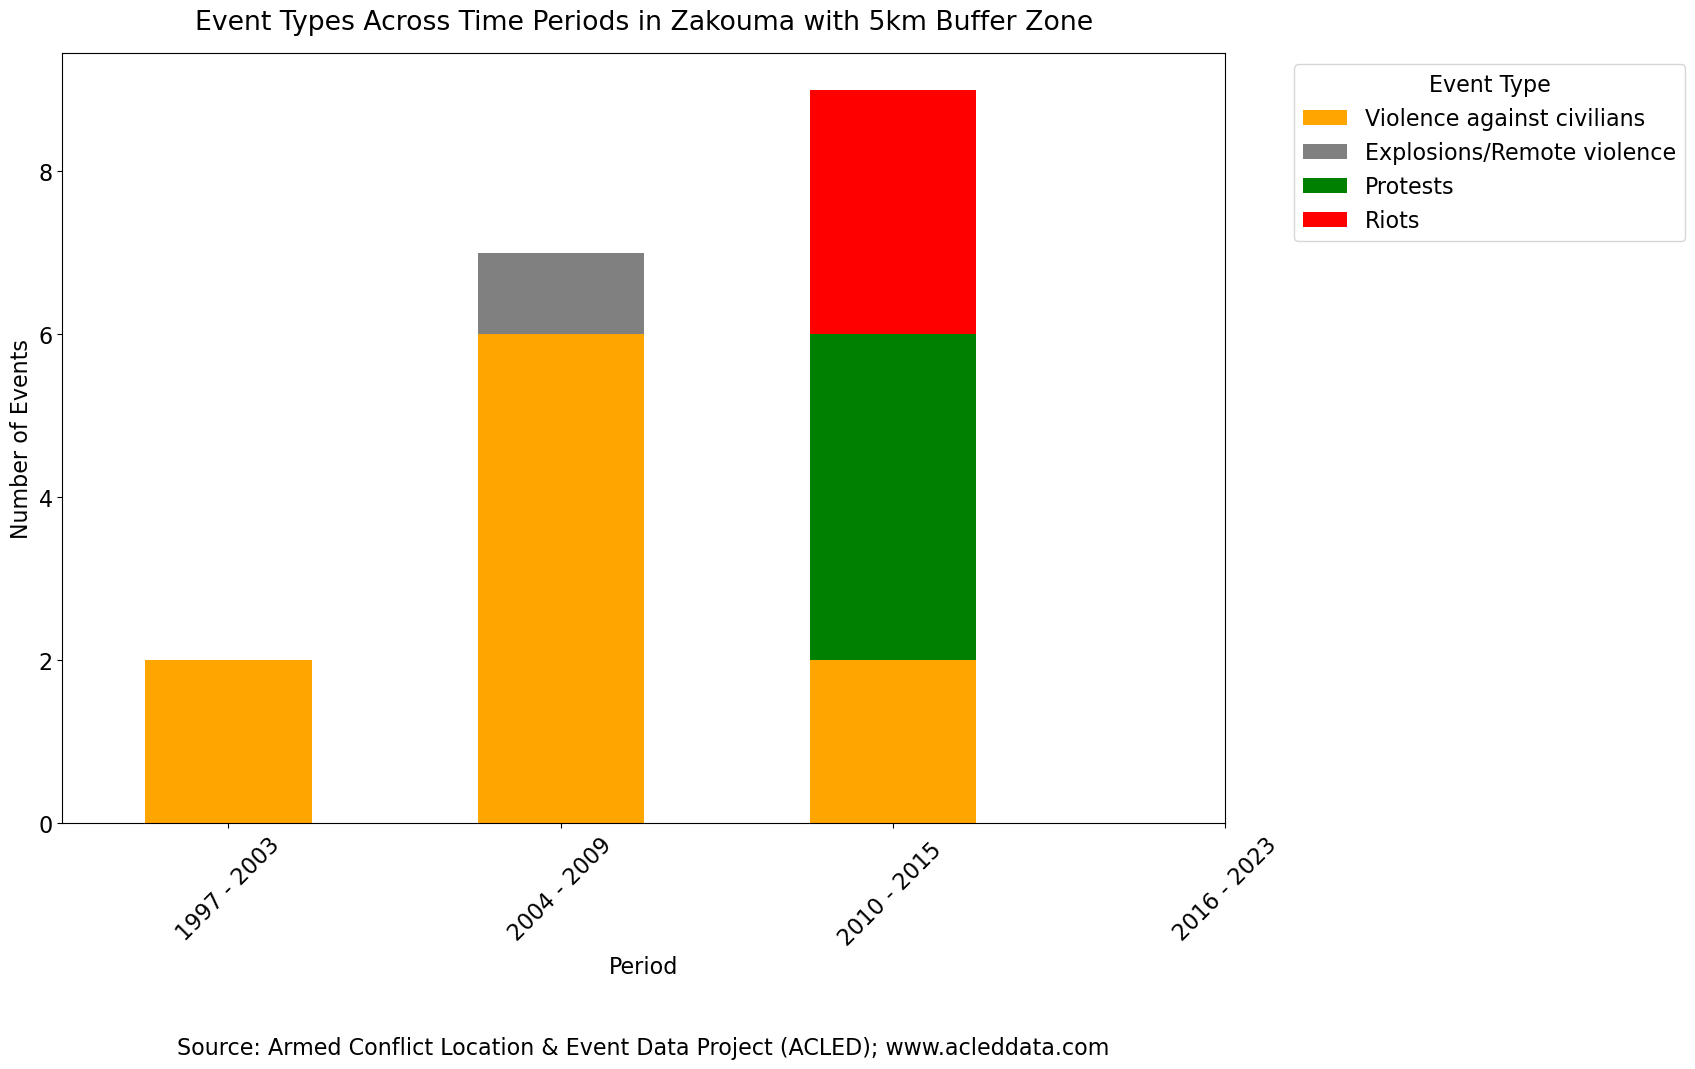

In [309]:

import numpy as np
# 'geometry' is the geometry column in your zakouma_gdf
zakouma_gdf = gpd.GeoDataFrame(zakouma_gdf, geometry='geometry')

# Spatial join to find events within merged_gdf2
zakouma_within_merged = gpd.sjoin(zakouma_gdf, merged_gdf2, how="inner", op="within")

# Convert 'year' to numeric format
zakouma_within_merged['year'] = pd.to_numeric(zakouma_within_merged['year'], errors='coerce')


# Define time periods for the province data
pre_2010_1 = zakouma_within_merged[(zakouma_within_merged['year'] >= 1997) & (zakouma_within_merged['year'] <= 2004)]
pre_2010_2 = zakouma_within_merged[(zakouma_within_merged['year'] >= 2005) & (zakouma_within_merged['year'] <= 2009)]
post_2010_1 = zakouma_within_merged[(zakouma_within_merged['year'] >= 2010) & (zakouma_within_merged['year'] <= 2015)]
post_2010_2 = zakouma_within_merged[(zakouma_within_merged['year'] >= 2016) & (zakouma_within_merged['year'] <= 2023)]

# Filter out "Battles" before creating pivot tables
pre_2010_1 = pre_2010_1[pre_2010_1['event_type'] != 'Battles']
pre_2010_2 = pre_2010_2[pre_2010_2['event_type'] != 'Battles']
post_2010_1 = post_2010_1[post_2010_1['event_type'] != 'Battles']
post_2010_2 = post_2010_2[post_2010_2['event_type'] != 'Battles']

# Create pivot tables for event types for each time period
pivot_pre_2010_1 = pd.pivot_table(pre_2010_1, values='event_id_cnty', index='event_type', aggfunc='count', fill_value=0)
pivot_pre_2010_2 = pd.pivot_table(pre_2010_2, values='event_id_cnty', index='event_type', aggfunc='count', fill_value=0)
pivot_post_2010_1 = pd.pivot_table(post_2010_1, values='event_id_cnty', index='event_type', aggfunc='count', fill_value=0)
pivot_post_2010_2 = pd.pivot_table(post_2010_2, values='event_id_cnty', index='event_type', aggfunc='count', fill_value=0)

# Combine the pivot tables
combined_pivot = pd.concat([pivot_pre_2010_1, pivot_pre_2010_2, pivot_post_2010_1, pivot_post_2010_2],
                           axis=1,
                           keys=['1997 - 2003', '2004 - 2009', '2010 - 2015 ', '2016 - 2023'])

# Transpose the DataFrame to have periods as columns
combined_pivot = combined_pivot.T

# Set the font size
plt.rc('font', size=16)

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(15, 10))
combined_pivot.plot(kind='bar', stacked=True, color=[event_type_colors[event] for event in combined_pivot.columns], rot=45, ax=ax)
plt.xlabel('Period')
plt.ylabel('Number of Events')
plt.title('Event Types Across Time Periods in Zakouma with 5km Buffer Zone', y=1.02)  # Increase the vertical distance between plot and title

# Set x-axis labels to the periods
plt.xticks(range(4), ['1997 - 2003', '2004 - 2009', '2010 - 2015 ', '2016 - 2023'], rotation=45)

# Add a legend and customize location
plt.legend(title='Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add source text at the bottom
source_text = "Source: Armed Conflict Location & Event Data Project (ACLED); www.acleddata.com"
plt.text(0.5, -0.30, source_text, ha='center', fontsize=16, transform=plt.gca().transAxes)

# Save it as an image
plt.savefig('Grouped_Bar_Periods_5km_exc_battles.png', dpi=300, bbox_inches='tight')

plt.show()

<Figure size 1200x800 with 0 Axes>

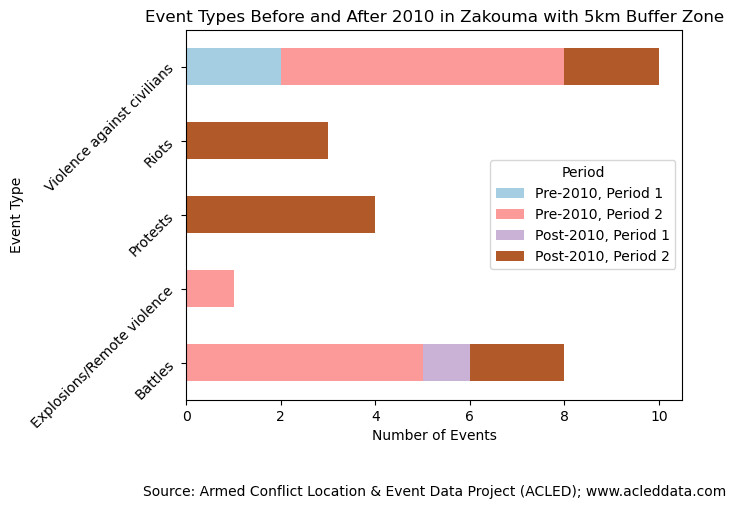

In [152]:
# Assuming 'geometry' is the geometry column in your zakouma_gdf
zakouma_gdf = gpd.GeoDataFrame(zakouma_gdf, geometry='geometry')

# Spatial join to find events within merged_gdf2
zakouma_within_merged = gpd.sjoin(zakouma_gdf, merged_gdf2, how="inner", op="within")

# Convert 'year' to numeric format
zakouma_within_merged['year'] = pd.to_numeric(zakouma_within_merged['year'], errors='coerce')

# Define time periods
pre_2010_1 = zakouma_within_merged[(zakouma_within_merged['year'] >= 1997) & (zakouma_within_merged['year'] <= 2004)]
pre_2010_2 = zakouma_within_merged[(zakouma_within_merged['year'] >= 2005) & (zakouma_within_merged['year'] <= 2010)]
post_2010_1 = zakouma_within_merged[(zakouma_within_merged['year'] >= 2011) & (zakouma_within_merged['year'] <= 2015)]
post_2010_2 = zakouma_within_merged[(zakouma_within_merged['year'] >= 2016) & (zakouma_within_merged['year'] <= 2023)]

# Create DataFrames for event counts in each time period
event_counts_pre_2010_1 = pre_2010_1['event_type'].value_counts().fillna(0)
event_counts_pre_2010_2 = pre_2010_2['event_type'].value_counts().fillna(0)
event_counts_post_2010_1 = post_2010_1['event_type'].value_counts().fillna(0)
event_counts_post_2010_2 = post_2010_2['event_type'].value_counts().fillna(0)

# Combine event counts into a single DataFrame
combined_event_counts = pd.DataFrame({
    'Pre-2010, Period 1': event_counts_pre_2010_1,
    'Pre-2010, Period 2': event_counts_pre_2010_2,
    'Post-2010, Period 1': event_counts_post_2010_1,
    'Post-2010, Period 2': event_counts_post_2010_2
}).fillna(0)

# Plot the stacked bar chart
plt.figure(figsize=(12, 8))
combined_event_counts.plot(kind='barh', stacked=True, colormap='Paired', rot=45)
plt.ylabel('Event Type')
plt.xlabel('Number of Events')
plt.title('Event Types Before and After 2010 in Zakouma with 5km Buffer Zone')
plt.legend(title='Period')

# Add source text at the bottom
source_text = "Source: Armed Conflict Location & Event Data Project (ACLED); www.acleddata.com"
plt.text(0.5, -0.25, source_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)

# Save it as an image
plt.savefig('Stacked_Bar_Zakouma_Merged_Zone.png', dpi=300, bbox_inches='tight')

plt.show()

<font size="6"> Surronding Provinces <font>

In [34]:
# Filter rows where the country is DRC and admin1 is Haut-Uele
zak_prov_data = zakouma_df[(zakouma_df['country'] == 'Chad') & (zakouma_df['admin1'].isin(['Salamat', 'Moyen-Chari']))]

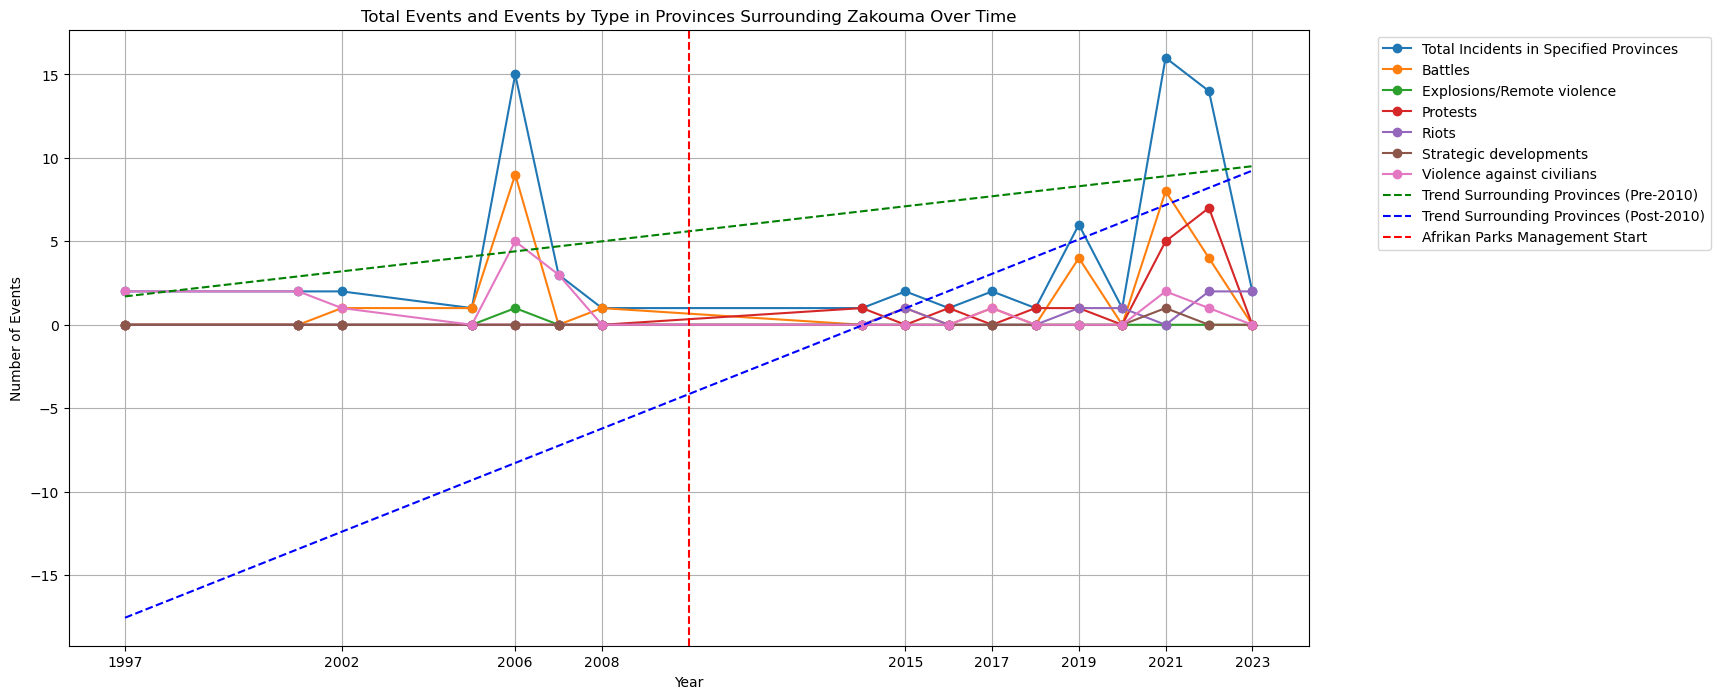

In [35]:
# hide

# Filter data for incidents in the specified provinces
prov_data = zak_prov_data.copy()

# Total incidents in the specified provinces timeline
total_incidents_prov_timeline = prov_data.groupby('year').size().reset_index(name='total_incidents_prov')

# Incidents in the specified provinces timeline by event type
incidents_by_type_prov_timeline = prov_data.groupby(['year', 'event_type']).size().unstack(fill_value=0).reset_index()

# Convert 'year' to numeric format
total_incidents_prov_timeline['year'] = pd.to_numeric(total_incidents_prov_timeline['year'], errors='coerce')

# Add a vertical line at the year 2010
afrikan_parks_start_year = 2010

# Linear regression for specified provinces (pre-2010)
reg_prov_pre_2010 = LinearRegression().fit(total_incidents_prov_timeline[total_incidents_prov_timeline['year'] < afrikan_parks_start_year][['year']], 
                                           total_incidents_prov_timeline[total_incidents_prov_timeline['year'] < afrikan_parks_start_year]['total_incidents_prov'])
total_incidents_prov_timeline['trend_prov_pre_2010'] = reg_prov_pre_2010.predict(total_incidents_prov_timeline[['year']])

# Linear regression for specified provinces (post-2010)
reg_prov_post_2010 = LinearRegression().fit(total_incidents_prov_timeline[total_incidents_prov_timeline['year'] >= afrikan_parks_start_year][['year']], 
                                            total_incidents_prov_timeline[total_incidents_prov_timeline['year'] >= afrikan_parks_start_year]['total_incidents_prov'])
total_incidents_prov_timeline['trend_prov_post_2010'] = reg_prov_post_2010.predict(total_incidents_prov_timeline[['year']])

# Plot the timelines for specified provinces
plt.figure(figsize=(16, 8))

# Plot total incidents in specified provinces
plt.plot(total_incidents_prov_timeline['year'], total_incidents_prov_timeline['total_incidents_prov'],
         marker='o', linestyle='-', label='Total Incidents in Specified Provinces')

# Plot separate incident types in specified provinces
for event_type in incidents_by_type_prov_timeline.columns[1:]:
    plt.plot(total_incidents_prov_timeline['year'], incidents_by_type_prov_timeline[event_type],
             marker='o', linestyle='-', label=event_type)

# Plot trend line for total incidents in specified provinces (pre-2010)
plt.plot(total_incidents_prov_timeline['year'], total_incidents_prov_timeline['trend_prov_pre_2010'],
         marker='', linestyle='--', color='green', label='Trend Surrounding Provinces (Pre-2010)')

# Plot trend line for total incidents in specified provinces (post-2010)
plt.plot(total_incidents_prov_timeline['year'], total_incidents_prov_timeline['trend_prov_post_2010'],
         marker='', linestyle='--', color='blue', label='Trend Surrounding Provinces (Post-2010)')

# Add a vertical line at the year 2010
afrikan_parks_start_year = 2010

# Add a vertical line at the year 2010
plt.axvline(x=afrikan_parks_start_year, color='red', linestyle='--', label='Afrikan Parks Management Start')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.title('Total Events and Events by Type in Provinces Surrounding Zakouma Over Time')

# Set x-axis ticks every two years
plt.xticks(total_incidents_prov_timeline['year'][::2])

# Add a vertical line at the year 2010 if applicable
# Modify the condition based on your data
if 2010 in total_incidents_prov_timeline['year'].values:
    plt.axvline(x=2010, color='red', linestyle='--', label='Afrikan Parks Management')

# Show the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.grid(True)
plt.show()

<li>Trend lines show higher rate of increase in the total event occurrances after 2010 in the surrounding provinces than prior to 2010.</li>

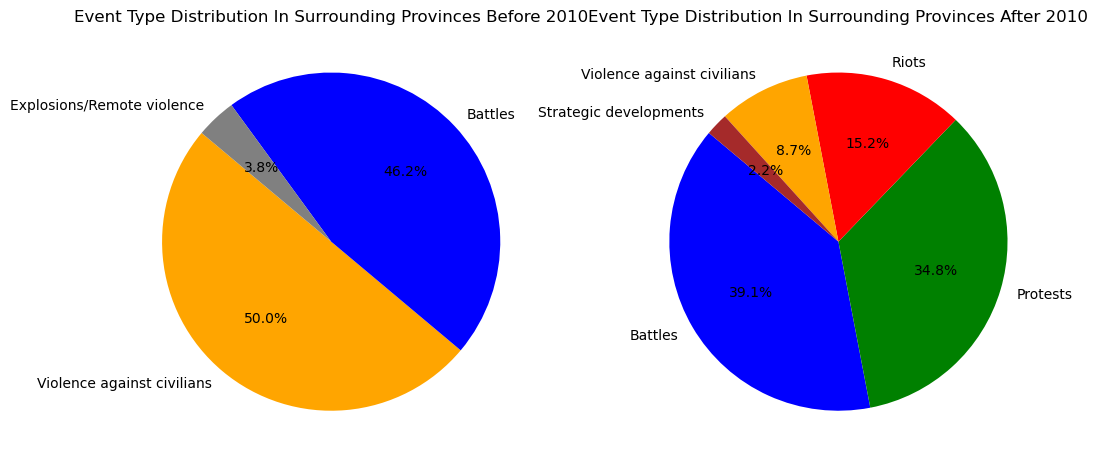

In [39]:
# hide

# Convert 'year' to numeric format
prov_data['year'] = pd.to_numeric(prov_data['year'], errors='coerce')

# Filter data for events before and after 2010
events_before_2010 = prov_data[prov_data['year'] < 2010]
events_after_2010 = prov_data[prov_data['year'] >= 2010]

# Calculate the percentage of each event type before 2010
event_type_percentage_before = events_before_2010['event_type'].value_counts(normalize=True) * 100

# Calculate the percentage of each event type after 2010
event_type_percentage_after = events_after_2010['event_type'].value_counts(normalize=True) * 100

# Define colors for each event type
event_type_colors = {
    'Battles': 'blue',
    'Violence against civilians': 'orange',
    'Protests': 'green',
    'Riots': 'red',
    'Strategic developments': 'brown',
    'Explosions/Remote violence': 'grey'
}

# Plot pie chart for events before 2010
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(event_type_percentage_before, labels=event_type_percentage_before.index, autopct='%1.1f%%', startangle=140, colors=[event_type_colors.get(event_type, 'gray') for event_type in event_type_percentage_before.index])
plt.title('Event Type Distribution In Surrounding Provinces Before 2010')

# Plot pie chart for events after 2010
plt.subplot(1, 2, 2)
plt.pie(event_type_percentage_after, labels=event_type_percentage_after.index, autopct='%1.1f%%', startangle=140, colors=[event_type_colors.get(event_type, 'gray') for event_type in event_type_percentage_after.index])
plt.title('Event Type Distribution In Surrounding Provinces After 2010')

plt.show()

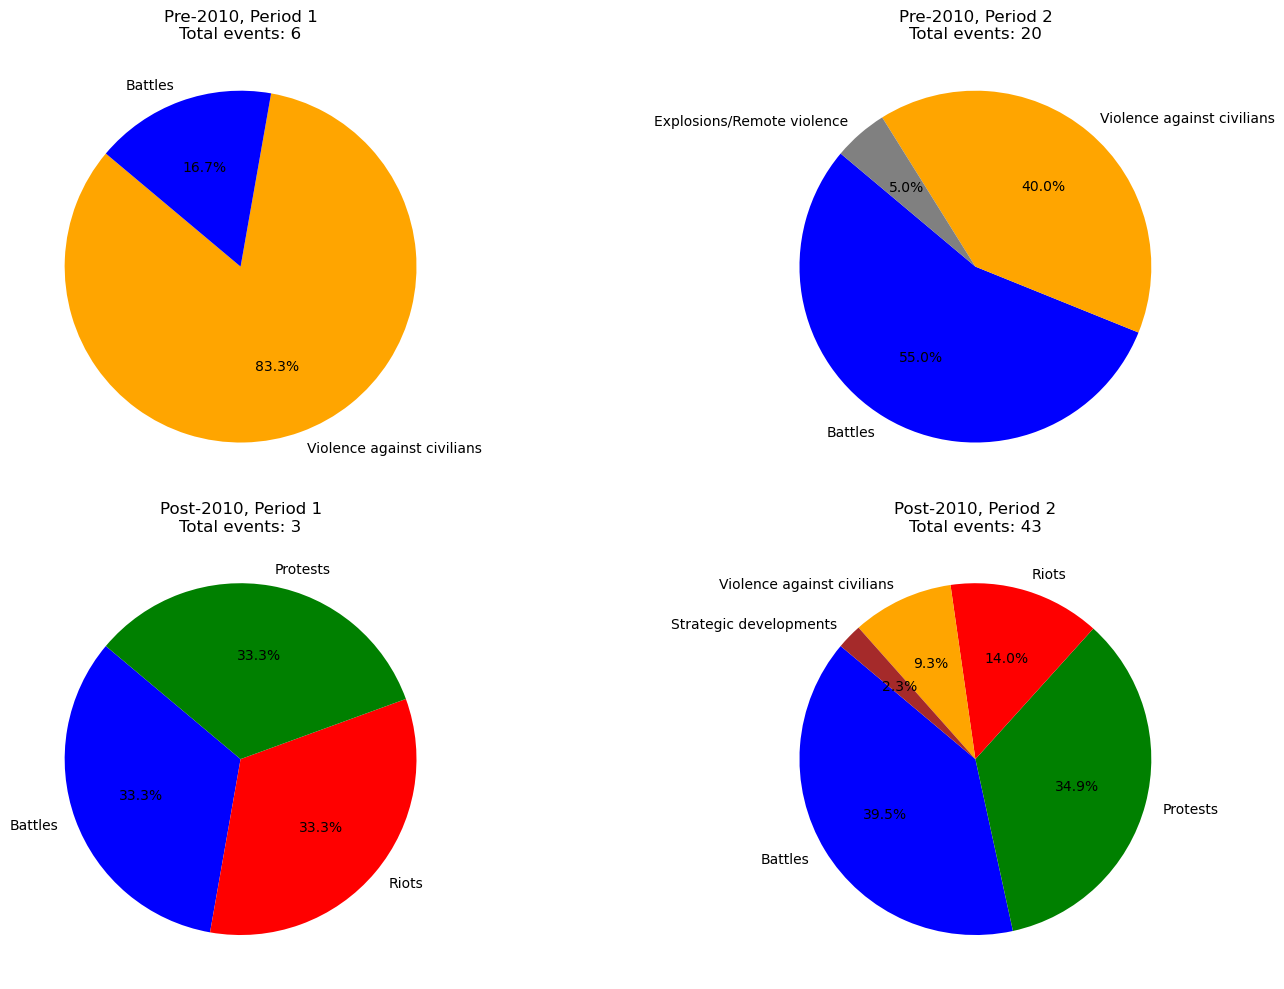

In [37]:
# Convert 'year' to numeric format
prov_data['year'] = pd.to_numeric(prov_data['year'], errors='coerce')

# Define time periods
pre_2010_1 = prov_data[(prov_data['year'] >= 1997) & (prov_data['year'] <= 2004)]
pre_2010_2 = prov_data[(prov_data['year'] >= 2005) & (prov_data['year'] <= 2010)]
post_2010_1 = prov_data[(prov_data['year'] >= 2011) & (prov_data['year'] <= 2015)]
post_2010_2 = prov_data[(prov_data['year'] >= 2016) & (prov_data['year'] <= 2023)]

# Calculate the percentage of each event type for each time period
event_type_percentage_pre_2010_1 = pre_2010_1['event_type'].value_counts(normalize=True) * 100
event_type_percentage_pre_2010_2 = pre_2010_2['event_type'].value_counts(normalize=True) * 100
event_type_percentage_post_2010_1 = post_2010_1['event_type'].value_counts(normalize=True) * 100
event_type_percentage_post_2010_2 = post_2010_2['event_type'].value_counts(normalize=True) * 100

# Define colors for each event type
event_type_colors = {
    'Battles': 'blue',
    'Violence against civilians': 'orange',
    'Protests': 'green',
    'Riots': 'red',
    'Strategic developments': 'brown',
    'Explosions/Remote violence': 'grey'
}

# Plot pie charts for each time period
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# Plot pie chart for pre-2010, period 1
axes[0].pie(event_type_percentage_pre_2010_1, labels=event_type_percentage_pre_2010_1.index, autopct='%1.1f%%', startangle=140, colors=[event_type_colors.get(event_type, 'gray') for event_type in event_type_percentage_pre_2010_1.index])
axes[0].set_title('Pre-2010, Period 1\nTotal events: {}'.format(len(pre_2010_1)))

# Plot pie chart for pre-2010, period 2
axes[1].pie(event_type_percentage_pre_2010_2, labels=event_type_percentage_pre_2010_2.index, autopct='%1.1f%%', startangle=140, colors=[event_type_colors.get(event_type, 'gray') for event_type in event_type_percentage_pre_2010_2.index])
axes[1].set_title('Pre-2010, Period 2\nTotal events: {}'.format(len(pre_2010_2)))

# Plot pie chart for post-2010, period 1
axes[2].pie(event_type_percentage_post_2010_1, labels=event_type_percentage_post_2010_1.index, autopct='%1.1f%%', startangle=140, colors=[event_type_colors.get(event_type, 'gray') for event_type in event_type_percentage_post_2010_1.index])
axes[2].set_title('Post-2010, Period 1\nTotal events: {}'.format(len(post_2010_1)))

# Plot pie chart for post-2010, period 2
axes[3].pie(event_type_percentage_post_2010_2, labels=event_type_percentage_post_2010_2.index, autopct='%1.1f%%', startangle=140, colors=[event_type_colors.get(event_type, 'gray') for event_type in event_type_percentage_post_2010_2.index])
axes[3].set_title('Post-2010, Period 2\nTotal events: {}'.format(len(post_2010_2)))

plt.tight_layout()
plt.show()

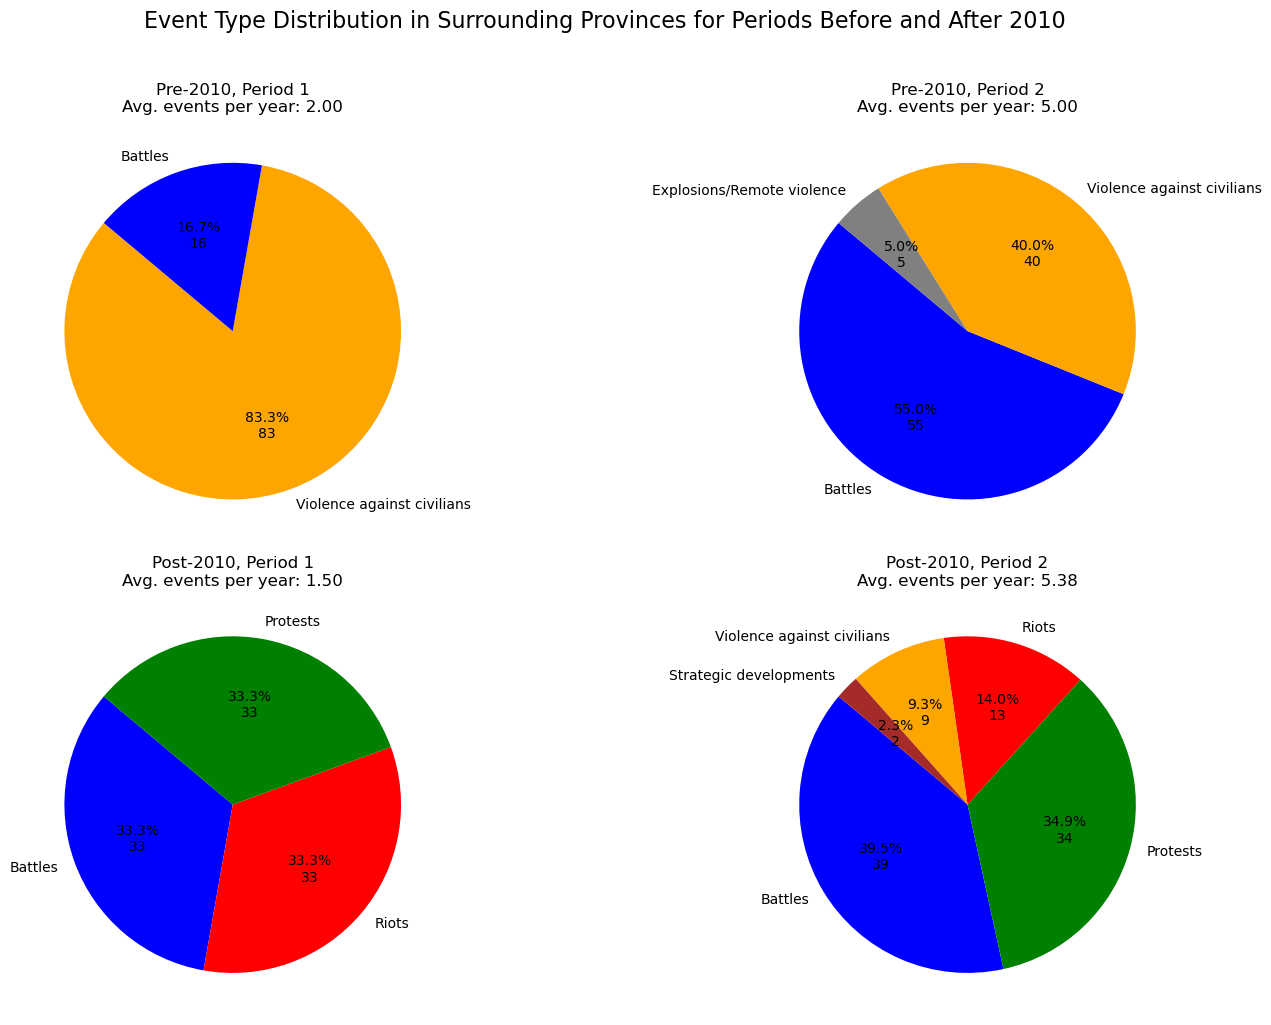

In [48]:
# Convert 'year' to numeric format
prov_data['year'] = pd.to_numeric(prov_data['year'], errors='coerce')

# Define time periods
pre_2010_1 = prov_data[(prov_data['year'] >= 1997) & (prov_data['year'] <= 2004)]
pre_2010_2 = prov_data[(prov_data['year'] >= 2005) & (prov_data['year'] <= 2010)]
post_2010_1 = prov_data[(prov_data['year'] >= 2011) & (prov_data['year'] <= 2015)]
post_2010_2 = prov_data[(prov_data['year'] >= 2016) & (prov_data['year'] <= 2023)]

# Calculate the percentage of each event type for each time period
event_type_percentage_pre_2010_1 = pre_2010_1['event_type'].value_counts(normalize=True) * 100
event_type_percentage_pre_2010_2 = pre_2010_2['event_type'].value_counts(normalize=True) * 100
event_type_percentage_post_2010_1 = post_2010_1['event_type'].value_counts(normalize=True) * 100
event_type_percentage_post_2010_2 = post_2010_2['event_type'].value_counts(normalize=True) * 100

# Calculate average events per year for each time period
avg_events_per_year_pre_2010_1 = len(pre_2010_1) / len(pre_2010_1['year'].unique())
avg_events_per_year_pre_2010_2 = len(pre_2010_2) / len(pre_2010_2['year'].unique())
avg_events_per_year_post_2010_1 = len(post_2010_1) / len(post_2010_1['year'].unique())
avg_events_per_year_post_2010_2 = len(post_2010_2) / len(post_2010_2['year'].unique())

# Define colors for each event type
event_type_colors = {
    'Battles': 'blue',
    'Violence against civilians': 'orange',
    'Protests': 'green',
    'Riots': 'red',
    'Strategic developments': 'brown',
    'Explosions/Remote violence': 'grey'
}

# Plot pie charts for each time period with average events per year and event type count inside the pie chart
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Event Type Distribution in Surrounding Provinces for Periods Before and After 2010', fontsize=16, y=1.02)  # Add this line for the title
axes = axes.flatten()

# Plot pie chart for pre-2010, period 1
wedges, texts, autotexts = axes[0].pie(event_type_percentage_pre_2010_1, labels=event_type_percentage_pre_2010_1.index, autopct='%1.1f%%', startangle=140, colors=[event_type_colors.get(event_type, 'gray') for event_type in event_type_percentage_pre_2010_1.index])
axes[0].set_title('Pre-2010, Period 1\nAvg. events per year: {:.2f}'.format(avg_events_per_year_pre_2010_1))
for i, autotext in enumerate(autotexts):
    event_count = event_type_percentage_pre_2010_1.values[i]
    autotext.set_text('{}\n{}'.format(autotext.get_text(), int(event_count)))

# Plot pie chart for pre-2010, period 2
wedges, texts, autotexts = axes[1].pie(event_type_percentage_pre_2010_2, labels=event_type_percentage_pre_2010_2.index, autopct='%1.1f%%', startangle=140, colors=[event_type_colors.get(event_type, 'gray') for event_type in event_type_percentage_pre_2010_2.index])
axes[1].set_title('Pre-2010, Period 2\nAvg. events per year: {:.2f}'.format(avg_events_per_year_pre_2010_2))
for i, autotext in enumerate(autotexts):
    event_count = event_type_percentage_pre_2010_2.values[i]
    autotext.set_text('{}\n{}'.format(autotext.get_text(), int(event_count)))

# Plot pie chart for post-2010, period 1
wedges, texts, autotexts = axes[2].pie(event_type_percentage_post_2010_1, labels=event_type_percentage_post_2010_1.index, autopct='%1.1f%%', startangle=140, colors=[event_type_colors.get(event_type, 'gray') for event_type in event_type_percentage_post_2010_1.index])
axes[2].set_title('Post-2010, Period 1\nAvg. events per year: {:.2f}'.format(avg_events_per_year_post_2010_1))
for i, autotext in enumerate(autotexts):
    event_count = event_type_percentage_post_2010_1.values[i]
    autotext.set_text('{}\n{}'.format(autotext.get_text(), int(event_count)))

# Plot pie chart for post-2010, period 2
wedges, texts, autotexts = axes[3].pie(event_type_percentage_post_2010_2, labels=event_type_percentage_post_2010_2.index, autopct='%1.1f%%', startangle=140, colors=[event_type_colors.get(event_type, 'gray') for event_type in event_type_percentage_post_2010_2.index])
axes[3].set_title('Post-2010, Period 2\nAvg. events per year: {:.2f}'.format(avg_events_per_year_post_2010_2))
for i, autotext in enumerate(autotexts):
    event_count = event_type_percentage_post_2010_2.values[i]
    autotext.set_text('{}\n{}'.format(autotext.get_text(), int(event_count)))


plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

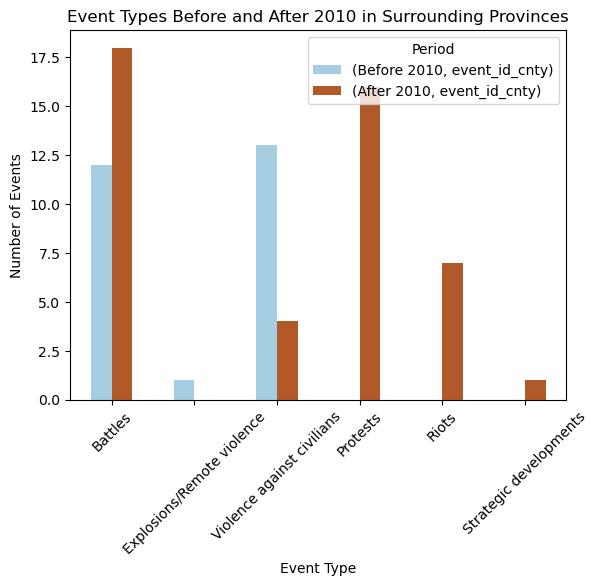

In [41]:
# hide

# Convert 'year' to numeric format
prov_data['year'] = pd.to_numeric(prov_data['year'], errors='coerce')

# Filter data for events before and after 2010
events_before_2010 = prov_data[prov_data['year'] < 2010]
events_after_2010 = prov_data[prov_data['year'] >= 2010]

# Create a pivot table for event types before 2010
pivot_before_2010 = pd.pivot_table(events_before_2010, values='event_id_cnty', index='event_type', aggfunc='count', fill_value=0)

# Create a pivot table for event types after 2010
pivot_after_2010 = pd.pivot_table(events_after_2010, values='event_id_cnty', index='event_type', aggfunc='count', fill_value=0)

# Combine the two pivot tables
combined_pivot = pd.concat([pivot_before_2010, pivot_after_2010], axis=1, keys=['Before 2010', 'After 2010'])

# Plot the grouped bar chart
plt.figure(figsize=(12, 8))
combined_pivot.plot(kind='bar', colormap='Paired', rot=45)
plt.xlabel('Event Type')
plt.ylabel('Number of Events')
plt.title('Event Types Before and After 2010 in Surrounding Provinces')
plt.legend(title='Period')
plt.show()

<li>There was a increase in the number of battles and strategic developments in the surrounding provinces after 2010.</li>
<li>There was a noticeable increase in protests and riots in the surrounding provinces after 2010.</li>
<li>There was a a decrease in violence against civilians and explosions/remote vioence in the surrounding provinces after 2010. </li>

<Figure size 1500x1000 with 0 Axes>

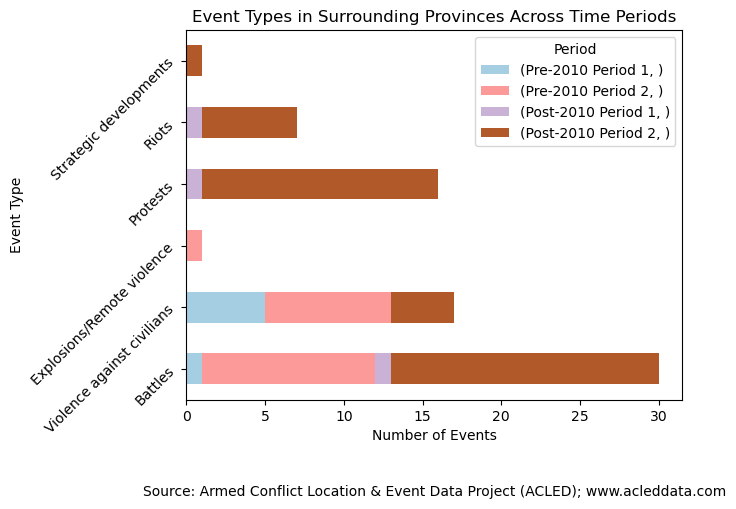

In [147]:
# Convert 'year' to numeric format
prov_data['year'] = pd.to_numeric(prov_data['year'], errors='coerce')

# Define time periods
pre_2010_1 = prov_data[(prov_data['year'] >= 1997) & (prov_data['year'] <= 2004)]
pre_2010_2 = prov_data[(prov_data['year'] >= 2005) & (prov_data['year'] <= 2010)]
post_2010_1 = prov_data[(prov_data['year'] >= 2011) & (prov_data['year'] <= 2015)]
post_2010_2 = prov_data[(prov_data['year'] >= 2016) & (prov_data['year'] <= 2023)]

# Create pivot tables for event types for each time period
pivot_pre_2010_1 = pd.pivot_table(pre_2010_1, values='event_id_cnty', index='event_type', aggfunc='count', fill_value=0)
pivot_pre_2010_2 = pd.pivot_table(pre_2010_2, values='event_id_cnty', index='event_type', aggfunc='count', fill_value=0)
pivot_post_2010_1 = pd.pivot_table(post_2010_1, values='event_id_cnty', index='event_type', aggfunc='count', fill_value=0)
pivot_post_2010_2 = pd.pivot_table(post_2010_2, values='event_id_cnty', index='event_type', aggfunc='count', fill_value=0)

# Combine the pivot tables
combined_pivot = pd.concat([pivot_pre_2010_1, pivot_pre_2010_2, pivot_post_2010_1, pivot_post_2010_2],
                           axis=1,
                           keys=['Pre-2010 Period 1', 'Pre-2010 Period 2', 'Post-2010 Period 1', 'Post-2010 Period 2'])

# Plot the grouped bar chart
plt.figure(figsize=(15, 10))
combined_pivot.plot(kind='barh',stacked=True, colormap='Paired', rot=45)
plt.ylabel('Event Type')
plt.xlabel('Number of Events')
plt.title('Event Types in Surrounding Provinces Across Time Periods')
plt.legend(title='Period')
# Get the handles and labels of the legend from the current axes
handles, labels = plt.gca().get_legend_handles_labels()

# Remove 'event_id_cnty' from the labels
new_labels = [label.replace('event_id_cnty', '') for label in labels]

# Create a custom legend
legend = plt.legend(handles, new_labels, title='Period')

# Add source text at the bottom
source_text = "Source: Armed Conflict Location & Event Data Project (ACLED); www.acleddata.com"
plt.text(0.5, -0.25, source_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)

# Save it as an image
plt.savefig('Stacked_Bar_Provinces.png', dpi=300, bbox_inches='tight')


plt.show()


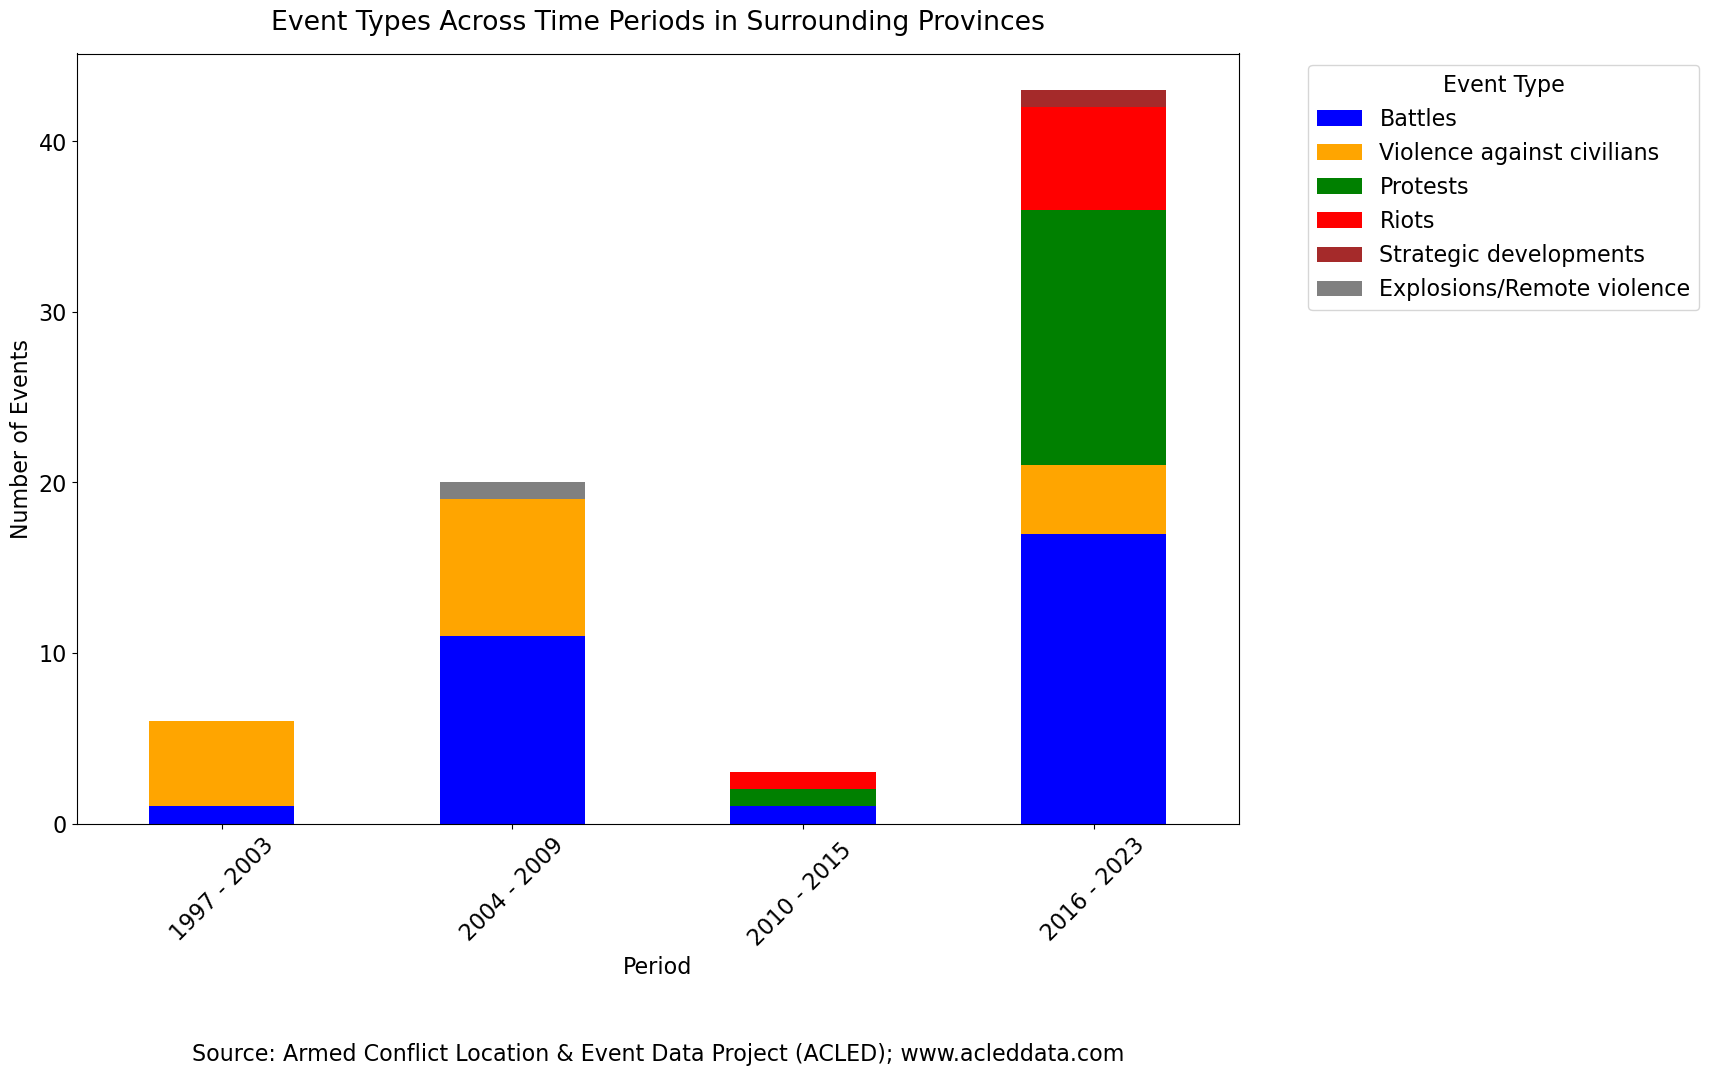

In [335]:
# Convert 'year' to numeric format
prov_data['year'] = pd.to_numeric(prov_data['year'], errors='coerce')

# Define time periods
pre_2010_1 = prov_data[(prov_data['year'] >= 1997) & (prov_data['year'] <= 2004)]
pre_2010_2 = prov_data[(prov_data['year'] >= 2005) & (prov_data['year'] <= 2009)]
post_2010_1 = prov_data[(prov_data['year'] >= 2010) & (prov_data['year'] <= 2015)]
post_2010_2 = prov_data[(prov_data['year'] >= 2016) & (prov_data['year'] <= 2023)]

# Create pivot tables for event types for each time period
pivot_pre_2010_1 = pd.pivot_table(pre_2010_1, values='event_id_cnty', index='event_type', aggfunc='count', fill_value=0)
pivot_pre_2010_2 = pd.pivot_table(pre_2010_2, values='event_id_cnty', index='event_type', aggfunc='count', fill_value=0)
pivot_post_2010_1 = pd.pivot_table(post_2010_1, values='event_id_cnty', index='event_type', aggfunc='count', fill_value=0)
pivot_post_2010_2 = pd.pivot_table(post_2010_2, values='event_id_cnty', index='event_type', aggfunc='count', fill_value=0)

# Define colors for each event type consistently
event_type_colors = {
    'Battles': 'blue',
    'Violence against civilians': 'orange',
    'Protests': 'green',
    'Riots': 'red',
    'Strategic developments': 'brown',
    'Explosions/Remote violence': 'grey'
}

# Apply the same color mapping to all the pivot tables
pivot_pre_2010_1 = pivot_pre_2010_1.reindex(event_type_colors.keys()).fillna(0)
pivot_pre_2010_2 = pivot_pre_2010_2.reindex(event_type_colors.keys()).fillna(0)
pivot_post_2010_1 = pivot_post_2010_1.reindex(event_type_colors.keys()).fillna(0)
pivot_post_2010_2 = pivot_post_2010_2.reindex(event_type_colors.keys()).fillna(0)


# Combine the pivot tables
combined_pivot = pd.concat([pivot_pre_2010_1, pivot_pre_2010_2, pivot_post_2010_1, pivot_post_2010_2],
                           axis=1,
                           keys=['1997 - 2004', '2004 - 2010', '2010 - 2015 ', '2015 - 2023'])

# Transpose the DataFrame to have periods as columns
combined_pivot = combined_pivot.T

# Set the font size
plt.rc('font', size=16)

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(15, 10))
combined_pivot.plot(kind='bar', stacked=True, color=[event_type_colors[event] for event in combined_pivot.columns], rot=45, ax=ax)
plt.xlabel('Period')
plt.ylabel('Number of Events')
plt.title('Event Types Across Time Periods in Surrounding Provinces', y = 1.02 )

# Set x-axis labels to the periods
plt.xticks(range(4), ['1997 - 2003', '2004 - 2009', '2010 - 2015 ', '2016 - 2023'], rotation=45)

# Add a legend and customize location
plt.legend(title='Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add source text at the bottom
source_text = "Source: Armed Conflict Location & Event Data Project (ACLED); www.acleddata.com"
plt.text(0.5, -0.30, source_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=16)

# Save it as an image
plt.savefig('Grouped_Bar_Periods_provinces.png', dpi=300, bbox_inches='tight')

plt.show()

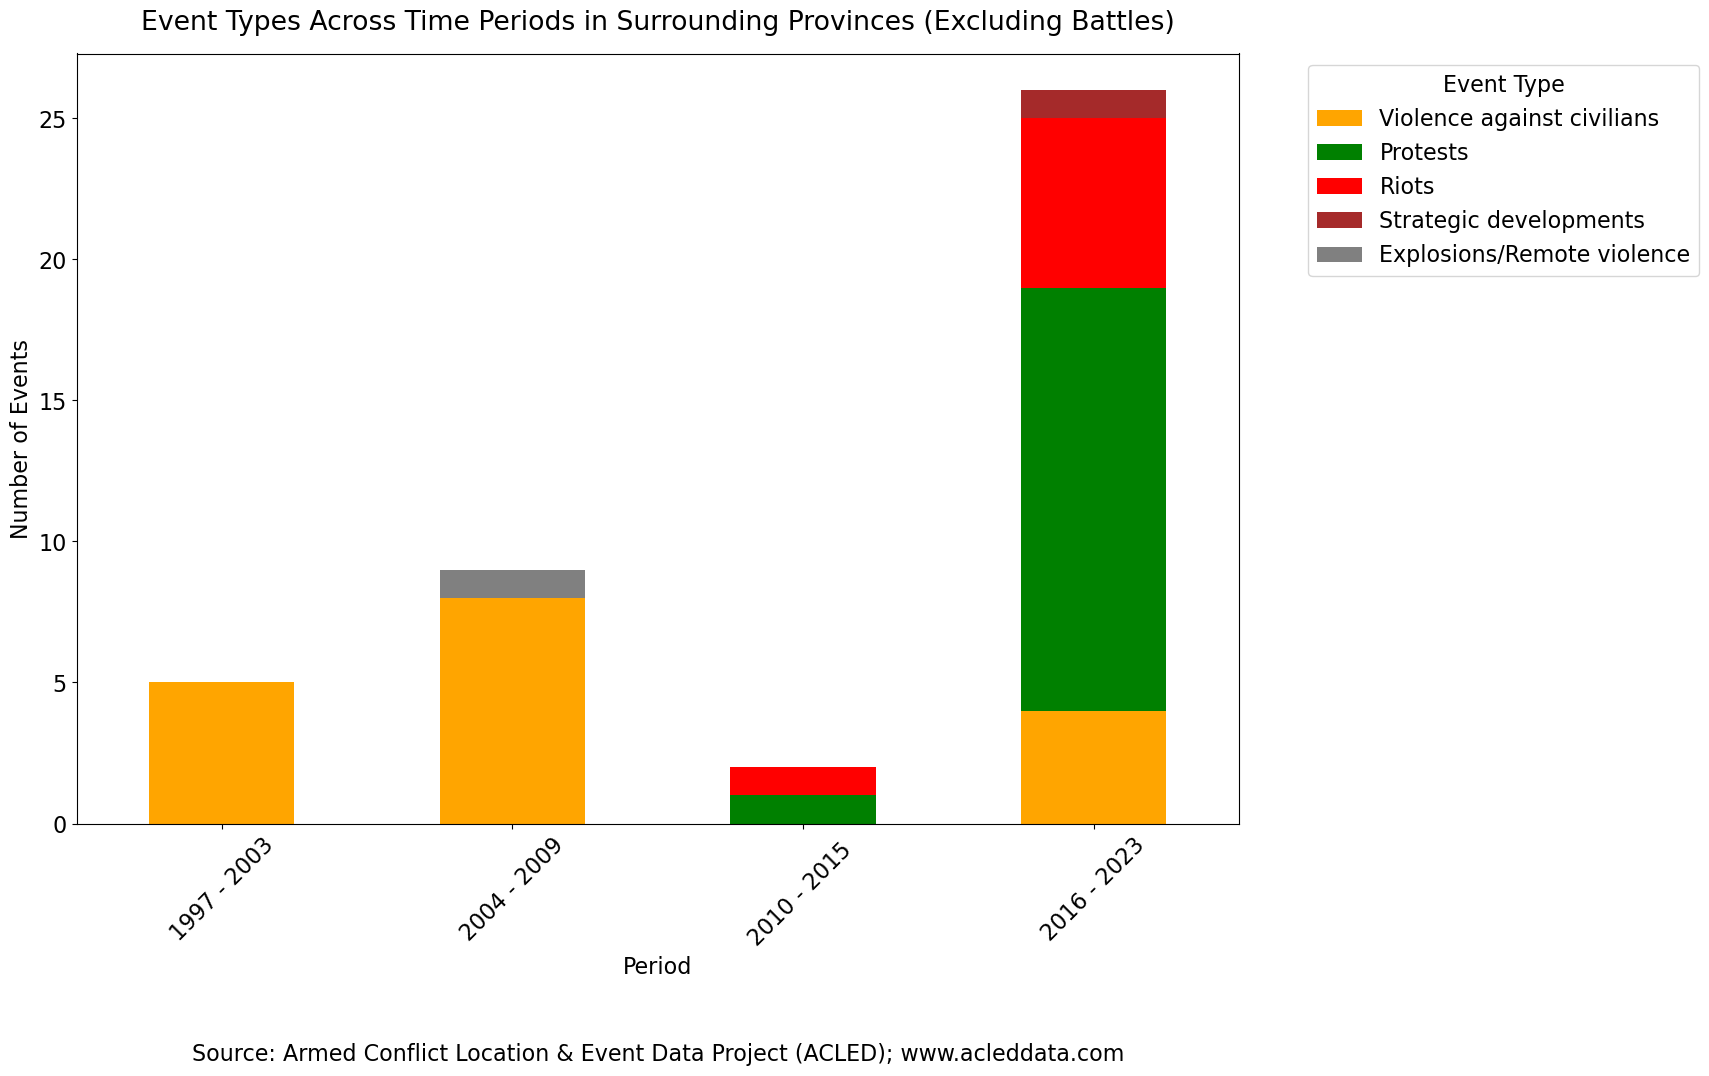

In [336]:
# Convert 'year' to numeric format
prov_data['year'] = pd.to_numeric(prov_data['year'], errors='coerce')

# Define time periods
pre_2010_1 = prov_data[(prov_data['year'] >= 1997) & (prov_data['year'] <= 2004)]
pre_2010_2 = prov_data[(prov_data['year'] >= 2005) & (prov_data['year'] <= 2009)]
post_2010_1 = prov_data[(prov_data['year'] >= 2010) & (prov_data['year'] <= 2015)]
post_2010_2 = prov_data[(prov_data['year'] >= 2016) & (prov_data['year'] <= 2023)]

# Filter out "Battles"
pre_2010_1 = pre_2010_1[pre_2010_1['event_type'] != 'Battles']
pre_2010_2 = pre_2010_2[pre_2010_2['event_type'] != 'Battles']
post_2010_1 = post_2010_1[post_2010_1['event_type'] != 'Battles']
post_2010_2 = post_2010_2[post_2010_2['event_type'] != 'Battles']

# Create pivot tables for event types for each time period
pivot_pre_2010_1 = pd.pivot_table(pre_2010_1, values='event_id_cnty', index='event_type', aggfunc='count', fill_value=0)
pivot_pre_2010_2 = pd.pivot_table(pre_2010_2, values='event_id_cnty', index='event_type', aggfunc='count', fill_value=0)
pivot_post_2010_1 = pd.pivot_table(post_2010_1, values='event_id_cnty', index='event_type', aggfunc='count', fill_value=0)
pivot_post_2010_2 = pd.pivot_table(post_2010_2, values='event_id_cnty', index='event_type', aggfunc='count', fill_value=0)

# Define colors for each event type consistently
event_type_colors = {
    'Violence against civilians': 'orange',
    'Protests': 'green',
    'Riots': 'red',
    'Strategic developments': 'brown',
    'Explosions/Remote violence': 'grey'
}

# Apply the same color mapping to all the pivot tables
pivot_pre_2010_1 = pivot_pre_2010_1.reindex(event_type_colors.keys()).fillna(0)
pivot_pre_2010_2 = pivot_pre_2010_2.reindex(event_type_colors.keys()).fillna(0)
pivot_post_2010_1 = pivot_post_2010_1.reindex(event_type_colors.keys()).fillna(0)
pivot_post_2010_2 = pivot_post_2010_2.reindex(event_type_colors.keys()).fillna(0)


# Combine the pivot tables
combined_pivot = pd.concat([pivot_pre_2010_1, pivot_pre_2010_2, pivot_post_2010_1, pivot_post_2010_2],
                           axis=1,
                           keys=['1997 - 2004', '2004 - 2010', '2010 - 2015 ', '2015 - 2023'])

# Transpose the DataFrame to have periods as columns
combined_pivot = combined_pivot.T

# Set the font size
plt.rc('font', size=16)

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(15, 10))
combined_pivot.plot(kind='bar', stacked=True, color=[event_type_colors[event] for event in combined_pivot.columns], rot=45, ax=ax)
plt.xlabel('Period')
plt.ylabel('Number of Events')
plt.title('Event Types Across Time Periods in Surrounding Provinces (Excluding Battles)', y = 1.02)

# Set x-axis labels to the periods
plt.xticks(range(4), ['1997 - 2003', '2004 - 2009', '2010 - 2015 ', '2016 - 2023'], rotation=45)

# Add a legend and customize location
plt.legend(title='Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add source text at the bottom
source_text = "Source: Armed Conflict Location & Event Data Project (ACLED); www.acleddata.com"
plt.text(0.5, -0.30, source_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=16)

# Save it as an image
plt.savefig('Grouped_Bar_Periods_provinces_excl_battles.png', dpi=300, bbox_inches='tight')

plt.show()

<font size=5>CHAD</font>

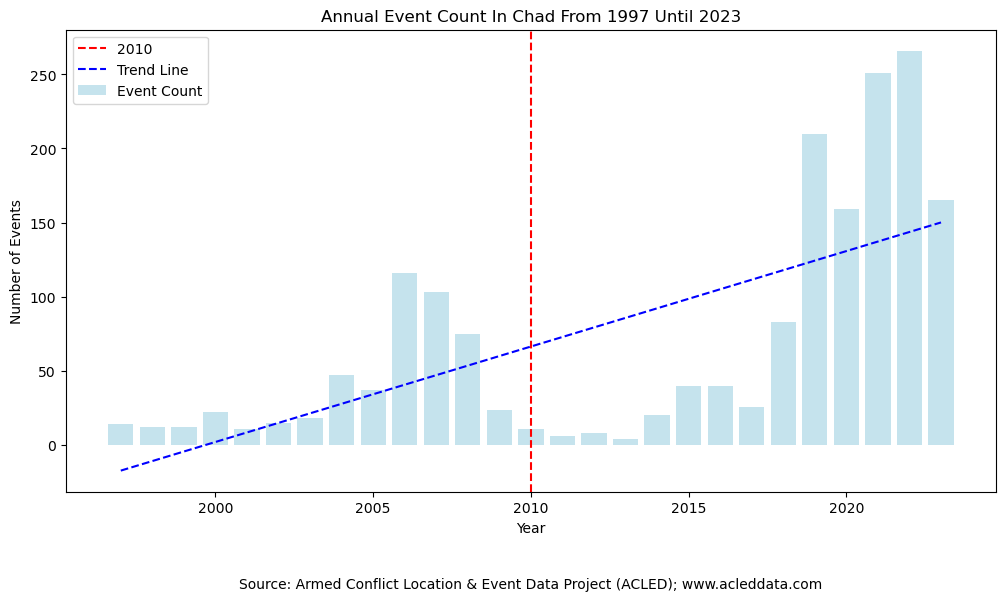

In [122]:
# hide
from sklearn.linear_model import LinearRegression

# Convert the 'event_date' column to datetime
zakouma_df['event_date'] = pd.to_datetime(zakouma_df['event_date'], errors='coerce')

# Filter rows where the country is Chad
zakouma_chad_df = zakouma_df[zakouma_df['country'] == 'Chad']

# Create a bar chart of all event types over time
plt.figure(figsize=(12, 6))
plt.bar(zakouma_chad_df['event_date'].dt.year.value_counts().sort_index().index,
        zakouma_chad_df['event_date'].dt.year.value_counts().sort_index().values,
        color='lightblue', alpha=0.7, label='Event Count')
plt.axvline(x=2010, color='red', linestyle='--', label='2010')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.title('Annual Event Count In Chad From 1997 Until 2023')

# Overlay a trend line using linear regression results
reg_chad = LinearRegression().fit(zakouma_chad_df['event_date'].dt.year.value_counts().sort_index().index.values.reshape(-1, 1),
                                  zakouma_chad_df['event_date'].dt.year.value_counts().sort_index().values)
plt.plot(zakouma_chad_df['event_date'].dt.year.value_counts().sort_index().index,
         reg_chad.predict(zakouma_chad_df['event_date'].dt.year.value_counts().sort_index().index.values.reshape(-1, 1)),
         color='blue', linestyle='--', label='Trend Line')

# Add a legend to display labels
plt.legend()
# Add source text at the bottom
source_text = "Source: Armed Conflict Location & Event Data Project (ACLED); www.acleddata.com"
plt.text(0.5, -0.20, source_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)

# Save it as an image
plt.savefig('Annual_Event_Count_Chad.png', dpi=300, bbox_inches='tight')


plt.show()

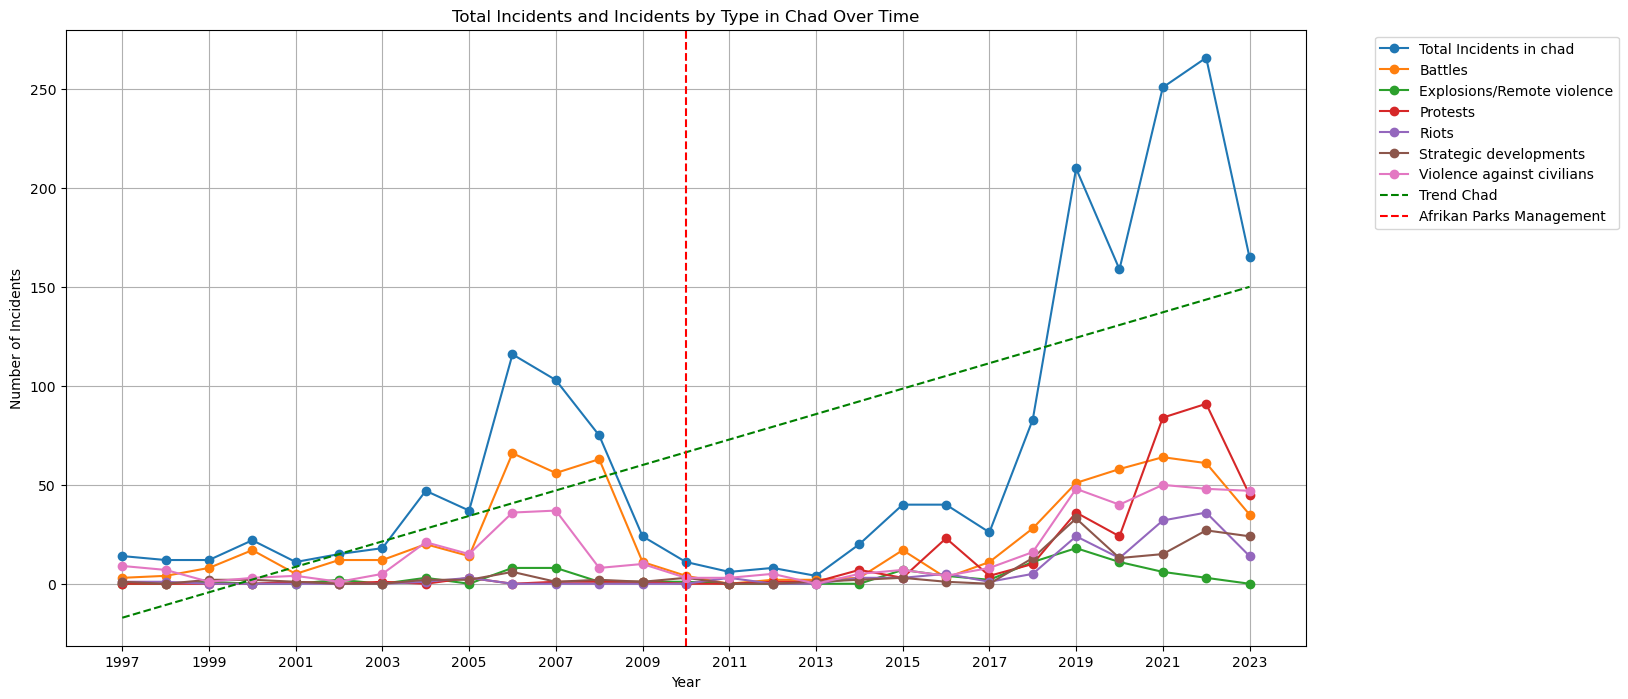

In [63]:
# hide

# Filter data for incidents in chad
chad_data = zakouma_df[zakouma_df['country'] == 'Chad']

# Total incidents in chad timeline
total_incidents_chad_timeline = chad_data.groupby('year').size().reset_index(name='total_incidents_chad')

# Incidents in DRC timeline by event type
incidents_by_type_chad_timeline = chad_data.groupby(['year', 'event_type']).size().unstack(fill_value=0).reset_index()

# Convert 'year' to numeric format
total_incidents_chad_timeline['year'] = pd.to_numeric(total_incidents_chad_timeline['year'], errors='coerce')

# Linear regression for DRC
reg_chad = LinearRegression().fit(total_incidents_chad_timeline[['year']], total_incidents_chad_timeline['total_incidents_chad'])
total_incidents_chad_timeline['trend_chad'] = reg_chad.predict(total_incidents_chad_timeline[['year']])

# Plot the timelines for DRC
plt.figure(figsize=(16, 8))

plt.plot(total_incidents_chad_timeline['year'], total_incidents_chad_timeline['total_incidents_chad'],
         marker='o', linestyle='-', label='Total Incidents in chad')

# Plot separate incident types in DRC
for event_type in incidents_by_type_chad_timeline.columns[1:]:
    plt.plot(total_incidents_chad_timeline['year'], incidents_by_type_chad_timeline[event_type],
             marker='o', linestyle='-', label=event_type)
    
# Plot trend line for total incidents in DRC
plt.plot(total_incidents_chad_timeline['year'], total_incidents_chad_timeline['trend_chad'],
         marker='', linestyle='--', color='green', label='Trend Chad')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Total Incidents and Incidents by Type in Chad Over Time')

# Set x-axis ticks every two years
plt.xticks(total_incidents_chad_timeline['year'][::2])

# Add a vertical line at the year 2010 if applicable
# Modify the condition based on your data
if 2010 in total_incidents_chad_timeline['year'].values:
    plt.axvline(x=2010, color='red', linestyle='--', label='Afrikan Parks Management')

# Show the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.grid(True)
plt.show()

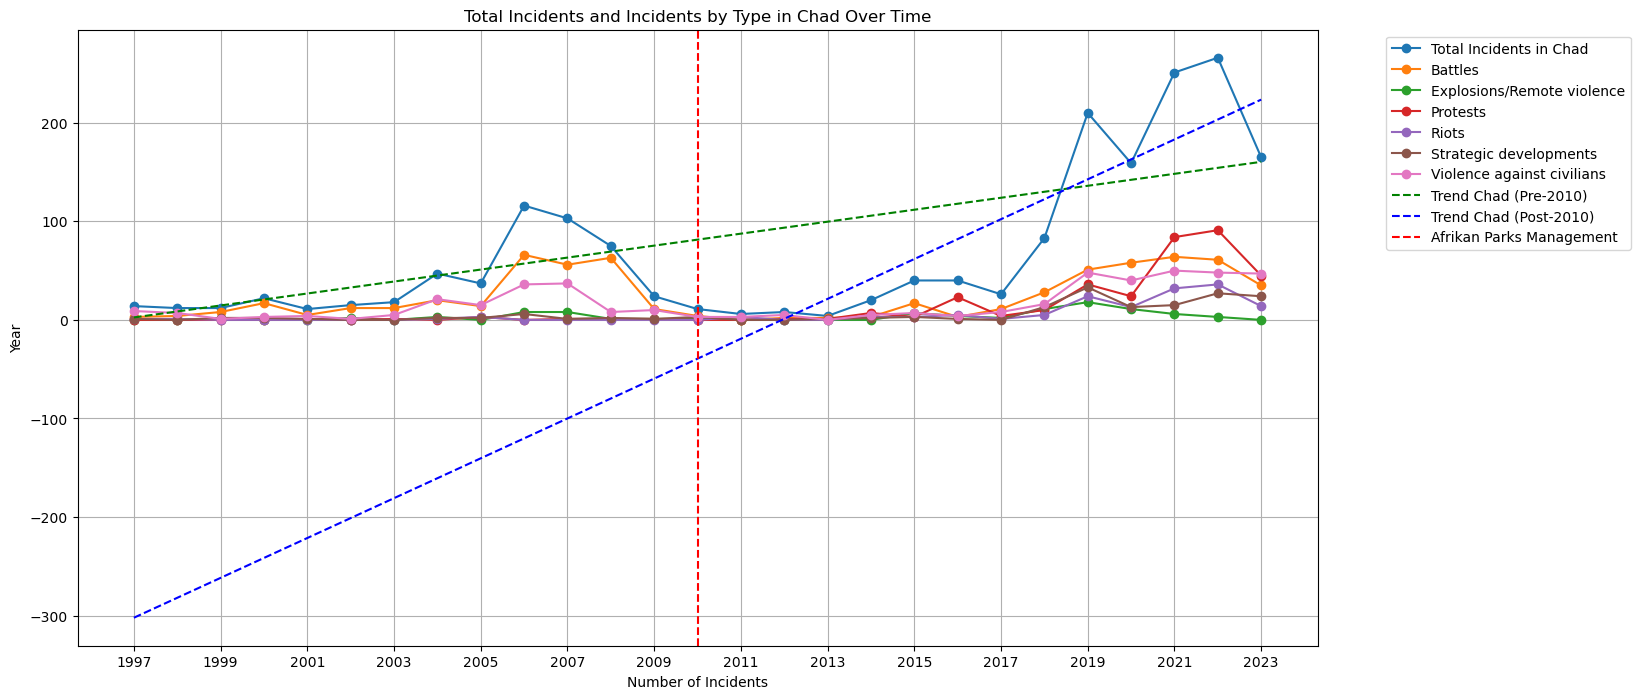

In [143]:
# hide

# Filter data for incidents in Chad
chad_data = zakouma_df[zakouma_df['country'] == 'Chad']

# Total incidents in Chad timeline
total_incidents_chad_timeline = chad_data.groupby('year').size().reset_index(name='total_incidents_chad')

# Incidents in Chad timeline by event type
incidents_by_type_chad_timeline = chad_data.groupby(['year', 'event_type']).size().unstack(fill_value=0).reset_index()

# Convert 'year' to numeric format
total_incidents_chad_timeline['year'] = pd.to_numeric(total_incidents_chad_timeline['year'], errors='coerce')

# Add a vertical line at the year 2010
afrikan_parks_start_year = 2010

# Linear regression for Chad (pre-2010)
reg_chad_pre_2010 = LinearRegression().fit(total_incidents_chad_timeline[total_incidents_chad_timeline['year'] < afrikan_parks_start_year][['year']], 
                                           total_incidents_chad_timeline[total_incidents_chad_timeline['year'] < afrikan_parks_start_year]['total_incidents_chad'])
total_incidents_chad_timeline['trend_chad_pre_2010'] = reg_chad_pre_2010.predict(total_incidents_chad_timeline[['year']])

# Linear regression for Chad (post-2010)
reg_chad_post_2010 = LinearRegression().fit(total_incidents_chad_timeline[total_incidents_chad_timeline['year'] >= afrikan_parks_start_year][['year']], 
                                            total_incidents_chad_timeline[total_incidents_chad_timeline['year'] >= afrikan_parks_start_year]['total_incidents_chad'])
total_incidents_chad_timeline['trend_chad_post_2010'] = reg_chad_post_2010.predict(total_incidents_chad_timeline[['year']])

# Plot the timelines for Chad
plt.figure(figsize=(16, 8))

# Plot total incidents in Chad
plt.plot(total_incidents_chad_timeline['year'], total_incidents_chad_timeline['total_incidents_chad'],
         marker='o', linestyle='-', label='Total Incidents in Chad')

# Plot separate incident types in Chad
for event_type in incidents_by_type_chad_timeline.columns[1:]:
    plt.plot(total_incidents_chad_timeline['year'], incidents_by_type_chad_timeline[event_type],
             marker='o', linestyle='-', label=event_type)

# Plot trend line for total incidents in Chad (pre-2010)
plt.plot(total_incidents_chad_timeline['year'], total_incidents_chad_timeline['trend_chad_pre_2010'],
         marker='', linestyle='--', color='green', label='Trend Chad (Pre-2010)')

# Plot trend line for total incidents in Chad (post-2010)
plt.plot(total_incidents_chad_timeline['year'], total_incidents_chad_timeline['trend_chad_post_2010'],
         marker='', linestyle='--', color='blue', label='Trend Chad (Post-2010)')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Total Incidents and Incidents by Type in Chad Over Time')

# Set x-axis ticks every two years
plt.xticks(total_incidents_chad_timeline['year'][::2])

# Add a vertical line at the year 2010 if applicable
# Modify the condition based on your data
if 2010 in total_incidents_chad_timeline['year'].values:
    plt.axvline(x=2010, color='red', linestyle='--', label='Afrikan Parks Management')

# Show the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.grid(True)
plt.show()

<li>"The trend lines suggest a noticeable increase in the rate of events after 2010 in Chad compared to the trend observed prior to 2010." </li>

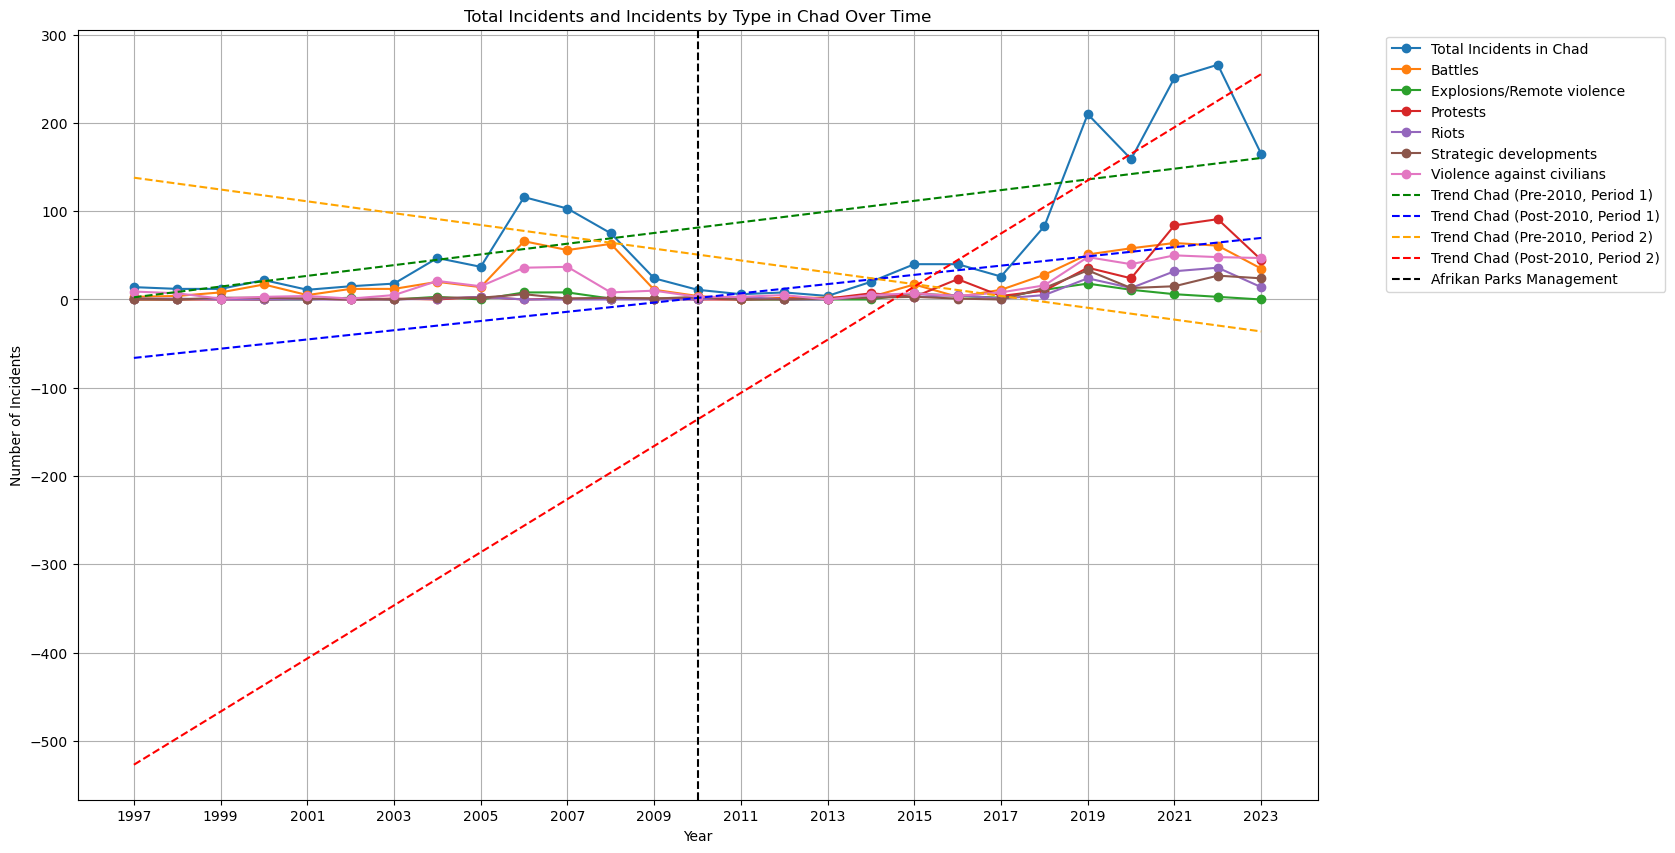

In [58]:
# Filter data for incidents in Chad
chad_data = zakouma_df[zakouma_df['country'] == 'Chad']

# Total incidents in Chad timeline
total_incidents_chad_timeline = chad_data.groupby('year').size().reset_index(name='total_incidents_chad')

# Incidents in Chad timeline by event type
incidents_by_type_chad_timeline = chad_data.groupby(['year', 'event_type']).size().unstack(fill_value=0).reset_index()

# Convert 'year' to numeric format
total_incidents_chad_timeline['year'] = pd.to_numeric(total_incidents_chad_timeline['year'], errors='coerce')

# Add a vertical line at the year 2010
afrikan_parks_start_year = 2010

# Linear regression for Chad (pre-2010, period 1)
reg_chad_pre_2010_1 = LinearRegression().fit(total_incidents_chad_timeline[(total_incidents_chad_timeline['year'] >= 1997) & (total_incidents_chad_timeline['year'] < 2010)][['year']], 
                                             total_incidents_chad_timeline[(total_incidents_chad_timeline['year'] >= 1997) & (total_incidents_chad_timeline['year'] < 2010)]['total_incidents_chad'])
total_incidents_chad_timeline['trend_chad_pre_2010_1'] = reg_chad_pre_2010_1.predict(total_incidents_chad_timeline[['year']])

# Linear regression for Chad (post-2010, period 1)
reg_chad_post_2010_1 = LinearRegression().fit(total_incidents_chad_timeline[(total_incidents_chad_timeline['year'] >= 2010) & (total_incidents_chad_timeline['year'] < 2016)][['year']], 
                                              total_incidents_chad_timeline[(total_incidents_chad_timeline['year'] >= 2010) & (total_incidents_chad_timeline['year'] < 2016)]['total_incidents_chad'])
total_incidents_chad_timeline['trend_chad_post_2010_1'] = reg_chad_post_2010_1.predict(total_incidents_chad_timeline[['year']])

# Linear regression for Chad (pre-2010, period 2)
reg_chad_pre_2010_2 = LinearRegression().fit(total_incidents_chad_timeline[(total_incidents_chad_timeline['year'] >= 2005) & (total_incidents_chad_timeline['year'] < 2010)][['year']], 
                                             total_incidents_chad_timeline[(total_incidents_chad_timeline['year'] >= 2005) & (total_incidents_chad_timeline['year'] < 2010)]['total_incidents_chad'])
total_incidents_chad_timeline['trend_chad_pre_2010_2'] = reg_chad_pre_2010_2.predict(total_incidents_chad_timeline[['year']])

# Linear regression for Chad (post-2010, period 2)
reg_chad_post_2010_2 = LinearRegression().fit(total_incidents_chad_timeline[(total_incidents_chad_timeline['year'] >= 2016) & (total_incidents_chad_timeline['year'] <= 2023)][['year']], 
                                              total_incidents_chad_timeline[(total_incidents_chad_timeline['year'] >= 2016) & (total_incidents_chad_timeline['year'] <= 2023)]['total_incidents_chad'])
total_incidents_chad_timeline['trend_chad_post_2010_2'] = reg_chad_post_2010_2.predict(total_incidents_chad_timeline[['year']])

# Plot the timelines for Chad
plt.figure(figsize=(16, 10))

# Plot total incidents in Chad
plt.plot(total_incidents_chad_timeline['year'], total_incidents_chad_timeline['total_incidents_chad'],
         marker='o', linestyle='-', label='Total Incidents in Chad')

# Plot separate incident types in Chad
for event_type in incidents_by_type_chad_timeline.columns[1:]:
    plt.plot(total_incidents_chad_timeline['year'], incidents_by_type_chad_timeline[event_type],
             marker='o', linestyle='-', label=event_type)

# Plot trend line for total incidents in Chad (pre-2010, period 1)
plt.plot(total_incidents_chad_timeline['year'], total_incidents_chad_timeline['trend_chad_pre_2010_1'],
         marker='', linestyle='--', color='green', label='Trend Chad (Pre-2010, Period 1)')

# Plot trend line for total incidents in Chad (post-2010, period 1)
plt.plot(total_incidents_chad_timeline['year'], total_incidents_chad_timeline['trend_chad_post_2010_1'],
         marker='', linestyle='--', color='blue', label='Trend Chad (Post-2010, Period 1)')

# Plot trend line for total incidents in Chad (pre-2010, period 2)
plt.plot(total_incidents_chad_timeline['year'], total_incidents_chad_timeline['trend_chad_pre_2010_2'],
         marker='', linestyle='--', color='orange', label='Trend Chad (Pre-2010, Period 2)')

# Plot trend line for total incidents in Chad (post-2010, period 2)
plt.plot(total_incidents_chad_timeline['year'], total_incidents_chad_timeline['trend_chad_post_2010_2'],
         marker='', linestyle='--', color='red', label='Trend Chad (Post-2010, Period 2)')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Total Incidents and Incidents by Type in Chad Over Time')

# Set x-axis ticks every two years
plt.xticks(total_incidents_chad_timeline['year'][::2])

# Add a vertical line at the year 2010 if applicable
# Modify the condition based on your data
if 2010 in total_incidents_chad_timeline['year'].values:
    plt.axvline(x=2010, color='black', linestyle='--', label='Afrikan Parks Management')

# Show the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

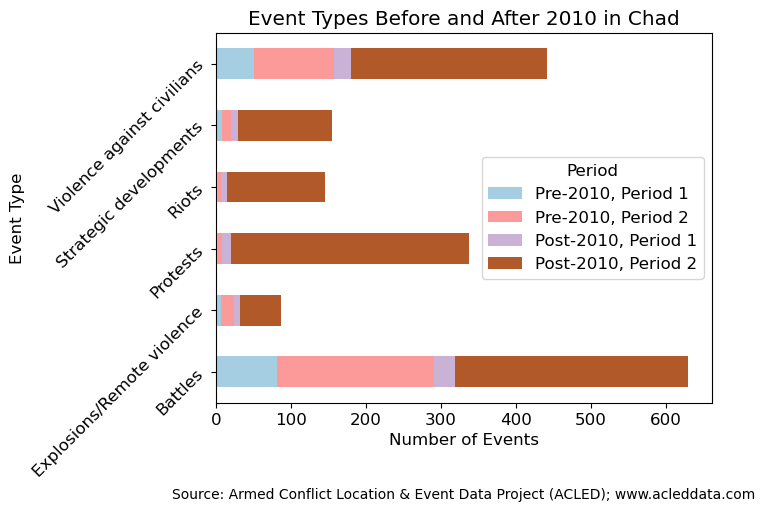

In [217]:
# Filter data for events in Chad
chad_data = zakouma_gdf[zakouma_gdf['country'] == 'Chad']

# Convert 'year' to numeric format
chad_data['year'] = pd.to_numeric(chad_data['year'], errors='coerce')

# Define time periods
pre_2010_1_chad = chad_data[(chad_data['year'] >= 1997) & (chad_data['year'] <= 2004)]
pre_2010_2_chad = chad_data[(chad_data['year'] >= 2005) & (chad_data['year'] < 2010)]
post_2010_1_chad = chad_data[(chad_data['year'] >= 2010) & (chad_data['year'] <= 2015)]
post_2010_2_chad = chad_data[(chad_data['year'] >= 2016) & (chad_data['year'] <= 2023)]

# Create DataFrames for event counts in each time period in Chad
event_counts_pre_2010_1_chad = pre_2010_1_chad['event_type'].value_counts().fillna(0)
event_counts_pre_2010_2_chad = pre_2010_2_chad['event_type'].value_counts().fillna(0)
event_counts_post_2010_1_chad = post_2010_1_chad['event_type'].value_counts().fillna(0)
event_counts_post_2010_2_chad = post_2010_2_chad['event_type'].value_counts().fillna(0)

# Combine event counts into a single DataFrame for Chad
combined_event_counts_chad = pd.DataFrame({
    'Pre-2010, Period 1': event_counts_pre_2010_1_chad,
    'Pre-2010, Period 2': event_counts_pre_2010_2_chad,
    'Post-2010, Period 1': event_counts_post_2010_1_chad,
    'Post-2010, Period 2': event_counts_post_2010_2_chad
}).fillna(0)

# Plot the stacked bar chart for events in Chad
plt.figure(figsize=(12, 8))
combined_event_counts_chad.plot(kind='barh', stacked=True, colormap='Paired', rot=45)
plt.ylabel('Event Type')
plt.xlabel('Number of Events')
plt.title('Event Types Before and After 2010 in Chad')
plt.legend(title='Period')

# Add source text at the bottom
source_text = "Source: Armed Conflict Location & Event Data Project (ACLED); www.acleddata.com"
plt.text(0.5, -0.25, source_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)

# Save it as an image
plt.savefig('Stacked_Bar_Chad.png', dpi=300, bbox_inches='tight')

plt.show()

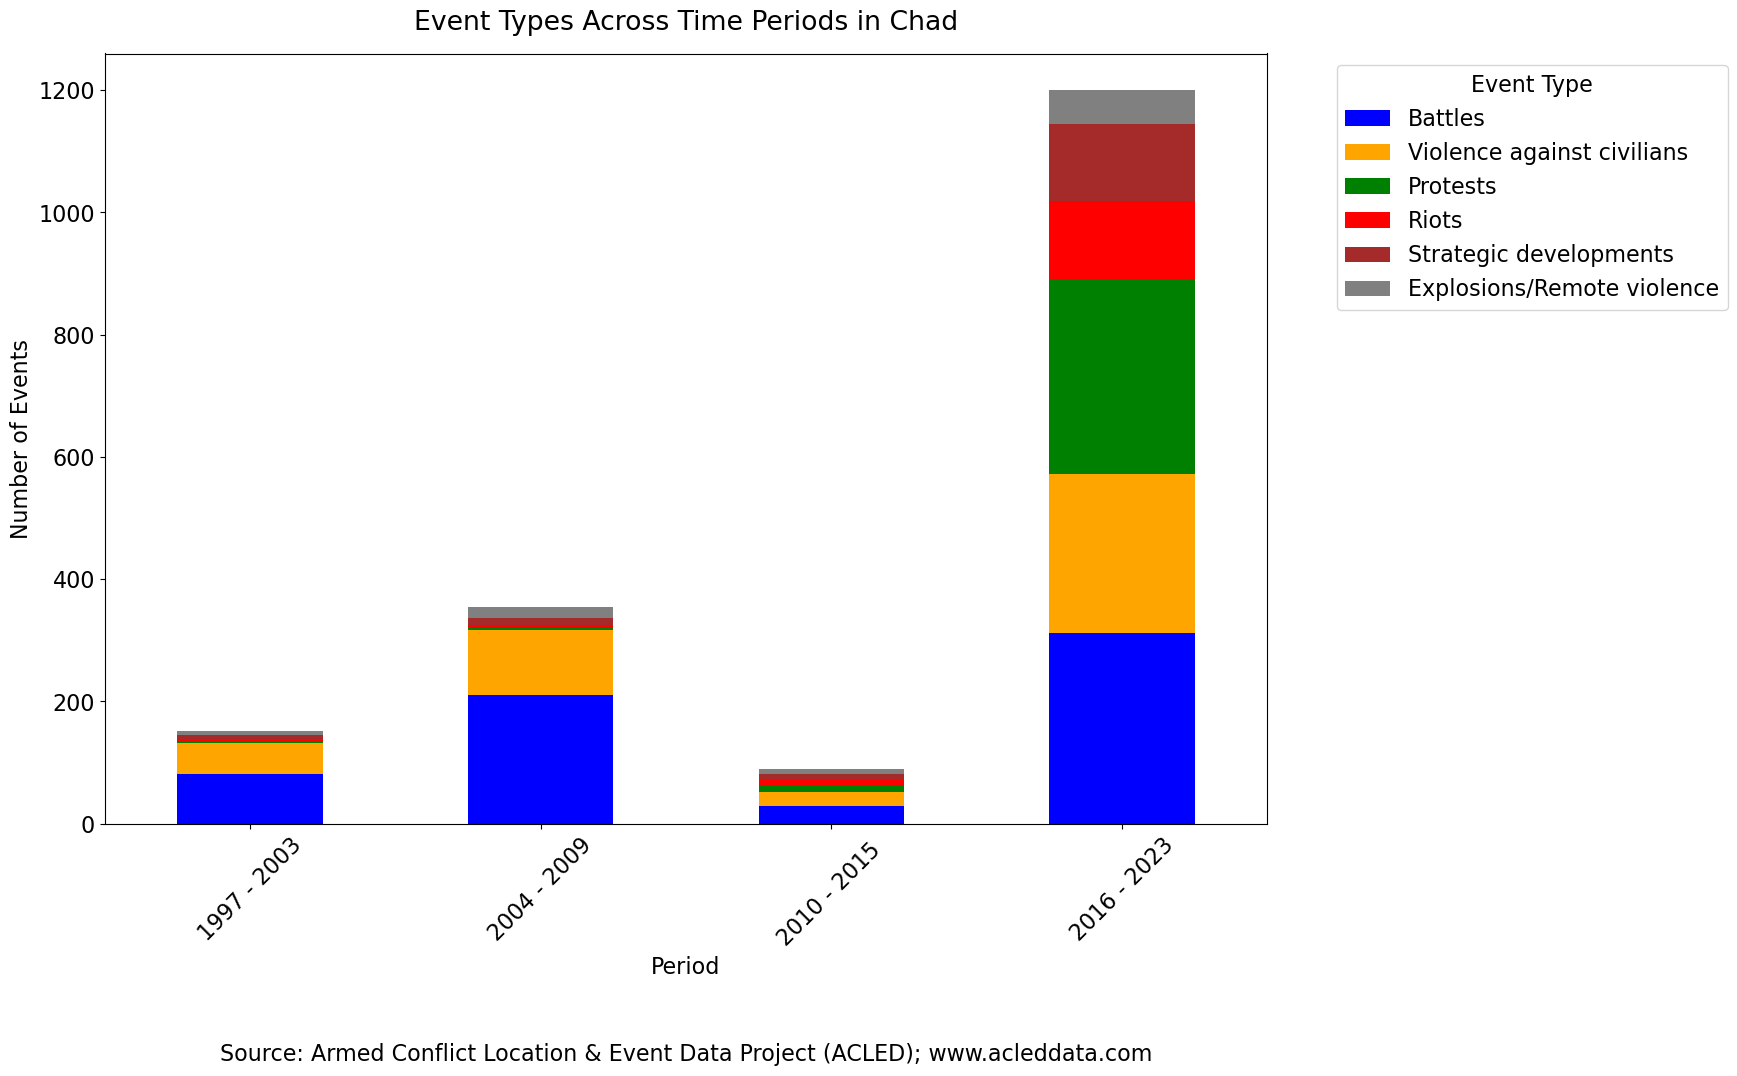

In [337]:
# Filter data for events in Chad
chad_data = zakouma_gdf[zakouma_gdf['country'] == 'Chad']

# Convert 'year' to numeric format
chad_data['year'] = pd.to_numeric(chad_data['year'], errors='coerce')


# Define time periods for the province data
pre_2010_1 = chad_data[(chad_data['year'] >= 1997) & (chad_data['year'] <= 2004)]
pre_2010_2 = chad_data[(chad_data['year'] >= 2005) & (chad_data['year'] < 2010)]
post_2010_1 = chad_data[(chad_data['year'] >= 2010) & (chad_data['year'] <= 2015)]
post_2010_2 = chad_data[(chad_data['year'] >= 2016) & (chad_data['year'] <= 2023)]

# Create pivot tables for event types for each time period
pivot_pre_2010_1 = pd.pivot_table(pre_2010_1, values='event_id_cnty', index='event_type', aggfunc='count', fill_value=0)
pivot_pre_2010_2 = pd.pivot_table(pre_2010_2, values='event_id_cnty', index='event_type', aggfunc='count', fill_value=0)
pivot_post_2010_1 = pd.pivot_table(post_2010_1, values='event_id_cnty', index='event_type', aggfunc='count', fill_value=0)
pivot_post_2010_2 = pd.pivot_table(post_2010_2, values='event_id_cnty', index='event_type', aggfunc='count', fill_value=0)

# Define colors for each event type consistently
event_type_colors = {
    'Battles': 'blue',
    'Violence against civilians': 'orange',
    'Protests': 'green',
    'Riots': 'red',
    'Strategic developments': 'brown',
    'Explosions/Remote violence': 'grey'
}

# Apply the same color mapping to all the pivot tables
pivot_pre_2010_1 = pivot_pre_2010_1.reindex(event_type_colors.keys()).fillna(0)
pivot_pre_2010_2 = pivot_pre_2010_2.reindex(event_type_colors.keys()).fillna(0)
pivot_post_2010_1 = pivot_post_2010_1.reindex(event_type_colors.keys()).fillna(0)
pivot_post_2010_2 = pivot_post_2010_2.reindex(event_type_colors.keys()).fillna(0)


# Combine the pivot tables
combined_pivot = pd.concat([pivot_pre_2010_1, pivot_pre_2010_2, pivot_post_2010_1, pivot_post_2010_2],
                           axis=1,
                           keys=['1997 - 2003', '2004 - 2009', '2010 - 2015 ', '2016 - 2023'])

# Transpose the DataFrame to have periods as columns
combined_pivot = combined_pivot.T

# Set the font size
plt.rc('font', size=16)

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(15, 10))
combined_pivot.plot(kind='bar', stacked=True, color=[event_type_colors[event] for event in combined_pivot.columns], rot=45, ax=ax)
plt.xlabel('Period')
plt.ylabel('Number of Events')
plt.title('Event Types Across Time Periods in Chad', y = 1.02)

# Set x-axis labels to the periods
plt.xticks(range(4), ['1997 - 2003', '2004 - 2009', '2010 - 2015 ', '2016 - 2023'], rotation=45)

# Add a legend and customize location
plt.legend(title='Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add source text at the bottom
source_text = "Source: Armed Conflict Location & Event Data Project (ACLED); www.acleddata.com"
plt.text(0.5, -0.30, source_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=16)

# Save it as an image
plt.savefig('Grouped_Bar_Periods_chad.png', dpi=300, bbox_inches='tight')

plt.show()

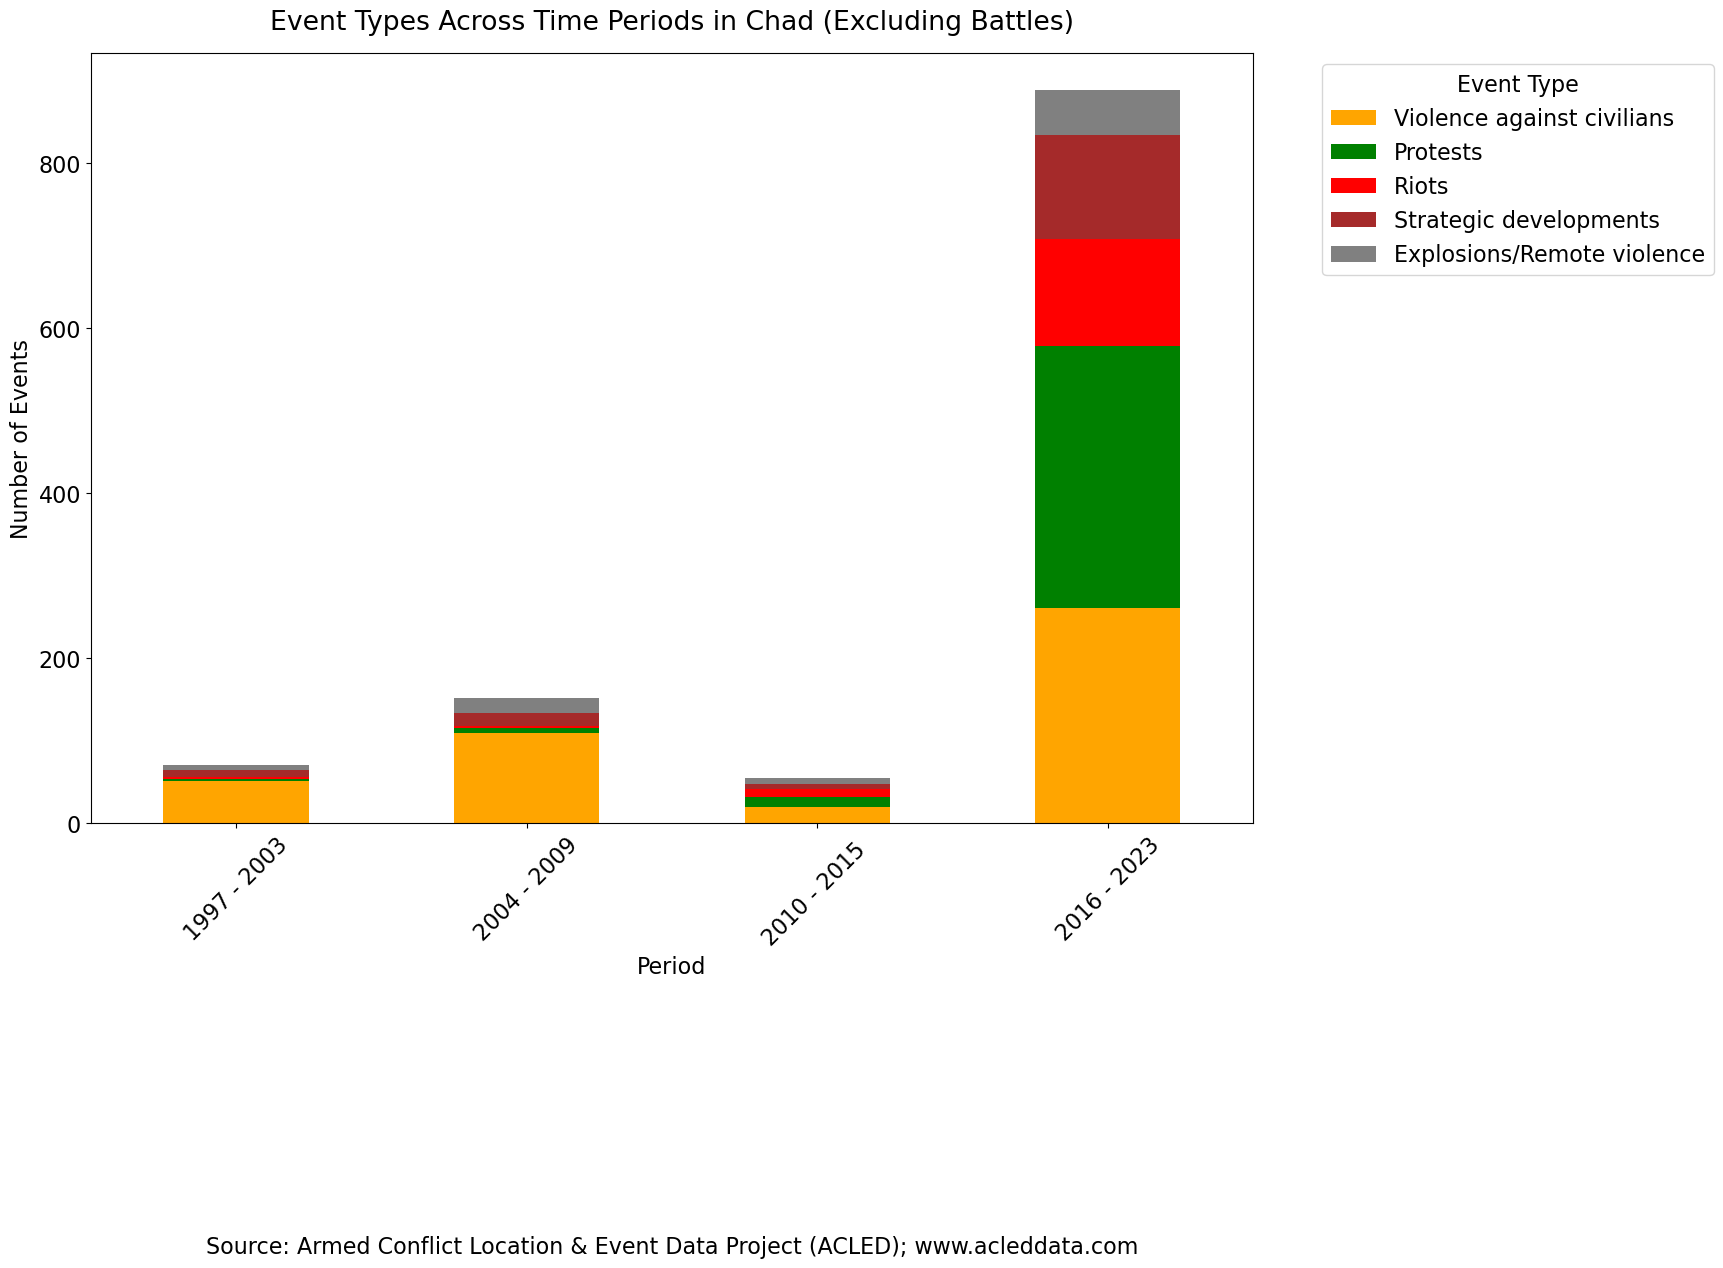

In [338]:
# Filter data for events in Chad
chad_data = zakouma_gdf[zakouma_gdf['country'] == 'Chad']

# Convert 'year' to numeric format
chad_data['year'] = pd.to_numeric(chad_data['year'], errors='coerce')


# Define time periods for the province data
pre_2010_1 = chad_data[(chad_data['year'] >= 1997) & (chad_data['year'] <= 2004)]
pre_2010_2 = chad_data[(chad_data['year'] >= 2005) & (chad_data['year'] <= 2010)]
post_2010_1 = chad_data[(chad_data['year'] >= 2011) & (chad_data['year'] <= 2015)]
post_2010_2 = chad_data[(chad_data['year'] >= 2016) & (chad_data['year'] <= 2023)]

# Filter out "Battles"
pre_2010_1 = pre_2010_1[pre_2010_1['event_type'] != 'Battles']
pre_2010_2 = pre_2010_2[pre_2010_2['event_type'] != 'Battles']
post_2010_1 = post_2010_1[post_2010_1['event_type'] != 'Battles']
post_2010_2 = post_2010_2[post_2010_2['event_type'] != 'Battles']

# Create pivot tables for event types for each time period
pivot_pre_2010_1 = pd.pivot_table(pre_2010_1, values='event_id_cnty', index='event_type', aggfunc='count', fill_value=0)
pivot_pre_2010_2 = pd.pivot_table(pre_2010_2, values='event_id_cnty', index='event_type', aggfunc='count', fill_value=0)
pivot_post_2010_1 = pd.pivot_table(post_2010_1, values='event_id_cnty', index='event_type', aggfunc='count', fill_value=0)
pivot_post_2010_2 = pd.pivot_table(post_2010_2, values='event_id_cnty', index='event_type', aggfunc='count', fill_value=0)

# Define colors for each event type consistently
event_type_colors = {
    'Violence against civilians': 'orange',
    'Protests': 'green',
    'Riots': 'red',
    'Strategic developments': 'brown',
    'Explosions/Remote violence': 'grey'
}

# Apply the same color mapping to all the pivot tables
pivot_pre_2010_1 = pivot_pre_2010_1.reindex(event_type_colors.keys()).fillna(0)
pivot_pre_2010_2 = pivot_pre_2010_2.reindex(event_type_colors.keys()).fillna(0)
pivot_post_2010_1 = pivot_post_2010_1.reindex(event_type_colors.keys()).fillna(0)
pivot_post_2010_2 = pivot_post_2010_2.reindex(event_type_colors.keys()).fillna(0)


# Combine the pivot tables
combined_pivot = pd.concat([pivot_pre_2010_1, pivot_pre_2010_2, pivot_post_2010_1, pivot_post_2010_2],
                           axis=1,
                           keys=['1997 - 2003', '2004 - 2009', '2010 - 2015 ', '2016 - 2023'])

# Transpose the DataFrame to have periods as columns
combined_pivot = combined_pivot.T

# Set the font size
plt.rc('font', size=16)

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(15, 10))
combined_pivot.plot(kind='bar', stacked=True, color=[event_type_colors[event] for event in combined_pivot.columns], rot=45, ax=ax)
plt.xlabel('Period')
plt.ylabel('Number of Events')
plt.title('Event Types Across Time Periods in Chad (Excluding Battles)', y = 1.02)

# Set x-axis labels to the periods
plt.xticks(range(4), ['1997 - 2003', '2004 - 2009', '2010 - 2015 ', '2016 - 2023'], rotation=45)

# Add a legend and customize location
plt.legend(title='Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add source text at the bottom
source_text = "Source: Armed Conflict Location & Event Data Project (ACLED); www.acleddata.com"
plt.text(0.5, -0.55, source_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=16)

# Save it as an image
plt.savefig('Grouped_Bar_Periods_chad_excl_battles.png', dpi=300, bbox_inches='tight')

plt.show()

In [5]:
from IPython.display import HTML, display, IFrame
import folium
from folium.plugins import MarkerCluster
import geopandas as gpd
import json


# Create a map centered around Chad
map_center = [zakouma_df['latitude'].mean(), zakouma_df['longitude'].mean()]
mymap_before_2010 = folium.Map(location=map_center, zoom_start=5)
mymap_after_2010 = folium.Map(location=map_center, zoom_start=5)

# Create a MarkerCluster layer for better performance with many data points
marker_cluster_before_2010 = MarkerCluster().add_to(mymap_before_2010)
marker_cluster_after_2010 = MarkerCluster().add_to(mymap_after_2010)

# Add data points to the maps based on the condition
for idx, row in zakouma_df[zakouma_df['year'] <= 2010].iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['event_type']} - {row['event_date']}",
        icon=folium.Icon(color='blue' if row['event_type'] == 'Battles' else 'red')
    ).add_to(marker_cluster_before_2010)

for idx, row in zakouma_df[zakouma_df['year'] > 2010].iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['event_type']} - {row['event_date']}",
        icon=folium.Icon(color='blue' if row['event_type'] == 'Battles' else 'red')
    ).add_to(marker_cluster_after_2010)

# Add the GeoDataFrame to the maps
folium.GeoJson(merged_gdf3).add_to(mymap_before_2010)
folium.GeoJson(merged_gdf3).add_to(mymap_after_2010)

# Plot the buffer zone (gdf2) in orange
folium.GeoJson(gdf2, style_function=lambda x: {'fillColor': 'orange', 'color': 'orange'}).add_to(mymap_before_2010)
folium.GeoJson(gdf2, style_function=lambda x: {'fillColor': 'orange', 'color': 'orange'}).add_to(mymap_after_2010)

# Save the maps to HTML files
mymap_before_2010.save("map_before_2010.html")
mymap_after_2010.save("map_after_2010.html")

# Display the maps in the notebook with titles
display(HTML('<h3>Incidents before 2010 In Zakouma and 5km, 20km Buffer Zone</h3>'))
display(IFrame("map_before_2010.html", width=700, height=500))

NameError: name 'merged_gdf3' is not defined

In [138]:
# hide
display(HTML('<h3>Incidents after 2010 In Zakouma and 5km, 20km Buffer Zone</h3>'))
display(IFrame("map_after_2010.html", width=700, height=500))

In [52]:
# Perform a spatial overlay using the buffer zone ('gdf1') and the national park ('gdf')
merged_gdf3 = overlay(merged_gdf, gdf2, how='union')

# Display the merged GeoDataFrame
merged_gdf3.head()

ID_   ID                                      Nom  fid_1  OID_  \
0  NaN  NaN                                      NaN    NaN   NaN   
1  0.0  0.0  Grand Ecosystème Fonctionnel de Zakouma    0.0   0.0   
2  0.0  0.0  Grand Ecosystème Fonctionnel de Zakouma    0.0   0.0   
3  NaN  NaN                                      NaN    NaN   NaN   

                                      Name FolderPath  SymbolID  AltMode  \
0                                      NaN        NaN       NaN      NaN   
1  Grand Ecosystème Fonctionnel de Zakouma       None       0.0      0.0   
2  Grand Ecosystème Fonctionnel de Zakouma       None       0.0      0.0   
3                                      NaN        NaN       NaN      NaN   

   Base  ...  path  area_sqkm area_new Shape_Le_1  Shape_Area_1  Shape_Leng_2  \
0   NaN  ...  None        NaN      NaN        NaN           NaN     22.265236   
1   0.0  ...  None        0.0      0.0  12.264766      2.582170           NaN   
2   0.0  ...  None        0.0      0.0   7.439705      0.614148           NaN   
3   NaN  ...  None        NaN      NaN        NaN           NaN     22.265236   

   Shape_Area_2  Shape_Leng  Shape_Area  \
0      1.992553   22.157745     0.49769   
1           NaN         NaN         NaN   
2           NaN         NaN         NaN   
3      1.992553         NaN         NaN   

                                            geometry  
0  MULTIPOLYGON Z (((19.39127 12.23224 0.00000, 1...  
1  POLYGON Z ((18.68584 9.87807 0.00000, 18.77426...  
2  POLYGON Z ((18.70641 11.11265 0.00000, 18.6928...  
3  POLYGON Z ((19.56244 12.25385 0.00000, 19.5626...  

[4 rows x 30 columns]

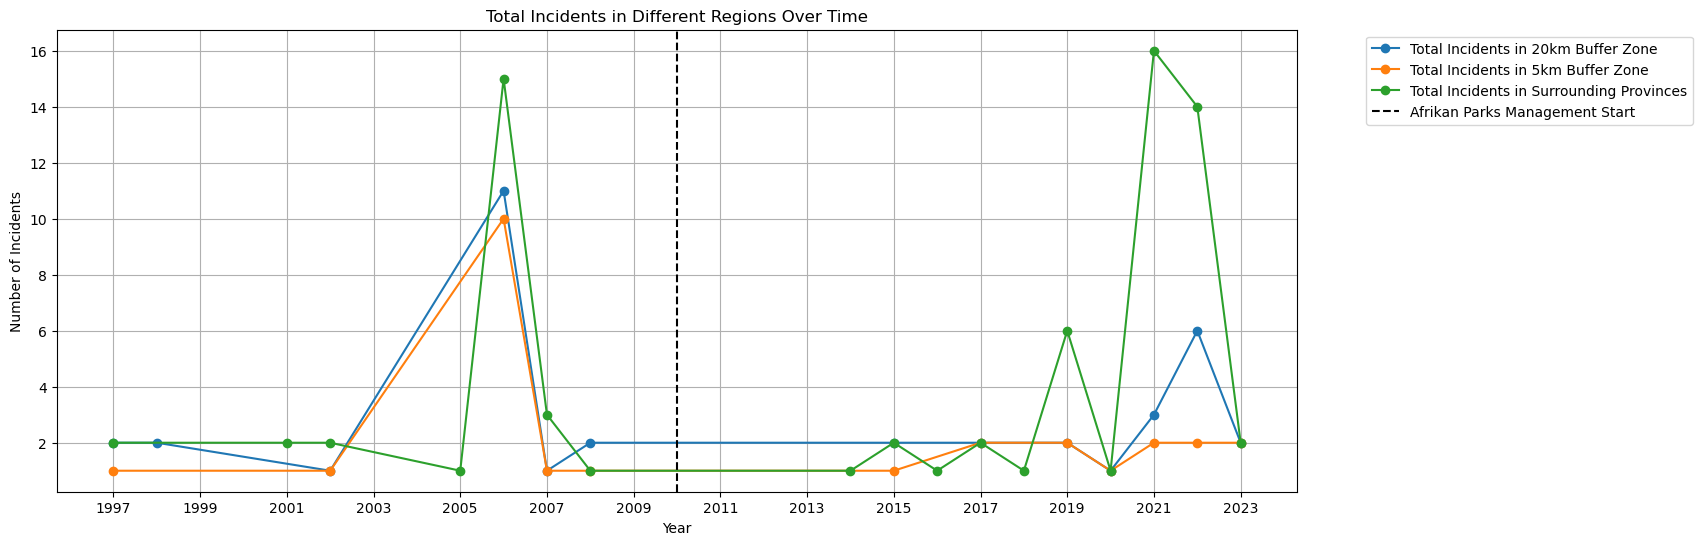

In [62]:
#hide

#  'latitude' and 'longitude' are columns in your zakouma_df
geometry = [Point(xy) for xy in zip(zakouma_df['longitude'], zakouma_df['latitude'])]
zakouma_gdf = gpd.GeoDataFrame(zakouma_df, geometry=geometry)

# Set CRS for the GeoDataFrame
zakouma_gdf.crs = "EPSG:4326"

# Perform the spatial join with the merged GeoDataFrame for 20km buffer zone
zakouma_within_shape_20km = gpd.sjoin(zakouma_gdf, merged_gdf, how="inner", op="within")

# Perform the spatial join with the merged GeoDataFrame for 5km buffer zone
zakouma_within_shape_5km = gpd.sjoin(zakouma_gdf, merged_gdf2, how="inner", op="within")

# Filter data for incidents in the specified region inside the shape and buffer zones
region_data_20km = zakouma_within_shape_20km.copy()
region_data_5km = zakouma_within_shape_5km.copy()
region_data_prov = prov_data.copy()

# Convert 'year' to integer format
region_data_20km['year'] = region_data_20km['year'].astype(int)
region_data_5km['year'] = region_data_5km['year'].astype(int)
region_data_prov['year'] = region_data_prov['year'].astype(int)

# Add a vertical line at the year 2010
afrikan_parks_start_year = 2010

# Total incidents in the region timeline for 20km buffer zone
total_incidents_region_timeline_20km = region_data_20km.groupby('year').size().reset_index(name='total_incidents_region_20km')

# Total incidents in the region timeline for 5km buffer zone
total_incidents_region_timeline_5km = region_data_5km.groupby('year').size().reset_index(name='total_incidents_region_5km')

# Total incidents in the region timeline for surrounding provinces
total_incidents_region_timeline_prov = region_data_prov.groupby('year').size().reset_index(name='total_incidents_region_prov')

# Plot the timelines for all regions
plt.figure(figsize=(16, 6))

# Plot total incidents in the region with markers for 20km buffer zone
plt.plot(total_incidents_region_timeline_20km['year'], total_incidents_region_timeline_20km['total_incidents_region_20km'],
         marker='o', linestyle='-', label='Total Incidents in 20km Buffer Zone')

# Plot total incidents in the region with markers for 5km buffer zone
plt.plot(total_incidents_region_timeline_5km['year'], total_incidents_region_timeline_5km['total_incidents_region_5km'],
         marker='o', linestyle='-', label='Total Incidents in 5km Buffer Zone')

# Plot total incidents in the region with markers for surrounding provinces
plt.plot(total_incidents_region_timeline_prov['year'], total_incidents_region_timeline_prov['total_incidents_region_prov'],
         marker='o', linestyle='-', label='Total Incidents in Surrounding Provinces')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Total Incidents in Different Regions Over Time')

# Set x-axis ticks to cover the entire range of years and show every year
plt.xticks(range(region_data_20km['year'].min(), region_data_20km['year'].max() + 1, 2))

# Add a vertical line at the year 2010 if applicable
# Modify the condition based on your data
if 2010 in region_data_20km['year'].values:
    plt.axvline(x=2010, color='red', linestyle='--', label='Afrikan Parks Management')
    
# Add a vertical line at the year 2010
plt.axvline(x=2010, color='black', linestyle='--', label='Afrikan Parks Management Start')

# Show the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.grid(True)
plt.show()

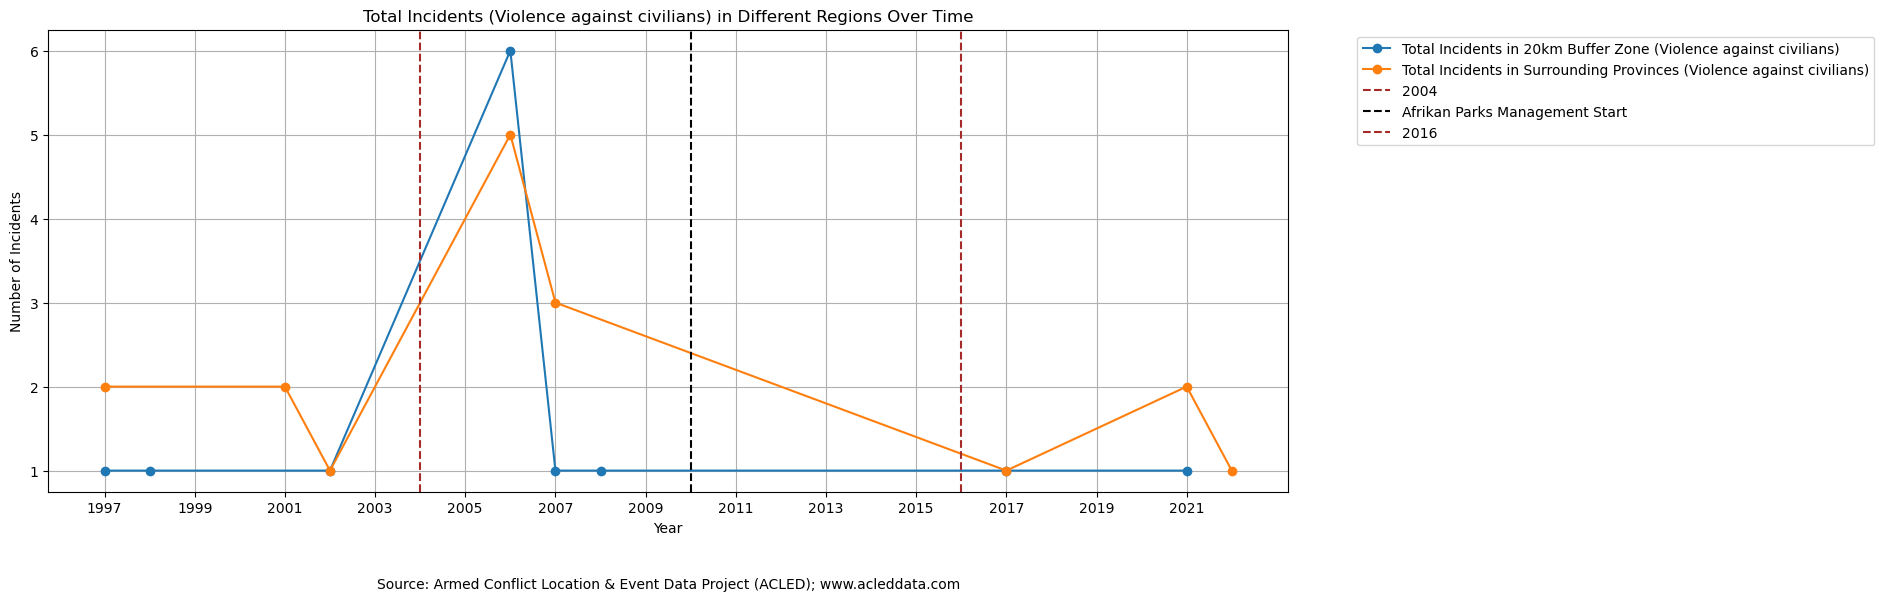

In [128]:
#hide


# Filter data for 'Violence against civilians' incidents in Chad
chad_data_violence = zakouma_df[(zakouma_df['country'] == 'Chad') & (zakouma_df['event_type'] == 'Violence against civilians')]

# Total 'Violence against civilians' incidents in Chad timeline
total_incidents_chad_timeline_violence = chad_data_violence.groupby('year').size().reset_index(name='total_incidents_chad_violence')

# Filter data for 'Violence against civilians' incidents in the 20km buffer zone
region_data_20km_violence = region_data_20km[region_data_20km['event_type'] == 'Violence against civilians'].copy()

# Total 'Violence against civilians' incidents in the 20km buffer zone timeline
total_incidents_region_timeline_20km_violence = region_data_20km_violence.groupby('year').size().reset_index(name='total_incidents_region_20km_violence')

# Filter data for 'Violence against civilians' incidents in the 5km buffer zone
region_data_5km_violence = region_data_5km[region_data_5km['event_type'] == 'Violence against civilians'].copy()

# Total 'Violence against civilians' incidents in the 5km buffer zone timeline
total_incidents_region_timeline_5km_violence = region_data_5km_violence.groupby('year').size().reset_index(name='total_incidents_region_5km_violence')

# Filter data for 'Violence against civilians' incidents in the surrounding provinces
region_data_prov_violence = region_data_prov[region_data_prov['event_type'] == 'Violence against civilians'].copy()

# Total 'Violence against civilians' incidents in the surrounding provinces timeline
total_incidents_region_timeline_prov_violence = region_data_prov_violence.groupby('year').size().reset_index(name='total_incidents_region_prov_violence')

# Plot the timelines for all regions with 'Violence against civilians'
plt.figure(figsize=(16, 6))

# Plot total incidents in Chad with markers for 'Violence against civilians'
# plt.plot(total_incidents_chad_timeline_violence['year'], total_incidents_chad_timeline_violence['total_incidents_chad_violence'],
#          marker='o', linestyle='-', label='Total Incidents in Chad (Violence against civilians)')

# Plot total incidents in the 20km buffer zone with markers for 'Violence against civilians'
plt.plot(total_incidents_region_timeline_20km_violence['year'], total_incidents_region_timeline_20km_violence['total_incidents_region_20km_violence'],
         marker='o', linestyle='-', label='Total Incidents in 20km Buffer Zone (Violence against civilians)')



# Plot total incidents in the surrounding provinces with markers for 'Violence against civilians'
plt.plot(total_incidents_region_timeline_prov_violence['year'], total_incidents_region_timeline_prov_violence['total_incidents_region_prov_violence'],
         marker='o', linestyle='-', label='Total Incidents in Surrounding Provinces (Violence against civilians)')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Total Incidents (Violence against civilians) in Different Regions Over Time')

# Set x-axis ticks to cover the entire range of years and show every year
plt.xticks(range(region_data_20km_violence['year'].min(), region_data_20km_violence['year'].max() + 1, 2))

# Add a vertical line at the year 2010
plt.axvline(x=2004, color='brown', linestyle='--', label='2004')
plt.axvline(x=2010, color='black', linestyle='--', label='Afrikan Parks Management Start')
plt.axvline(x=2016, color='brown', linestyle='--', label='2016')

# Show the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add source text at the bottom
source_text = "Source: Armed Conflict Location & Event Data Project (ACLED); www.acleddata.com"
plt.text(0.5, -0.20, source_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)

# Save it as an image
plt.savefig('Violence_Against_Civilians_20km_Provinces(Excl Chad).png', dpi=300, bbox_inches='tight')

# Show the plot
plt.grid(True)
plt.show()

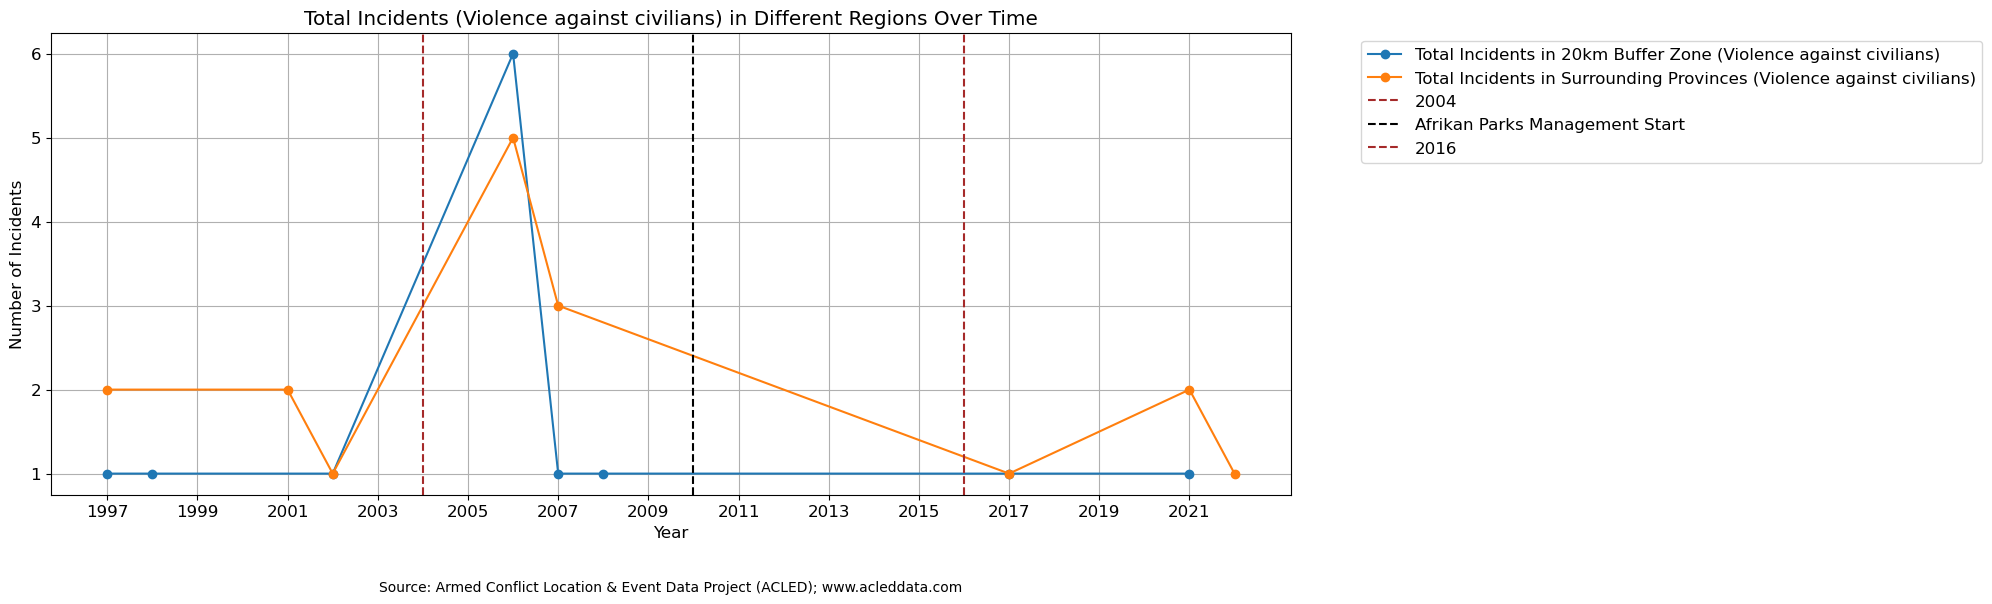

In [261]:
#hide


# Filter data for 'Violence against civilians' incidents in Chad
chad_data_violence = zakouma_df[(zakouma_df['country'] == 'Chad') & (zakouma_df['event_type'] == 'Violence against civilians')]

# Total 'Violence against civilians' incidents in Chad timeline
total_incidents_chad_timeline_violence = chad_data_violence.groupby('year').size().reset_index(name='total_incidents_chad_violence')

# Filter data for 'Violence against civilians' incidents in the 20km buffer zone
region_data_20km_violence = region_data_20km[region_data_20km['event_type'] == 'Violence against civilians'].copy()

# Total 'Violence against civilians' incidents in the 20km buffer zone timeline
total_incidents_region_timeline_20km_violence = region_data_20km_violence.groupby('year').size().reset_index(name='total_incidents_region_20km_violence')

# Filter data for 'Violence against civilians' incidents in the 5km buffer zone
region_data_5km_violence = region_data_5km[region_data_5km['event_type'] == 'Violence against civilians'].copy()

# Total 'Violence against civilians' incidents in the 5km buffer zone timeline
total_incidents_region_timeline_5km_violence = region_data_5km_violence.groupby('year').size().reset_index(name='total_incidents_region_5km_violence')

# Filter data for 'Violence against civilians' incidents in the surrounding provinces
region_data_prov_violence = region_data_prov[region_data_prov['event_type'] == 'Violence against civilians'].copy()

# Total 'Violence against civilians' incidents in the surrounding provinces timeline
total_incidents_region_timeline_prov_violence = region_data_prov_violence.groupby('year').size().reset_index(name='total_incidents_region_prov_violence')

# Plot the timelines for all regions with 'Violence against civilians'
plt.figure(figsize=(16, 6))

# Plot total incidents in Chad with markers for 'Violence against civilians'
# plt.plot(total_incidents_chad_timeline_violence['year'], total_incidents_chad_timeline_violence['total_incidents_chad_violence'],
#          marker='o', linestyle='-', label='Total Incidents in Chad (Violence against civilians)')

# Plot total incidents in the 20km buffer zone with markers for 'Violence against civilians'
plt.plot(total_incidents_region_timeline_20km_violence['year'], total_incidents_region_timeline_20km_violence['total_incidents_region_20km_violence'],
         marker='o', linestyle='-', label='Total Incidents in 20km Buffer Zone (Violence against civilians)')



# Plot total incidents in the surrounding provinces with markers for 'Violence against civilians'
plt.plot(total_incidents_region_timeline_prov_violence['year'], total_incidents_region_timeline_prov_violence['total_incidents_region_prov_violence'],
         marker='o', linestyle='-', label='Total Incidents in Surrounding Provinces (Violence against civilians)')

# # Plot total incidents of 'Violence against civilians' in Chad
# plt.plot(total_incidents_chad_timeline_violence['year'], total_incidents_chad_timeline_violence['total_incidents_chad_violence'],
#          marker='o', linestyle='-', color='red', label='Total Incidents in Chad (Violence against civilians)')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Total Incidents (Violence against civilians) in Different Regions Over Time')

# Set x-axis ticks to cover the entire range of years and show every year
plt.xticks(range(region_data_20km_violence['year'].min(), region_data_20km_violence['year'].max() + 1, 2))

# Add a vertical line at the year 2010
plt.axvline(x=2004, color='brown', linestyle='--', label='2004')
plt.axvline(x=2010, color='black', linestyle='--', label='Afrikan Parks Management Start')
plt.axvline(x=2016, color='brown', linestyle='--', label='2016')

# Show the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add source text at the bottom
source_text = "Source: Armed Conflict Location & Event Data Project (ACLED); www.acleddata.com"
plt.text(0.5, -0.20, source_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)

# Save it as an image
plt.savefig('Violence_Against_Civilians_20km_Provinces(Excl Chad).png', dpi=300, bbox_inches='tight')

# Show the plot
plt.grid(True)
plt.show()

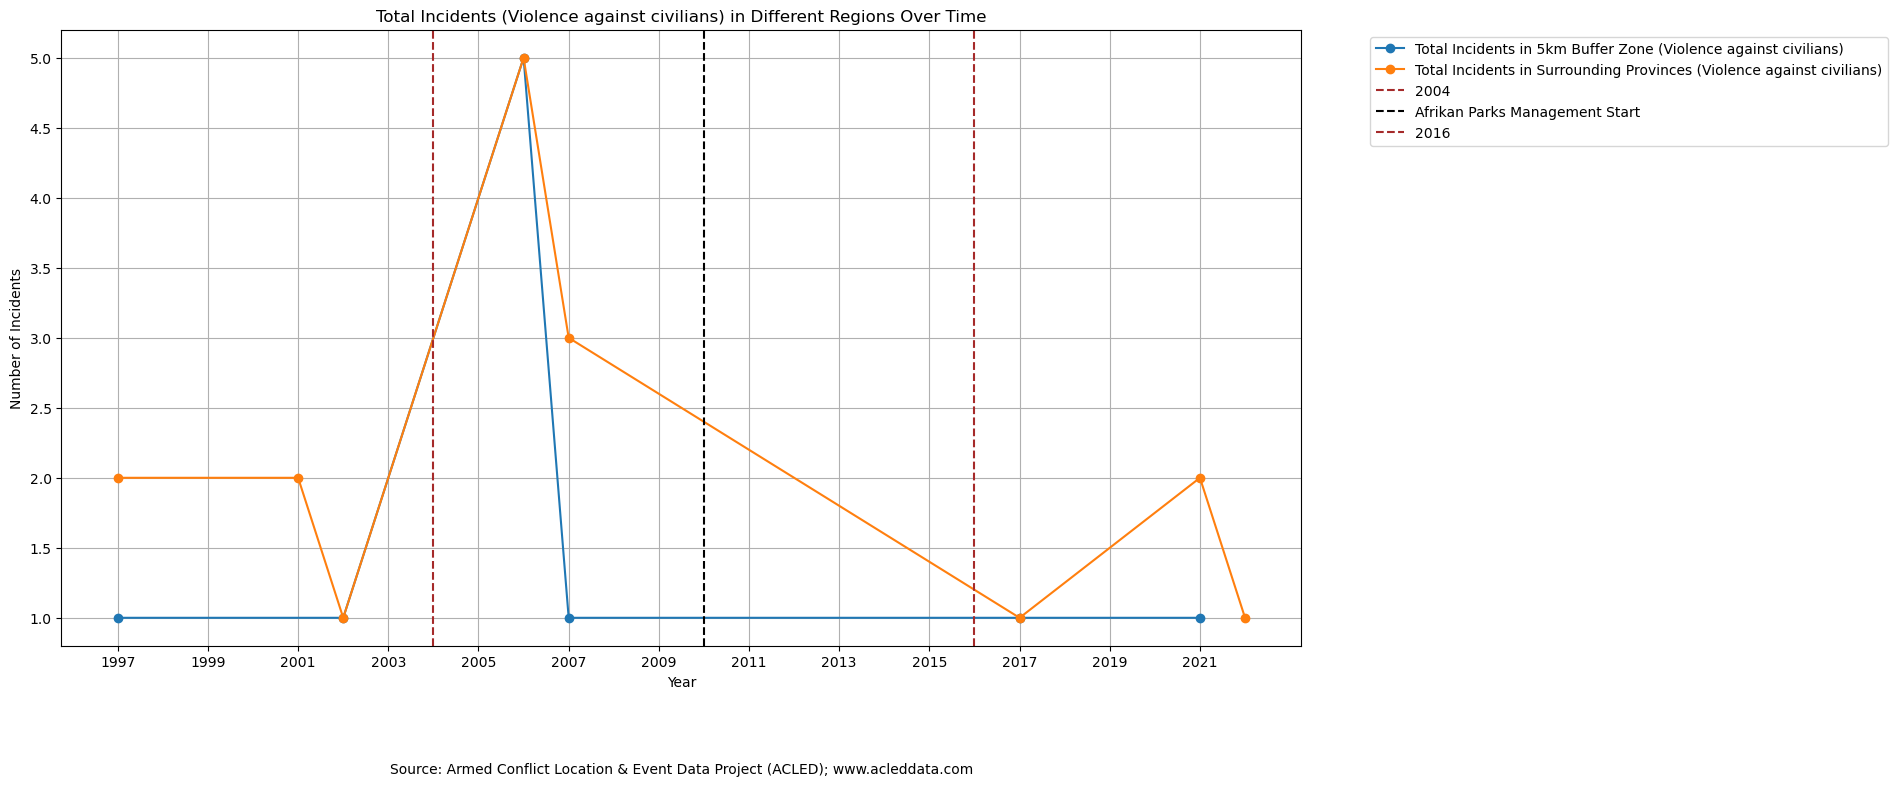

In [126]:
# Plot the timelines for all regions with 'Violence against civilians'
plt.figure(figsize=(16, 8))

# Plot total incidents in the 5km buffer zone with markers for 'Violence against civilians'
plt.plot(total_incidents_region_timeline_5km_violence['year'], total_incidents_region_timeline_5km_violence['total_incidents_region_5km_violence'],
         marker='o', linestyle='-', label='Total Incidents in 5km Buffer Zone (Violence against civilians)')

# Plot total incidents in the surrounding provinces with markers for 'Violence against civilians'
plt.plot(total_incidents_region_timeline_prov_violence['year'], total_incidents_region_timeline_prov_violence['total_incidents_region_prov_violence'],
         marker='o', linestyle='-', label='Total Incidents in Surrounding Provinces (Violence against civilians)')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Total Incidents (Violence against civilians) in Different Regions Over Time')

# Set x-axis ticks to cover the entire range of years and show every year
plt.xticks(range(region_data_20km_violence['year'].min(), region_data_20km_violence['year'].max() + 1, 2))

# Add a vertical line at the year 2010
plt.axvline(x=2004, color='brown', linestyle='--', label='2004')
plt.axvline(x=2010, color='black', linestyle='--', label='Afrikan Parks Management Start')
plt.axvline(x=2016, color='brown', linestyle='--', label='2016')

# Show the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add source text at the bottom
source_text = "Source: Armed Conflict Location & Event Data Project (ACLED); www.acleddata.com"
plt.text(0.5, -0.20, source_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)

# Save it as an image
plt.savefig('Violence_Against_Civilians_5km_Provinces_excl_chad.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.grid(True)
plt.show()

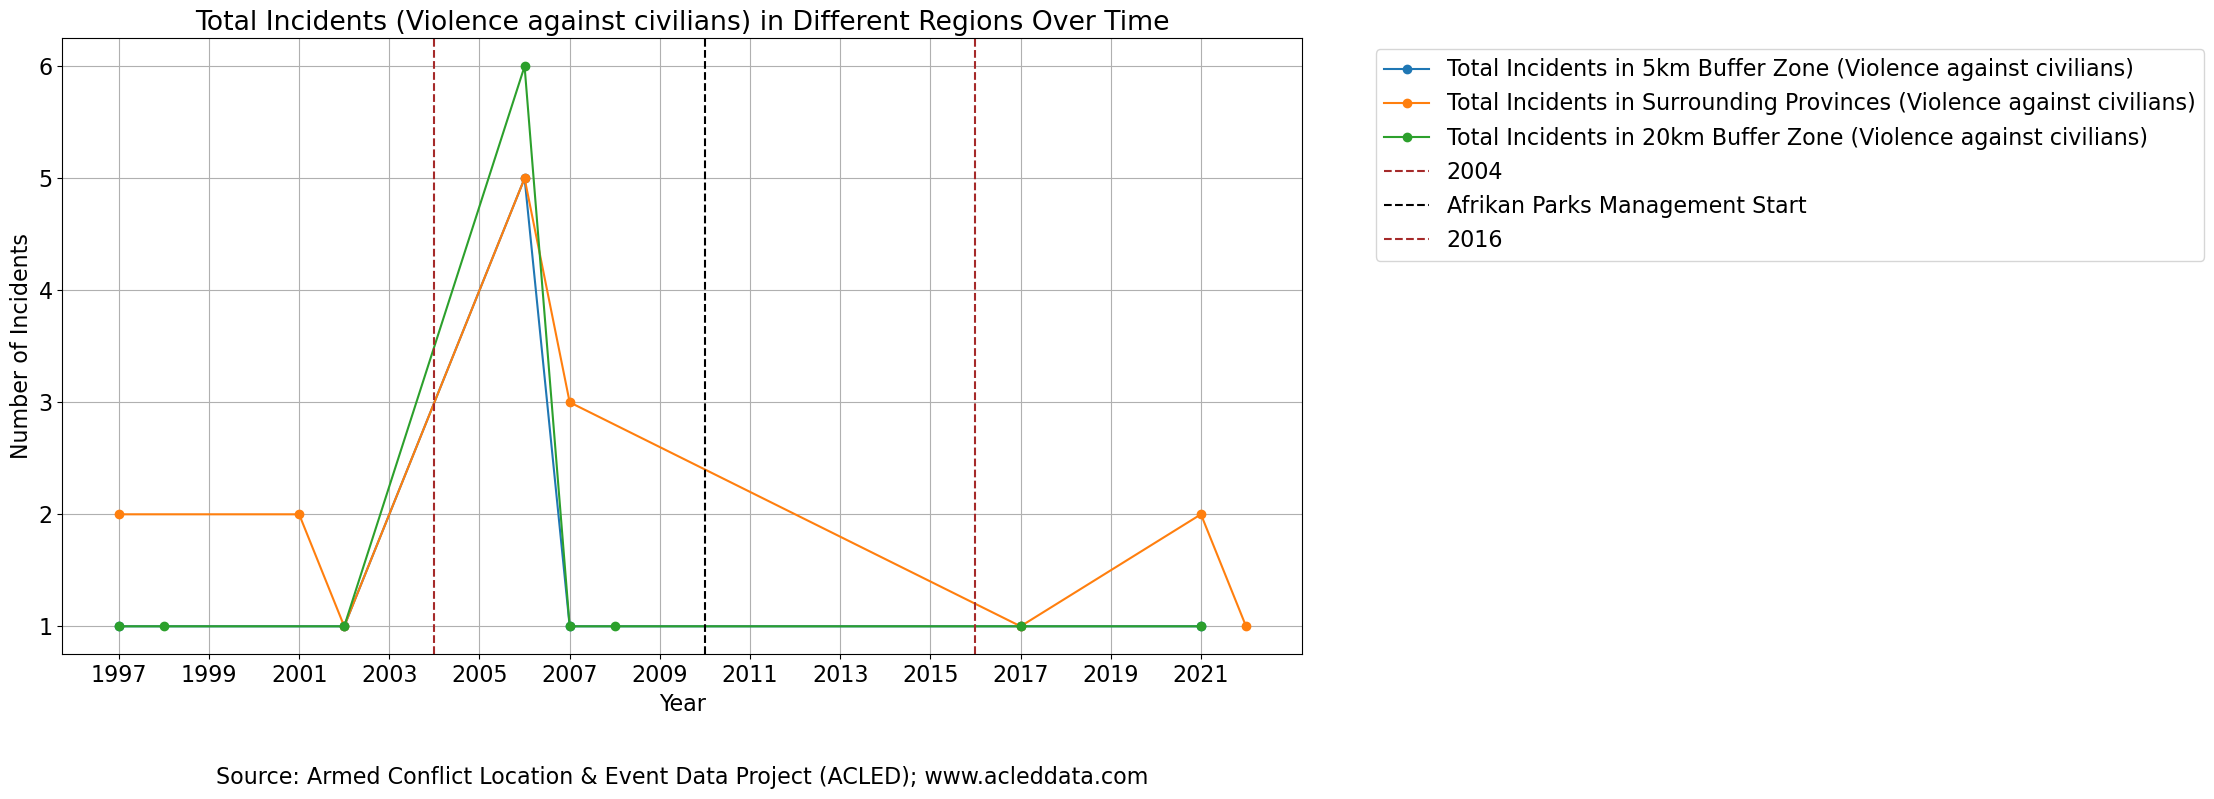

In [341]:
# Filter data for 'Violence against civilians' incidents in Chad
chad_data_violence = zakouma_df[(zakouma_df['country'] == 'Chad') & (zakouma_df['event_type'] == 'Violence against civilians')]

# Filter data for 'Violence against civilians' incidents in the 20km buffer zone
region_data_20km_violence = region_data_20km[region_data_20km['event_type'] == 'Violence against civilians'].copy()

# Filter data for 'Violence against civilians' incidents in the 5km buffer zone
region_data_5km_violence = region_data_5km[region_data_5km['event_type'] == 'Violence against civilians'].copy()

# Total 'Violence against civilians' incidents in Chad timeline
total_incidents_chad_timeline_violence = chad_data_violence.groupby('year').size().reset_index(name='total_incidents_chad_violence')

# Total 'Violence against civilians' incidents in the surrounding provinces timeline
total_incidents_region_timeline_prov_violence = region_data_prov_violence.groupby('year').size().reset_index(name='total_incidents_region_prov_violence')


# Plot the timelines for different regions with 'Violence against civilians'
plt.figure(figsize=(16, 8))

# Plot total incidents in the 5km buffer zone with markers for 'Violence against civilians'
plt.plot(total_incidents_region_timeline_5km_violence['year'], total_incidents_region_timeline_5km_violence['total_incidents_region_5km_violence'],
         marker='o', linestyle='-', label='Total Incidents in 5km Buffer Zone (Violence against civilians)')

# Plot total incidents in the surrounding provinces with markers for 'Violence against civilians'
plt.plot(total_incidents_region_timeline_prov_violence['year'], total_incidents_region_timeline_prov_violence['total_incidents_region_prov_violence'],
         marker='o', linestyle='-', label='Total Incidents in Surrounding Provinces (Violence against civilians)')

# # Plot total incidents of 'Violence against civilians' in Chad
# plt.plot(total_incidents_chad_timeline_violence['year'], total_incidents_chad_timeline_violence['total_incidents_chad_violence'],
#          marker='o', linestyle='-', color='red', label='Total Incidents in Chad (Violence against civilians)')

# Plot total incidents in the 20km buffer zone with markers for 'Violence against civilians'
plt.plot(total_incidents_region_timeline_20km_violence['year'], total_incidents_region_timeline_20km_violence['total_incidents_region_20km_violence'],
         marker='o', linestyle='-', label='Total Incidents in 20km Buffer Zone (Violence against civilians)')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Total Incidents (Violence against civilians) in Different Regions Over Time')

# Set x-axis ticks to cover the entire range of years and show every year
plt.xticks(range(region_data_20km_violence['year'].min(), region_data_20km_violence['year'].max() + 1, 2))

# Add a vertical line at the year 2010
plt.axvline(x=2004, color='brown', linestyle='--', label='2004')
plt.axvline(x=2010, color='black', linestyle='--', label='Afrikan Parks Management Start')
plt.axvline(x=2016, color='brown', linestyle='--', label='2016')

# Show the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add source text at the bottom
source_text = "Source: Armed Conflict Location & Event Data Project (ACLED); www.acleddata.com"
plt.text(0.5, -0.20, source_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=16)

# Save it as an image
plt.savefig('Violence_Against_Civilians_20km_5km_Provinces.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.grid(True)
plt.show()

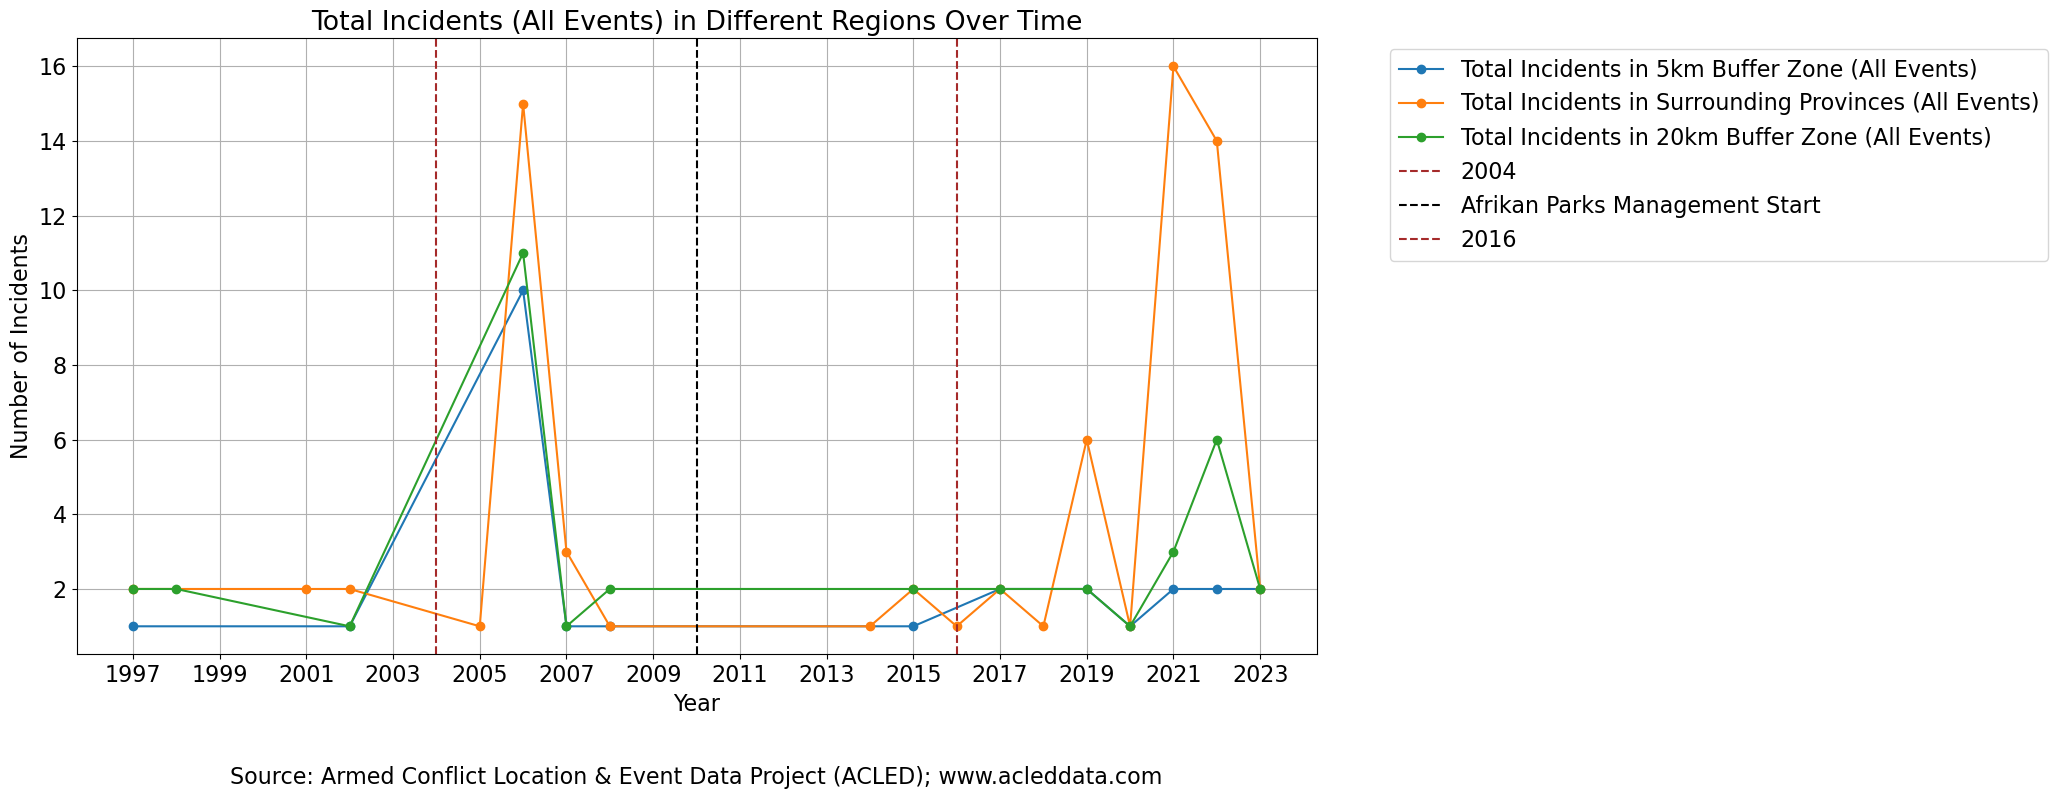

In [342]:
# Total incidents in Chad timeline for all event types
total_incidents_chad_timeline_all = zakouma_df[zakouma_df['country'] == 'Chad'].groupby('year').size().reset_index(name='total_incidents_chad_all')

# Total incidents in the 5km buffer zone timeline for all event types
total_incidents_region_timeline_5km_all = region_data_5km.groupby(['year']).size().reset_index(name='total_incidents_region_5km_all')

# Total incidents in the surrounding provinces timeline for all event types
total_incidents_region_timeline_prov_all = region_data_prov.groupby(['year']).size().reset_index(name='total_incidents_region_prov_all')

# Total incidents in the 20km buffer zone timeline for all event types
total_incidents_region_timeline_20km_all = region_data_20km.groupby(['year']).size().reset_index(name='total_incidents_region_20km_all')

# Plot the timelines for different regions with all events
plt.figure(figsize=(16, 8))

# Plot total incidents in the 5km buffer zone
plt.plot(total_incidents_region_timeline_5km_all['year'], total_incidents_region_timeline_5km_all['total_incidents_region_5km_all'],
         marker='o', linestyle='-', label='Total Incidents in 5km Buffer Zone (All Events)')

# Plot total incidents in the surrounding provinces
plt.plot(total_incidents_region_timeline_prov_all['year'], total_incidents_region_timeline_prov_all['total_incidents_region_prov_all'],
         marker='o', linestyle='-', label='Total Incidents in Surrounding Provinces (All Events)')

# # Plot total incidents in Chad
# plt.plot(total_incidents_chad_timeline_all['year'], total_incidents_chad_timeline_all['total_incidents_chad_all'],
#          marker='o', linestyle='-', color='red', label='Total Incidents in Chad (All Events)')

# Plot total incidents in the 20km buffer zone
plt.plot(total_incidents_region_timeline_20km_all['year'], total_incidents_region_timeline_20km_all['total_incidents_region_20km_all'],
         marker='o', linestyle='-', label='Total Incidents in 20km Buffer Zone (All Events)')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Total Incidents (All Events) in Different Regions Over Time')

# Set x-axis ticks to cover the entire range of years and show every year
plt.xticks(range(region_data_20km['year'].min(), region_data_20km['year'].max() + 1, 2))

# Add vertical lines for key years
plt.axvline(x=2004, color='brown', linestyle='--', label='2004')
plt.axvline(x=2010, color='black', linestyle='--', label='Afrikan Parks Management Start')
plt.axvline(x=2016, color='brown', linestyle='--', label='2016')

# Show the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add source text at the bottom
source_text = "Source: Armed Conflict Location & Event Data Project (ACLED); www.acleddata.com"
plt.text(0.5, -0.20, source_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=16)

# Save it as an image
plt.savefig('All_Events_20km_5km_Provinces.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.grid(True)
plt.show()

In [104]:

from scipy.stats import ttest_ind

#  'geometry' is the geometry column in your zakouma_gdf
zakouma_gdf = gpd.GeoDataFrame(zakouma_gdf, geometry='geometry')

# Spatial join to find events within merged_gdf
zakouma_within_merged = gpd.sjoin(zakouma_gdf, merged_gdf, how="inner", op="within")

# Filter data for 'Violence against civilians' incidents in the 20km buffer zone
zakouma_within_merged_violence = zakouma_within_merged[zakouma_within_merged['event_type'] == 'Violence against civilians'].copy()

# Total 'Violence against civilians' incidents in the 20km buffer zone timeline
total_incidents_zakouma_within_merged_violence_timeline = zakouma_within_merged_violence.groupby('year').size().reset_index(name='total_incidents_merged_region')

# Define years before and after Afrikan Parks management
years_before_afrikan_parks = range(1997, 2010)
years_after_afrikan_parks = range(2010, 2024)

# Extract data for violence incidents before and after Afrikan Parks
violence_before_afrikan_parks = total_incidents_zakouma_within_merged_violence_timeline[total_incidents_zakouma_within_merged_violence_timeline['year'].isin(years_before_afrikan_parks)]
violence_after_afrikan_parks = total_incidents_zakouma_within_merged_violence_timeline[total_incidents_zakouma_within_merged_violence_timeline['year'].isin(years_after_afrikan_parks)]

# Perform t-test
t_stat, p_value = ttest_ind(violence_before_afrikan_parks['total_incidents_merged_region'].dropna(),
                             violence_after_afrikan_parks['total_incidents_merged_region'].dropna(),
                             equal_var=False)

# Display the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 1.0
P-value: 0.36321746764912255


<h1> T Test on Violence Against Civilians</h1>


Null Hypothesis (H0):
There is no significant difference in the total number of 'Violence against civilians' incidents in the 20km buffer zone before and after Afrikan Parks management.

Alternative Hypothesis (H1):
There is a significant difference in the total number of 'Violence against civilians' incidents in the 20km buffer zone before and after Afrikan Parks management.

significance level = 0.05

In [74]:
from scipy.stats import ttest_ind

# Filter data for 'Violence against civilians' incidents in the 20km buffer zone
region_data_20km_violence = region_data_20km[region_data_20km['event_type'] == 'Violence against civilians'].copy()

# Total 'Violence against civilians' incidents in the 20km buffer zone timeline
total_incidents_region_timeline_20km_violence = region_data_20km_violence.groupby('year').size().reset_index(name='total_incidents_region_20km_violence')

# Define years before and after Afrikan Parks management
years_before_afrikan_parks = range(1997, 2010)
years_after_afrikan_parks = range(2010, 2024)

# Extract data for violence incidents before and after Afrikan Parks
violence_before_afrikan_parks = total_incidents_region_timeline_20km_violence[total_incidents_region_timeline_20km_violence['year'].isin(years_before_afrikan_parks)]
violence_after_afrikan_parks = total_incidents_region_timeline_20km_violence[total_incidents_region_timeline_20km_violence['year'].isin(years_after_afrikan_parks)]

# Perform t-test
t_stat, p_value = ttest_ind(violence_before_afrikan_parks['total_incidents_region_20km_violence'].dropna(),
                             violence_after_afrikan_parks['total_incidents_region_20km_violence'].dropna(),
                             equal_var=False)

# Display the results
print('Result:')
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

Result:
T-statistic: 1.0
P-value: 0.36321746764912255


A P-value of 0.363 is greater than significance level of 0.05. Therefore the null hypothesis can not be rejected.

In [75]:
!jupyter-nbextension enable rise --py --sys-prefix

Enabling notebook extension rise/main...
      - Validating: ok


In [14]:
from IPython.display import HTML, display, IFrame
import folium
from folium.plugins import MarkerCluster
import geopandas as gpd
import json



# Create a map centered around Chad
map_center = [zakouma_df['latitude'].mean(), zakouma_df['longitude'].mean()]
mymap_before_2010 = folium.Map(location=map_center, zoom_start=5)
mymap_after_2010 = folium.Map(location=map_center, zoom_start=5)

# Create a MarkerCluster layer for better performance with many data points
marker_cluster_before_2010 = MarkerCluster().add_to(mymap_before_2010)
marker_cluster_after_2010 = MarkerCluster().add_to(mymap_after_2010)

# Add data points to the maps based on the condition
for idx, row in zakouma_df[zakouma_df['year'] <= 2010].iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['event_type']} - {row['event_date']}",
        icon=folium.Icon(color='blue' if row['event_type'] == 'Battles' else 'red')
    ).add_to(marker_cluster_before_2010)

for idx, row in zakouma_df[zakouma_df['year'] > 2010].iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['event_type']} - {row['event_date']}",
        icon=folium.Icon(color='blue' if row['event_type'] == 'Battles' else 'red')
    ).add_to(marker_cluster_after_2010)

# Add the GeoDataFrame to the maps
folium.GeoJson(merged_gdf).add_to(mymap_before_2010)
folium.GeoJson(merged_gdf).add_to(mymap_after_2010)

# Save the maps to HTML files
mymap_before_2010.save("map_before_2010.html")
mymap_after_2010.save("map_after_2010.html")

# Display the maps in the notebook with titles
# display(HTML('<h3>Incidents before 2010 In Zakouma and 20km Buffer Zone</h3>'))
# display(IFrame(src="map_before_2010.html", width="100%", height=500))

# display(HTML('<h3>Incidents after 2010 In Zakouma and 20km Buffer Zone</h3>'))
# display(IFrame(src="map_after_2010.html", width="100%", height=500))

# # Display the maps in the notebook with titles
# display(HTML('<div style="display: flex;">'))

# display(HTML('<div style="flex-basis: 48%; margin-right: 2%;">'))
# display(HTML('<h3>Incidents before 2010 In Zakouma and 20km Buffer Zone</h3>'))
# display(HTML(f'<iframe src="map_before_2010.html" width="100%" height="500"></iframe></div>'))

# display(HTML('<div style="flex-basis: 48%;">'))
# display(HTML('<h3>Incidents after 2010 In Zakouma and 20km Buffer Zone</h3>'))
# display(HTML(f'<iframe src="map_after_2010.html" width="100%" height="500"></iframe></div>'))

# display(HTML('</div>'))

# # Display the maps in the notebook with titles
display(HTML('<h3>Incidents before 2010 In Zakouma and 20km Buffer Zone</h3>'))
display(IFrame("map_before_2010.html", width=700, height=500))
# display(HTML('<h3>Incidents after 2010 In Zakouma and 20km Buffer Zone</h3>'))
# display(IFrame("map_after_2010.html", width=300, height=150))

In [15]:
# hide
display(HTML('<h3>Incidents after 2010 In Zakouma and 20km Buffer Zone</h3>'))
display(IFrame("map_after_2010.html", width=700, height=500))